# SUSS Python Visualisation Project

### Importing of Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Reading in CSV File

In [2]:
df = pd.read_csv('SUSS+.csv')

## Exploration of Data and DataFrame Properties

In [3]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  review_score  
0  As her father nears the end of his life, filmm...           8.0  
1  After crossing paths at a party, a Cape Town t...          10.0  
2  To protect his family from a powerful drug lor...           6.0  
3  Feuds, flirtations and toilet talk go down amo...           9.0  
4  In a city of coaching centers known to train I...           7.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   director      6173 non-null   object 
 4   cast          7982 non-null   object 
 5   country       7976 non-null   object 
 6   date_added    8797 non-null   object 
 7   release_year  8807 non-null   int64  
 8   rating        8803 non-null   object 
 9   duration      8804 non-null   object 
 10  listed_in     8807 non-null   object 
 11  description   8807 non-null   object 
 12  review_score  8789 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 894.6+ KB


In [5]:
df.describe()

release_year  review_score
count   8807.000000   8789.000000
mean    2014.180198      6.131869
std        8.819312      2.733792
min     1925.000000      1.000000
25%     2013.000000      4.000000
50%     2017.000000      6.000000
75%     2019.000000      8.000000
max     2021.000000     10.000000

## Data Cleaning

### Task: Uncovering NaN values in DataFrame

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
review_score      18
dtype: int64

Observation: Majority of NaN values are in columns "director", "cast" and "country. 

In [7]:
df[df.duration.isnull()]

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration listed_in                                        description  \
5541      NaN    Movies  Louis C.K. muses on religion, eternal love, gi...   
5794      NaN    Movies  Emmy-winning comedy writer Louis C.K. brings h...   
5813      NaN    Movies  The comic puts his trademark hilarious/thought...   

      review_score  
5541           2.0  
5794           9.0  
5813           2.0

### Task: Replace duration column's NaN values with rating column's values

In [8]:
df['duration'] = df['duration'].fillna(df['rating'])

In [9]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [10]:
df.loc[df['rating'].str.contains('^\d',na=False),'rating']= np.nan

In [11]:
df.iloc[5541]

show_id                                                     s5542
type                                                        Movie
title                                             Louis C.K. 2017
director                                               Louis C.K.
cast                                                   Louis C.K.
country                                             United States
date_added                                          April 4, 2017
release_year                                                 2017
rating                                                        NaN
duration                                                   74 min
listed_in                                                  Movies
description     Louis C.K. muses on religion, eternal love, gi...
review_score                                                  2.0
Name: 5541, dtype: object

### Task: Remove trailing white spaces for columns with strings

In [12]:
col=list(df.columns)
col.remove('release_year')
col.remove('review_score')

for i in col:
    df[i] = df[i].str.strip(", ")

### More Data Exploration

In [13]:
df[df.description.duplicated(keep=False)].head()

show_id   type                                              title  \
51     s52  Movie  InuYasha the Movie 2: The Castle Beyond the Lo...   
52     s53  Movie  InuYasha the Movie 3: Swords of an Honorable R...   
56     s57  Movie           Naruto Shippuden the Movie: Blood Prison   
78     s79  Movie                                     Tughlaq Durbar   
79     s80  Movie                            Tughlaq Durbar (Telugu)   

                    director  \
51         Toshiya Shinohara   
52         Toshiya Shinohara   
56           Masahiko Murata   
78  Delhiprasad Deenadayalan   
79  Delhiprasad Deenadayalan   

                                                 cast country  \
51  Kappei Yamaguchi, Satsuki Yukino, Mieko Harada...   Japan   
52  Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...   Japan   
56  Junko Takeuchi, Chie Nakamura, Rikiya Koyama, ...   Japan   
78         Vijay Sethupathi, Parthiban, Raashi Khanna     NaN   
79         Vijay Sethupathi, Parthiban, Raashi Khanna     NaN   

            date_added  release_year rating duration  \
51  September 15, 2021          2002  TV-14   99 min   
52  September 15, 2021          2003  TV-14   99 min   
56  September 15, 2021          2011  TV-14  102 min   
78  September 11, 2021          2020  TV-14  145 min   
79  September 11, 2021          2021  TV-14  145 min   

                                            listed_in  \
51  Action & Adventure, Anime Features, Internatio...   
52  Action & Adventure, Anime Features, Internatio...   
56  Action & Adventure, Anime Features, Internatio...   
78             Comedies, Dramas, International Movies   
79             Comedies, Dramas, International Movies   

                                          description  review_score  
51  With their biggest foe seemingly defeated, Inu...           9.0  
52  The Great Dog Demon beaqueathed one of the Thr...           3.0  
56  Mistakenly accused of an attack on the Fourth ...           9.0  
78  A budding politician has devious plans to rise...           6.0  
79  A budding politician has devious plans to rise...           7.0

Observation: Empty country column values can be replaced since the movies are just dubbed with different languages.

### Task: Fill empty country column with a description groupby statement

In [14]:
df['country']=df.sort_values('country', ascending=False).groupby('description', sort=False)['country'].fillna(method='ffill')

In [15]:
df['director']=df['director'].fillna('Empty')

In [16]:
df.iloc[[2335,851]]

show_id   type             title director cast country     date_added  \
2335   s2336  Movie    Seven (Telugu)    Empty  NaN   India  June 26, 2020   
851     s852  Movie  99 Songs (Tamil)    Empty  NaN   India   May 21, 2021   

      release_year rating duration  \
2335          2019  TV-14  116 min   
851           2021  TV-14  131 min   

                                           listed_in  \
2335   Dramas, International Movies, Romantic Movies   
851   Dramas, International Movies, Music & Musicals   

                                            description  review_score  
2335  Multiple women report their husbands as missin...          10.0  
851   Challenged to compose 100 songs before he can ...           6.0

### Task: Drop rows with NaN rating columns

In [17]:
df[df.review_score.isna()].head()

show_id     type                             title  \
6         s7    Movie  My Little Pony: A New Generation   
36       s37    Movie                    The Stronghold   
440     s441  TV Show                         Explained   
908     s909  TV Show                  Jupiter's Legacy   
1691   s1692    Movie          A Very Country Christmas   

                            director  \
6     Robert Cullen, JosÃ© Luis Ucha   
36                   CÃ©dric Jimenez   
440                            Empty   
908                            Empty   
1691                  Justin G. Dyck   

                                                   cast  \
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
36    Gilles Lellouche, Karim Leklou, FranÃ§ois Civi...   
440                                                 NaN   
908   Josh Duhamel, Ben Daniels, Leslie Bibb, Andrew...   
1691  Bea Santos, Greyston Holt, Greg Vaughan, Deana...   

                    country          date_added  release_year rating  \
6                       NaN  September 24, 2021          2021     PG   
36                      NaN  September 17, 2021          2021  TV-MA   
440           United States       July 16, 2021          2021  TV-MA   
908           United States         May 7, 2021          2021  TV-MA   
1691  United States, Canada   November 15, 2020          2017   TV-G   

       duration                                         listed_in  \
6        91 min                          Children & Family Movies   
36      105 min  Action & Adventure, Dramas, International Movies   
440   3 Seasons                   Docuseries, Science & Nature TV   
908    1 Season        TV Action & Adventure, TV Sci-Fi & Fantasy   
1691     84 min                 Music & Musicals, Romantic Movies   

                                            description  review_score  
6     Equestria's divided. But a bright-eyed hero be...           NaN  
36    Tired of the small-time grind, three Marseille...           NaN  
440   This enlightening series from Vox digs into a ...           NaN  
908   They're the first generation of superheroes. B...           NaN  
1691  When an unfulfilled country music star hides o...           NaN

In [18]:
df=df.dropna(subset='review_score',axis=0)

### Task: Check unique value of columns

In [19]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'PG', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

Observation: UR(Unrated) and NR(Not-rated) have the same meaning

### Task: Convert UR rating to NR in ratings columns

In [20]:
print('Number of NR rating rows:', len(df[df.rating=='NR']))
print('Number of UR rating rows:', len(df[df.rating=='UR']))

Number of NR rating rows: 78
Number of UR rating rows: 3


Observation: Easier to convert UR to NR

In [21]:
df['rating']=df['rating'].str.replace('UR','NR')

### Task: Explore unique country values

In [22]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

Observation: Values in country column are joined together by commas. A function utilising sets can be used to retrieve unique countries from the data. 

#### Function to retrive unique values:

In [23]:
def Unique(data):
    
    unique = set()
    for value in data:
        if type(value) is str:
            values = value.split(", ")
            for i in values:
                unique.add(i)
                
    return unique

In [24]:
Unique(df['country'])

{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'East Germany',
 'Ecuador',
 'Egypt',
 'Ethiopia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Malta',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Nigeria',
 'Norway',

Observation: There’s both the Soviet Union and Russia, and West Germany, East Germany and Germany

### Task: Replace incorrect country labels

In [25]:
def country_change(data):
    
    if type(data) is not float:
        data=data.split(', ')
        
        for index, item in enumerate(data):
            data[index]=data[index].strip(", ")
            
            if (item=='East Germany') | (item=='West Germany'):
                data[index]='Germany'
                
            elif item =='Soviet Union':
                data[index]='Russia'
                
    return data

In [26]:
df['country']=df['country'].apply(country_change)

### Task: Check the unique values of listed_in column

In [27]:
Unique(df['listed_in'])

{'Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers'}

Observation: Some genres contain TV Shows and Movies without further elaboration. This isn’t a genre but could be a label of the type of content. To confirm this, we should print out the counts of these “genres” appearing in the respective datasets.

### Task: Retrieve rows with 'TV Shows' genres and calculate how many rows are there

#### Function to separate out 'TV Shows' in listed_in genre:

In [28]:
def getTV_Shows(data):
    data=data.split(', ')
    for index, item in enumerate(data):
        data[index]=data[index].strip()
        if item == 'TV Shows':
            return True
        else:
            return False

In [29]:
df[df['listed_in'].apply(getTV_Shows)].head()

show_id     type                                          title  \
148     s149  TV Show                                     HQ Barbers   
297     s298  TV Show                                       Navarasa   
726     s727  TV Show                Metallica: Some Kind of Monster   
771     s772  TV Show  Pretty Guardian Sailor Moon Eternal The Movie   
1331   s1332  TV Show            Five Came Back: The Reference Films   

                                               director  \
148                                     Gerhard Mostert   
297   Bejoy Nambiar, Priyadarshan, Karthik Narain, V...   
726                       Joe Berlinger, Bruce Sinofsky   
771                                          Chiaki Kon   
1331                                              Empty   

                                                   cast          country  \
148   Hakeem Kae-Kazim, Chioma Omeruah, Orukotan Ade...              NaN   
297   Suriya, Vijay Sethupathi, Revathy, Prakash Raj...          [India]   
726   James Hetfield, Lars Ulrich, Kirk Hammett, Rob...  [United States]   
771   Kotono Mitsuishi, Hisako Kanemoto, Rina Satou,...              NaN   
1331                                                NaN  [United States]   

             date_added  release_year rating  duration listed_in  \
148   September 1, 2021          2020  TV-14  1 Season  TV Shows   
297      August 6, 2021          2021  TV-MA  1 Season  TV Shows   
726       June 13, 2021          2014  TV-MA  1 Season  TV Shows   
771        June 3, 2021          2021  TV-14  1 Season  TV Shows   
1331   February 9, 2021          1945  TV-MA  1 Season  TV Shows   

                                            description  review_score  
148   When a family run barber shop in the heart of ...           8.0  
297   From amusement to awe, the nine human emotions...           5.0  
726   This collection includes the acclaimed rock do...           1.0  
771   When a dark power enshrouds the Earth after a ...           7.0  
1331  This collection includes 12 World War II-era p...           3.0

In [30]:
print("Number of 'TV Shows' in listed genre section: ", len(df[df['listed_in'].apply(getTV_Shows)]))

Number of 'TV Shows' in listed genre section:  16


### Task: Retrieve rows with 'Movies' genre and calculate how many rows are there

#### Function to separate out 'Movies' in listed_in genre:

In [31]:
def getMovies(data):
    data=data.split(', ')
    for index, item in enumerate(data):
        data[index]=data[index].strip()
        if item == 'Movies':
            return True
        else:
            return False

In [32]:
df[df['listed_in'].apply(getMovies)].head()

show_id   type                                              title  \
308    s309  Movie           American Masters: Inventing David Geffen   
470    s471  Movie                        Bridgerton - The Afterparty   
729    s730  Movie                      Bling Empire - The Afterparty   
730    s731  Movie                         Cobra Kai - The Afterparty   
732    s733  Movie  To All the Boys: Always and Forever - The Afte...   

       director                                               cast  \
308  Susan Lacy                                       David Geffen   
470       Empty       David Spade, London Hughes, Fortune Feimster   
729       Empty       David Spade, London Hughes, Fortune Feimster   
730       Empty       David Spade, London Hughes, Fortune Feimster   
732       Empty  Cast members of the "To All the Boys" films di...   

             country      date_added  release_year rating duration listed_in  \
308  [United States]  August 4, 2021          2012  TV-MA  115 min    Movies   
470              NaN   July 13, 2021          2021  TV-14   39 min    Movies   
729              NaN   June 12, 2021          2021  TV-MA   36 min    Movies   
730              NaN   June 12, 2021          2021  TV-MA   34 min    Movies   
732              NaN   June 12, 2021          2021  TV-MA   36 min    Movies   

                                           description  review_score  
308  The son of Jewish immigrants, David Geffen eme...           1.0  
470  "Bridgerton" cast members share behind-the-sce...           2.0  
729  The stars of "Bling Empire" discuss the show's...           6.0  
730  Ralph Macchio, William Zabka and more from the...          10.0  
732  Cast members of the "To All the Boys" films di...           8.0

In [33]:
print("Number of 'Movies' in listed genre section: ", len(df[df['listed_in'].apply(getMovies)]))

Number of 'Movies' in listed genre section:  57


#### Key Observation:

After taking a look at the rows, it is obvious that the “TV Shows” and “Movies” genre was used to signify that these content didn’t have a genre in the first place. 

### Task: Convert listed_in column to lists and alter genre-less labels

#### Function to clean and convert listed_in column:

In [34]:
def convert_genre(data):
    
    if type(data) is not float:
        data=data.split(', ')
        
        for index, item in enumerate(data):
            data[index]=data[index].strip(", ")
            
            if item=='Movies':
                data[index]='No genre (Movies)'
                
            elif item =='TV Shows':
                data[index]='No genre (TV Shows)'
                
    return data

In [35]:
df['listed_in']=df['listed_in'].apply(convert_genre)

In [36]:
df.head(2)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water            Empty   

                                                cast          country  \
0                                                NaN  [United States]   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   [South Africa]   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                    [Documentaries]   
1  [International TV Shows, TV Dramas, TV Mysteries]   

                                         description  review_score  
0  As her father nears the end of his life, filmm...           8.0  
1  After crossing paths at a party, a Cape Town t...          10.0

In [37]:
df[df.show_id=='s5735']

show_id   type                        title         director  \
5734   s5735  Movie  Santa Pac's Merry Berry Day  Moto Sakakibara   

                                                   cast country  \
5734  Erin Mathews, Sam Vincent, Andrea Libman, Ashl...     NaN   

            date_added  release_year rating duration            listed_in  \
5734  November 1, 2016          2016   TV-Y   44 min  [No genre (Movies)]   

                                            description  review_score  
5734  Pac aims to keep Berry Day the happiest day ev...           9.0

### Task: Convert cast column to lists and further strip data of trailing empty spaces

In [38]:
def convert_cast(data):
    
    if type(data) is not float:
        data=data.split(', ')
        
        for index, item in enumerate(data):
            data[index]=data[index].strip(", ")
            
    return data

In [39]:
df['cast']=df['cast'].apply(convert_cast)

### Task: Amend missing director values

In [40]:
df['director'].head()

0    Kirsten Johnson
1              Empty
2    Julien Leclercq
3              Empty
4              Empty
Name: director, dtype: object

Observation: There isn't a good way to replace missing values and there are too many missing values to consider dropping the rows.

Action required: Replace with 'No Data' for better representation.

In [41]:
df['director'] = df['director'].replace(np.nan, 'No Data')

In [42]:
# Check for any null values in director column
df['director'].isnull().sum()

0

### Task: Amend  missing country values

In [43]:
df['country'].head()

0    [United States]
1     [South Africa]
2                NaN
3                NaN
4            [India]
Name: country, dtype: object

Observation: No good way to replace missing values, and too many missing values to just drop the rows with missing `country` values.

Action Required: Replace with 'No Data' for better representation.

In [44]:
df['country'] = df['country'].replace(np.nan, 'No Data')

In [45]:
# Check for any null values in country column
df['country'].isnull().sum()

0

### Task: Amend missing cast values

In [46]:
df['cast'].head()

0                                                  NaN
1    [Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...
2    [Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...
3                                                  NaN
4    [Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...
Name: cast, dtype: object

Observation: No good way to replace missing values, and too many missing values to just drop the rows with missing `country` values. 

Action Required: Replace with 'No Data' for better representation.

In [47]:
df['cast'] = df['cast'].replace(np.nan, 'No Data')

In [48]:
# Check for any null values in cast column
df['cast'].isnull().sum()

0

### Task: Amend format of `duration` column

In [49]:
df['date_added'] = pd.to_datetime(df['date_added'])

For easier analysis later, it might be useful to split `date_added` into its respective years and months

In [50]:
df['date_added_year'] = df['date_added'].dt.year
df['date_added_month'] = df['date_added'].dt.month
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water            Empty   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans            Empty   
4      s5  TV Show           Kota Factory            Empty   

                                                cast          country  \
0                                            No Data  [United States]   
1  [Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...   [South Africa]   
2  [Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...          No Data   
3                                            No Data          No Data   
4  [Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...          [India]   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                    [Documentaries]   
1  [International TV Shows, TV Dramas, TV Mysteries]   
2  [Crime TV Shows, International TV Shows, TV Ac...   
3                           [Docuseries, Reality TV]   
4  [International TV Shows, Romantic TV Shows, TV...   

                                         description  review_score  \
0  As her father nears the end of his life, filmm...           8.0   
1  After crossing paths at a party, a Cape Town t...          10.0   
2  To protect his family from a powerful drug lor...           6.0   
3  Feuds, flirtations and toilet talk go down amo...           9.0   
4  In a city of coaching centers known to train I...           7.0   

   date_added_year  date_added_month  
0           2021.0               9.0  
1           2021.0               9.0  
2           2021.0               9.0  
3           2021.0               9.0  
4           2021.0               9.0

## Exploratory Analysis

### Color Palette

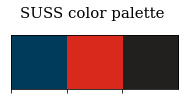

In [51]:
# Palette
sns.palplot(['#013b5b', '#d9291c', '#221f1f'])

plt.title("SUSS color palette ",loc='center',
          fontfamily='serif',fontsize=15,
          y=1.2);

### Set Grid Style

In [52]:
sns.set_style('whitegrid')

### Task: Explore the distribution of review scores across the website

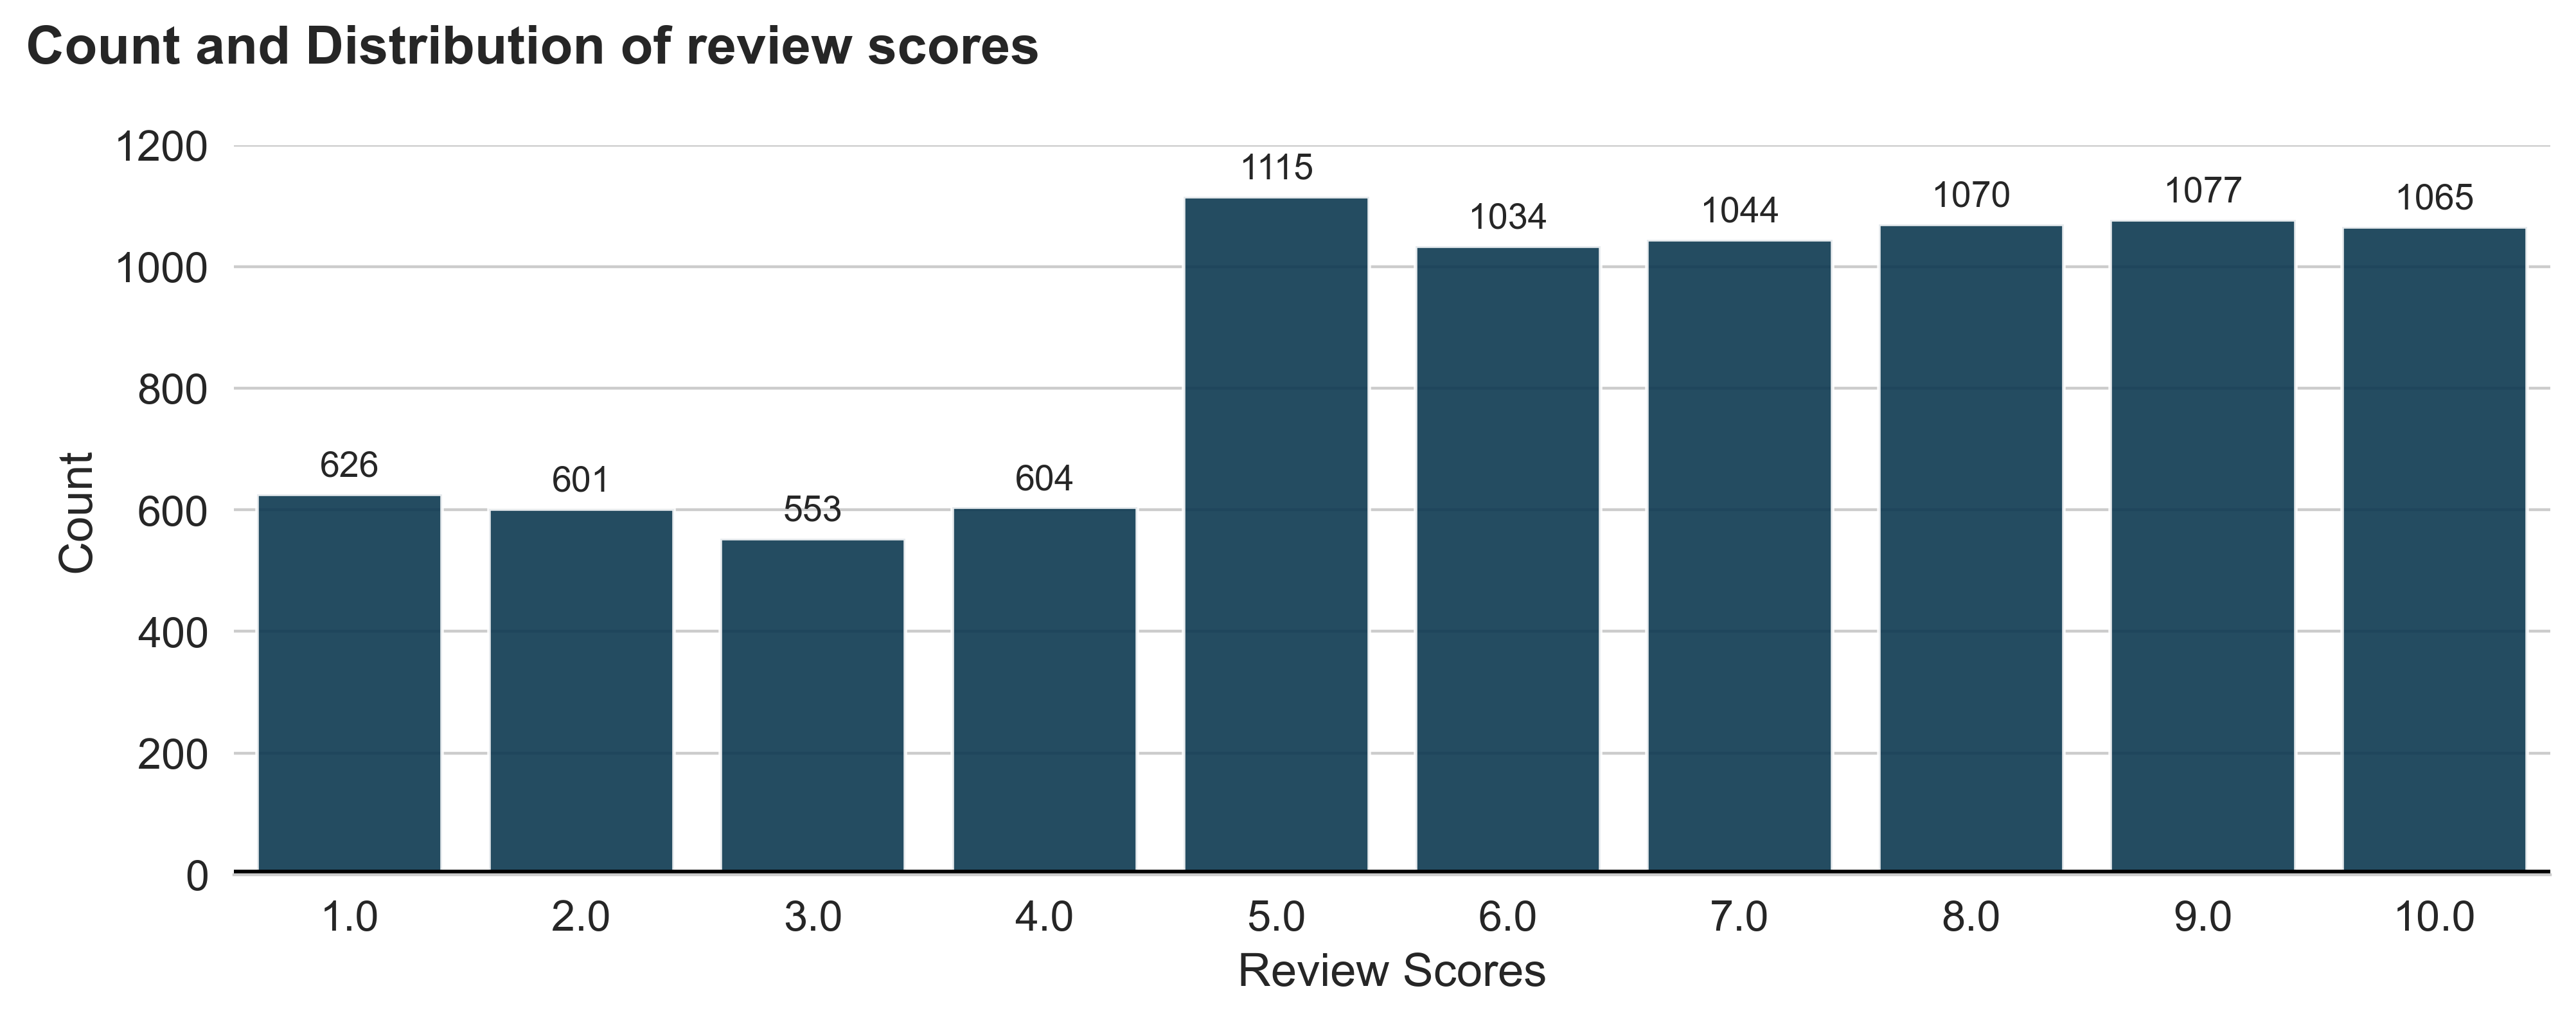

In [53]:
fig, ax = plt.subplots(figsize=(10,4), dpi=400)

# Countplot
sns.countplot(data=df, x='review_score',
              color='#013b5b', alpha =0.9)
ax.set_ylim(0,1200)

#Title
plt.suptitle('Count and Distribution of review scores',fontsize = 15,
             fontweight='bold', x=0.2)

# Remove border from plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Thicken the bottom line
plt.axhline(y = 0, color = 'black', linewidth = 3)

# Annotations
data=df.groupby('review_score').count()['show_id']

for i in data.index:
    ax.annotate(f"{data[i]}",
                xy=(i-1, data[i] + 30),
                ha='center')

# Adjust Ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust Axis Labels
plt.ylabel('Count', fontsize =13)
plt.xlabel('Review Scores', fontsize =13)

plt.tight_layout();



Observation: A bigger percentage of review scores are in the 5-10 range

### Task: Calculate the average review scores of TV Shows and Movies

In [54]:
round(df.groupby('type').mean()['review_score'],2)

type
Movie      6.18
TV Show    6.01
Name: review_score, dtype: float64

Observation: Average reviews for TV and Movies are relatively similar, however, an inspection of how the review score are individually distributed could be done to gain more insights

### Task: Compare Movie and TV Show review score distributions

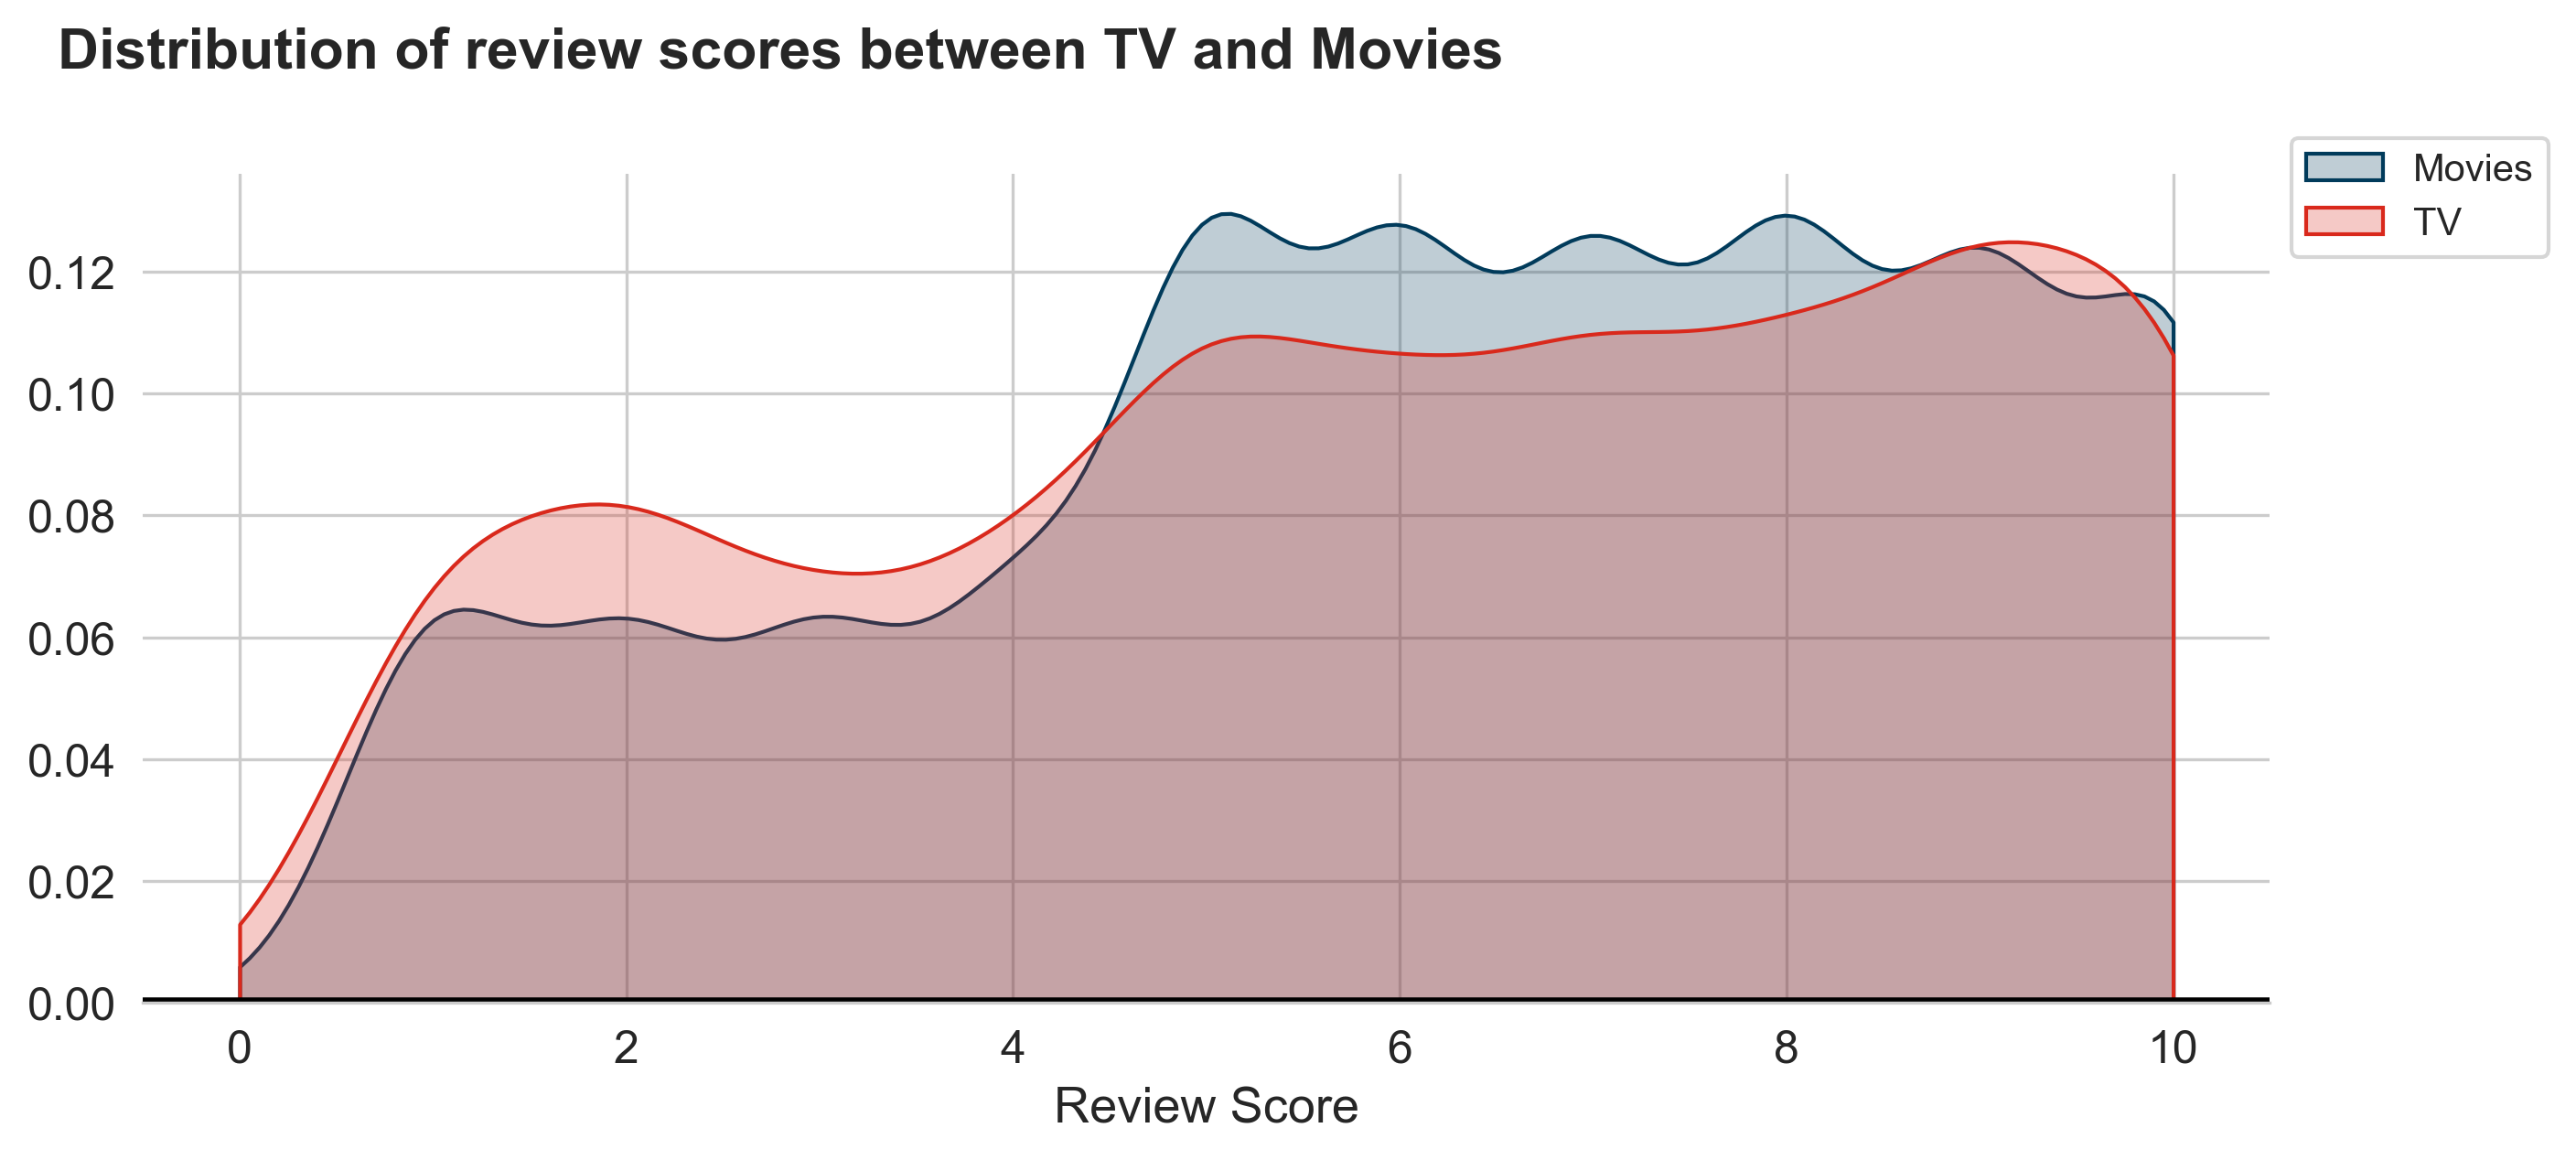

In [55]:
# Seperate TV and Movie data
df_TV = df[df.type=='TV Show'].copy()
df_Movie = df[df.type == 'Movie'].copy()


fig, ax = plt.subplots(figsize=(10,4),dpi=300)
sns.set_style('white')

# Movie and TV Plots
sns.kdeplot(data=df_Movie,x='review_score',
            fill=True, clip=[0,10], 
            label='Movies', color='#013b5b')

sns.kdeplot(data=df_TV,x='review_score',
            fill=True, clip=[0,10], 
            label='TV', color='#d9291c')

# Title
plt.title('Distribution of review scores between TV and Movies', 
          fontsize=15, fontweight='bold',
          x=0.3, y=1.1)

# Remove border from plot
for s in ['top', 'left','right']:
    ax.spines[s].set_visible(False)
    
# Thicken X Axis
ax.axhline(color = 'black', linewidth = 3)

# Amend Axis Labels
plt.xlabel('Review Score', fontsize=13)
plt.ylabel('')

# Thicken Ticks
ax.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc=(1.01,0.9))
plt.tight_layout;

Observation: It seems that TV Shows tend to have a higher percentage of poorer reviews as compared to Movies. This suggests that movies may be slightly more preferred by the users of SUSS+.

In [56]:
x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T
mf_ratio

type  Movie  TV Show
type    0.7      0.3

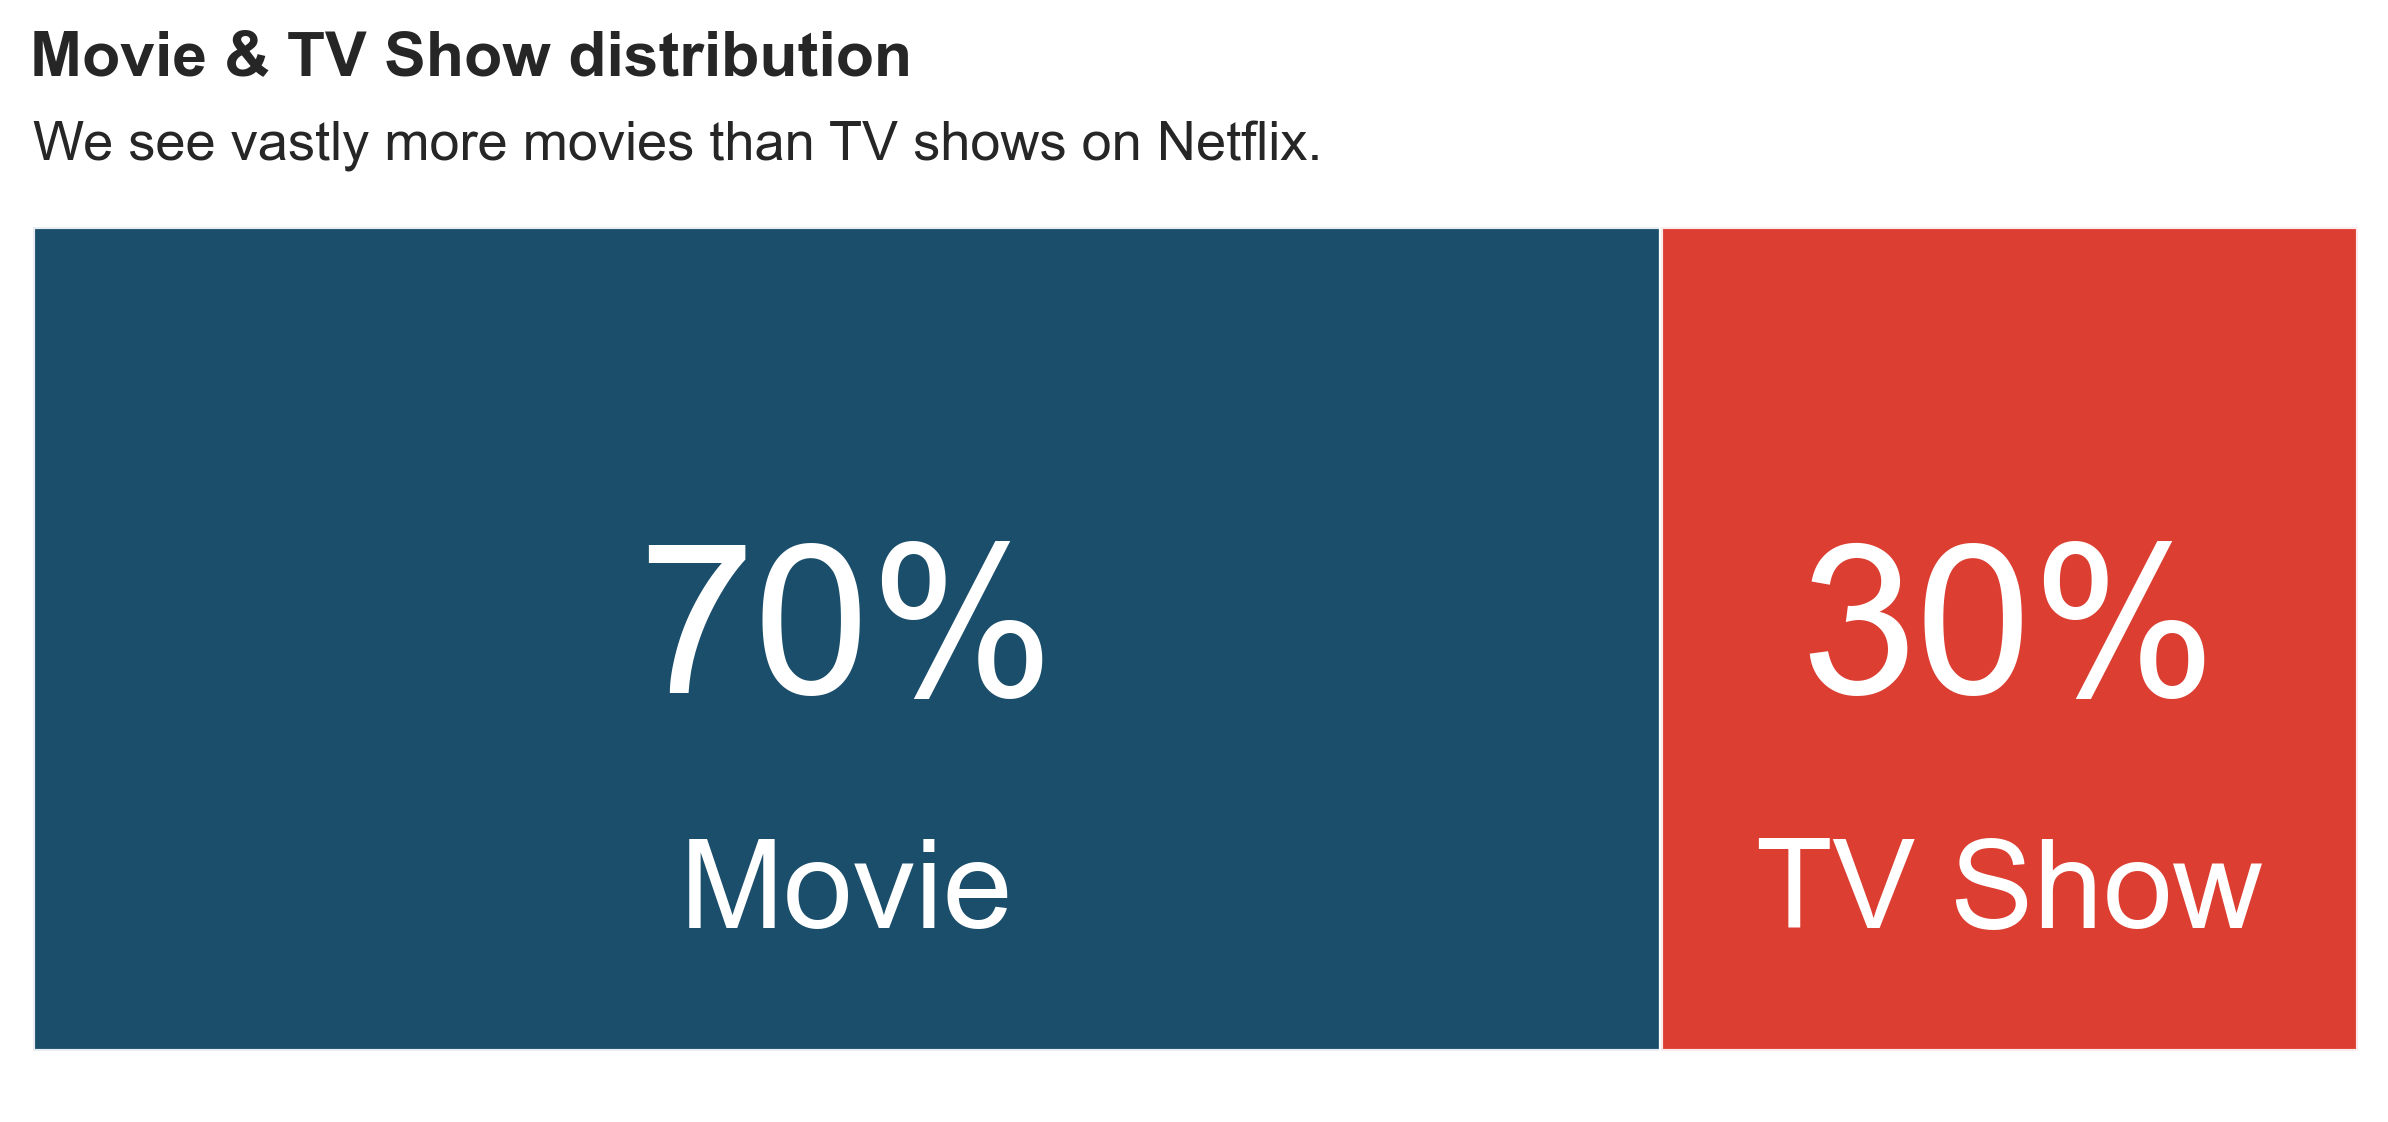

In [57]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=300)

# Plot
ax.barh(mf_ratio.index, mf_ratio['Movie'],
        color='#013b5b', alpha=0.9)
ax.barh(mf_ratio.index, mf_ratio['TV Show'], 
        left=mf_ratio['Movie'], color='#d9291c',
        alpha=0.9)

ax.set_xlim(0, 1)
ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%",
                xy=(mf_ratio['Movie'][i]/2, i),
                va = 'center', ha='center',
                fontsize=50, fontweight='light', 
                fontfamily='arial',color='white')

    ax.annotate("Movie", xy=(mf_ratio['Movie'][i]/2, -0.25),
                va = 'center', ha='center',
                fontsize=30, fontweight='light',
                fontfamily='arial',color='white')

# Annotations
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%",
                xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                va = 'center', ha='center',
                fontsize=50, fontweight='light', 
                fontfamily='arial', color='white')
    
    ax.annotate("TV Show",
                xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                va = 'center', ha='center',
                fontsize=30, fontweight='light', 
                fontfamily='arial', color='white')

# Title & Subtitle
plt.suptitle('Movie & TV Show distribution', fontfamily='arial',
             fontsize=15, fontweight='bold',
             x=0.271, y=1.01)

plt.title('We see vastly more movies than TV shows on Netflix.',
          fontfamily='arial',fontsize=13,
          loc='left')

# Removal of Borders
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

plt.tight_layout;

In [58]:
# Revert back grid style
sns.set_style('whitegrid')

### Task: Explore how does the number of seasons in a TV Show affect its review score

In [59]:
# Extracting data related to TV Shows
df_TV = df[df.type=='TV Show'].copy()

df_TV.head()

show_id     type                  title         director  \
1      s2  TV Show          Blood & Water            Empty   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans            Empty   
4      s5  TV Show           Kota Factory            Empty   
5      s6  TV Show          Midnight Mass    Mike Flanagan   

                                                cast         country  \
1  [Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...  [South Africa]   
2  [Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...         No Data   
3                                            No Data         No Data   
4  [Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...         [India]   
5  [Kate Siegel, Zach Gilford, Hamish Linklater, ...         No Data   

  date_added  release_year rating   duration  \
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   
5 2021-09-24          2021  TV-MA   1 Season   

                                           listed_in  \
1  [International TV Shows, TV Dramas, TV Mysteries]   
2  [Crime TV Shows, International TV Shows, TV Ac...   
3                           [Docuseries, Reality TV]   
4  [International TV Shows, Romantic TV Shows, TV...   
5               [TV Dramas, TV Horror, TV Mysteries]   

                                         description  review_score  \
1  After crossing paths at a party, a Cape Town t...          10.0   
2  To protect his family from a powerful drug lor...           6.0   
3  Feuds, flirtations and toilet talk go down amo...           9.0   
4  In a city of coaching centers known to train I...           7.0   
5  The arrival of a charismatic young priest brin...           7.0   

   date_added_year  date_added_month  
1           2021.0               9.0  
2           2021.0               9.0  
3           2021.0               9.0  
4           2021.0               9.0  
5           2021.0               9.0

In [60]:
# Extracting integers of seasons from duration column
df_TV['Seasons'] = df_TV['duration'].str.extract('(^\d*)')

df_TV['Seasons']

1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: Seasons, Length: 2669, dtype: object

In [61]:
# Converting Series type to int
df_TV['Seasons']=df_TV['Seasons'].astype('int')

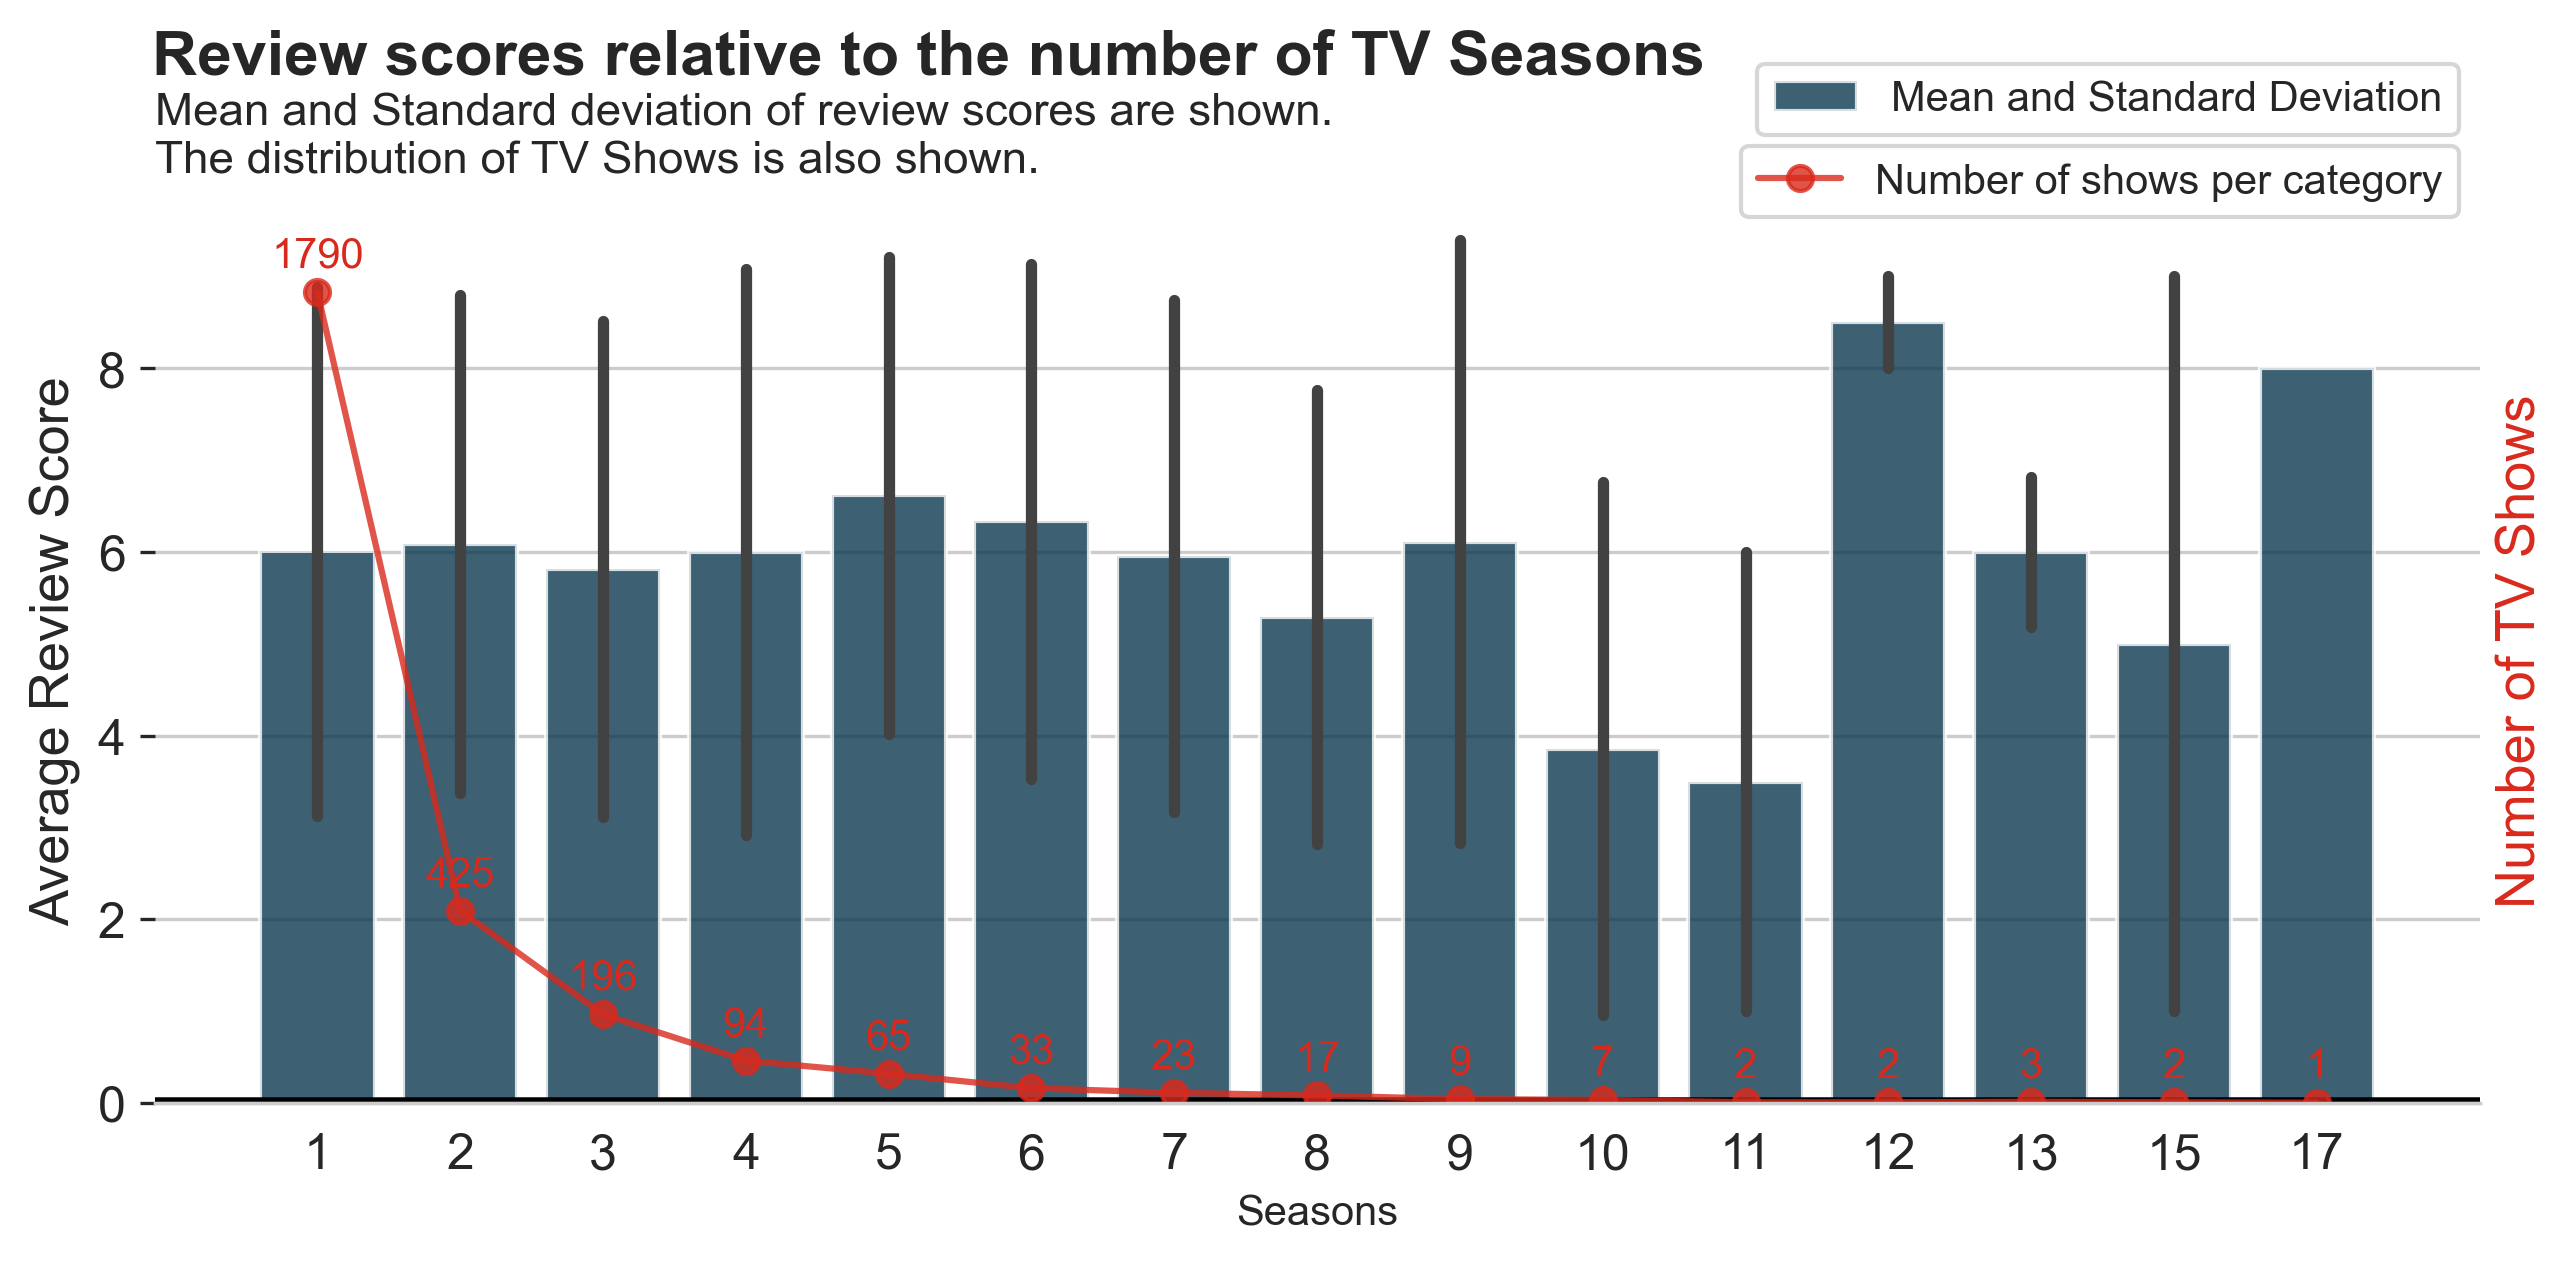

In [62]:
fig, ax=plt.subplots(dpi=300, figsize=(10,4))

# Plot
sns.barplot(data=df_TV.sort_values('Seasons'), x='Seasons',
            y='review_score', estimator=np.mean,
            ci='sd', color='#013b5b',
            alpha=0.8, label='Mean and Standard Deviation')

# Distribution axis
ax2 = ax.twinx()
ax2.plot(df_TV.groupby('Seasons').count()['show_id'].reset_index(drop=True).index,
         df_TV.groupby('Seasons').count()['show_id'].values,
         color='#d9291c', marker='o',
         label='Number of shows per category', alpha=0.8)
ax2.set_ylim(0,2000)

# Title
plt.suptitle('Review scores relative to the number of TV Seasons',
          x=0.383, y=1.02,fontsize=15,
          fontweight='bold')

plt.title('Mean and Standard deviation of review scores are shown.\nThe distribution of TV Shows is also shown.',
          loc='left', fontsize=11,
          fontweight='light')

# Remove border from plot
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    
# Thicken X Axis
ax.axhline(color='black', linewidth=3)

# Change Axis Labels
ax.set_ylabel('Average Review Score', fontsize=13)
plt.xlabel('Seasons in a TV Show', fontsize=13)
ax2.set_ylabel("Number of TV Shows", fontsize=13, 
               color="#d9291c")

# Adjust Ticks
ax.tick_params(axis='both', which='major', labelsize=12)

ax2.tick_params(left = False, right = False , labelright = False ,
                labelbottom = False, bottom = False)

# Set Grid
ax.grid(True, which='major', 
        axis='y')
ax2.grid(None)

# Annotations
label=df_TV.groupby('Seasons').count()['show_id'].reset_index(drop=True)
for idx, item in enumerate(label):
    ax2.annotate(f"{item}",
                xy=(idx, item+80),
                color='#d9291c', va='center', 
                ha='center')

ax.legend(loc='best', bbox_to_anchor=(1, 1.17))
ax2.legend(loc='best', bbox_to_anchor=(1, 1.08))

plt.tight_layout;

In [63]:
df_TV[df_TV.Seasons == 12]

show_id     type              title director  \
4964   s4965  TV Show  Trailer Park Boys    Empty   
5412   s5413  TV Show     Criminal Minds    Empty   

                                                   cast  \
4964  [Mike Smith, John Paul Tremblay, Robb Wells, J...   
5412  [Mandy Patinkin, Joe Mantegna, Thomas Gibson, ...   

                      country date_added  release_year rating    duration  \
4964                 [Canada] 2018-03-30          2018  TV-MA  12 Seasons   
5412  [United States, Canada] 2017-06-30          2017  TV-14  12 Seasons   

                                              listed_in  \
4964  [Classic & Cult TV, Crime TV Shows, Internatio...   
5412          [Crime TV Shows, TV Dramas, TV Mysteries]   

                                            description  review_score  \
4964  Follow the booze-fueled misadventures of three...           9.0   
5412  This intense police procedural follows a group...           8.0   

      date_added_year  date_added_month  Seasons  
4964           2018.0               3.0       12  
5412           2017.0               6.0       12

Observation: There seems to be a very slight corralation in the number of seasons in a TV Show and the average review scores of such seasons, where TV Shows with high season counts tend to drop in average review scores. However, note should be taken that the sample size of the higher season TV Shows may be smaller, which affects our analysis.

### Task: Explore how does the duration of a movie affect its review scores

In [64]:
# Extracting the number of seasons
df_Movie = df[df.type == 'Movie'].copy()

df_Movie.head()

show_id   type                             title             director  \
0       s1  Movie              Dick Johnson Is Dead      Kirsten Johnson   
7       s8  Movie                           Sankofa         Haile Gerima   
9      s10  Movie                      The Starling       Theodore Melfi   
12     s13  Movie                      Je Suis Karl  Christian Schwochow   
13     s14  Movie  Confessions of an Invisible Girl        Bruno Garotti   

                                                 cast  \
0                                             No Data   
7   [Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...   
9   [Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...   
12  [Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel...   
13  [Klara Castanho, Lucca Picon, JÃºlia Gomes, Ma...   

                                              country date_added  \
0                                     [United States] 2021-09-25   
7   [United States, Ghana, Burkina Faso, United Ki... 2021-09-24   
9                                     [United States] 2021-09-24   
12                          [Germany, Czech Republic] 2021-09-23   
13                                            No Data 2021-09-22   

    release_year rating duration  \
0           2020  PG-13   90 min   
7           1993  TV-MA  125 min   
9           2021  PG-13  104 min   
12          2021  TV-MA  127 min   
13          2021  TV-PG   91 min   

                                            listed_in  \
0                                     [Documentaries]   
7   [Dramas, Independent Movies, International Mov...   
9                                  [Comedies, Dramas]   
12                     [Dramas, International Movies]   
13               [Children & Family Movies, Comedies]   

                                          description  review_score  \
0   As her father nears the end of his life, filmm...           8.0   
7   On a photo shoot in Ghana, an American model s...           8.0   
9   A woman adjusting to life after a loss contend...           5.0   
12  After most of her family is murdered in a terr...           9.0   
13  When the clever but socially-awkward TetÃª joi...           6.0   

    date_added_year  date_added_month  
0            2021.0               9.0  
7            2021.0               9.0  
9            2021.0               9.0  
12           2021.0               9.0  
13           2021.0               9.0

In [65]:
# Extracting the number of seasons
df_Movie['Minute'] = df_Movie['duration'].str.extract('(^\d*)')
df_Movie['Minute'].head()

0      90
7     125
9     104
12    127
13     91
Name: Minute, dtype: object

In [66]:
df_Movie['Minute'] = df_Movie['Minute'].astype(int)

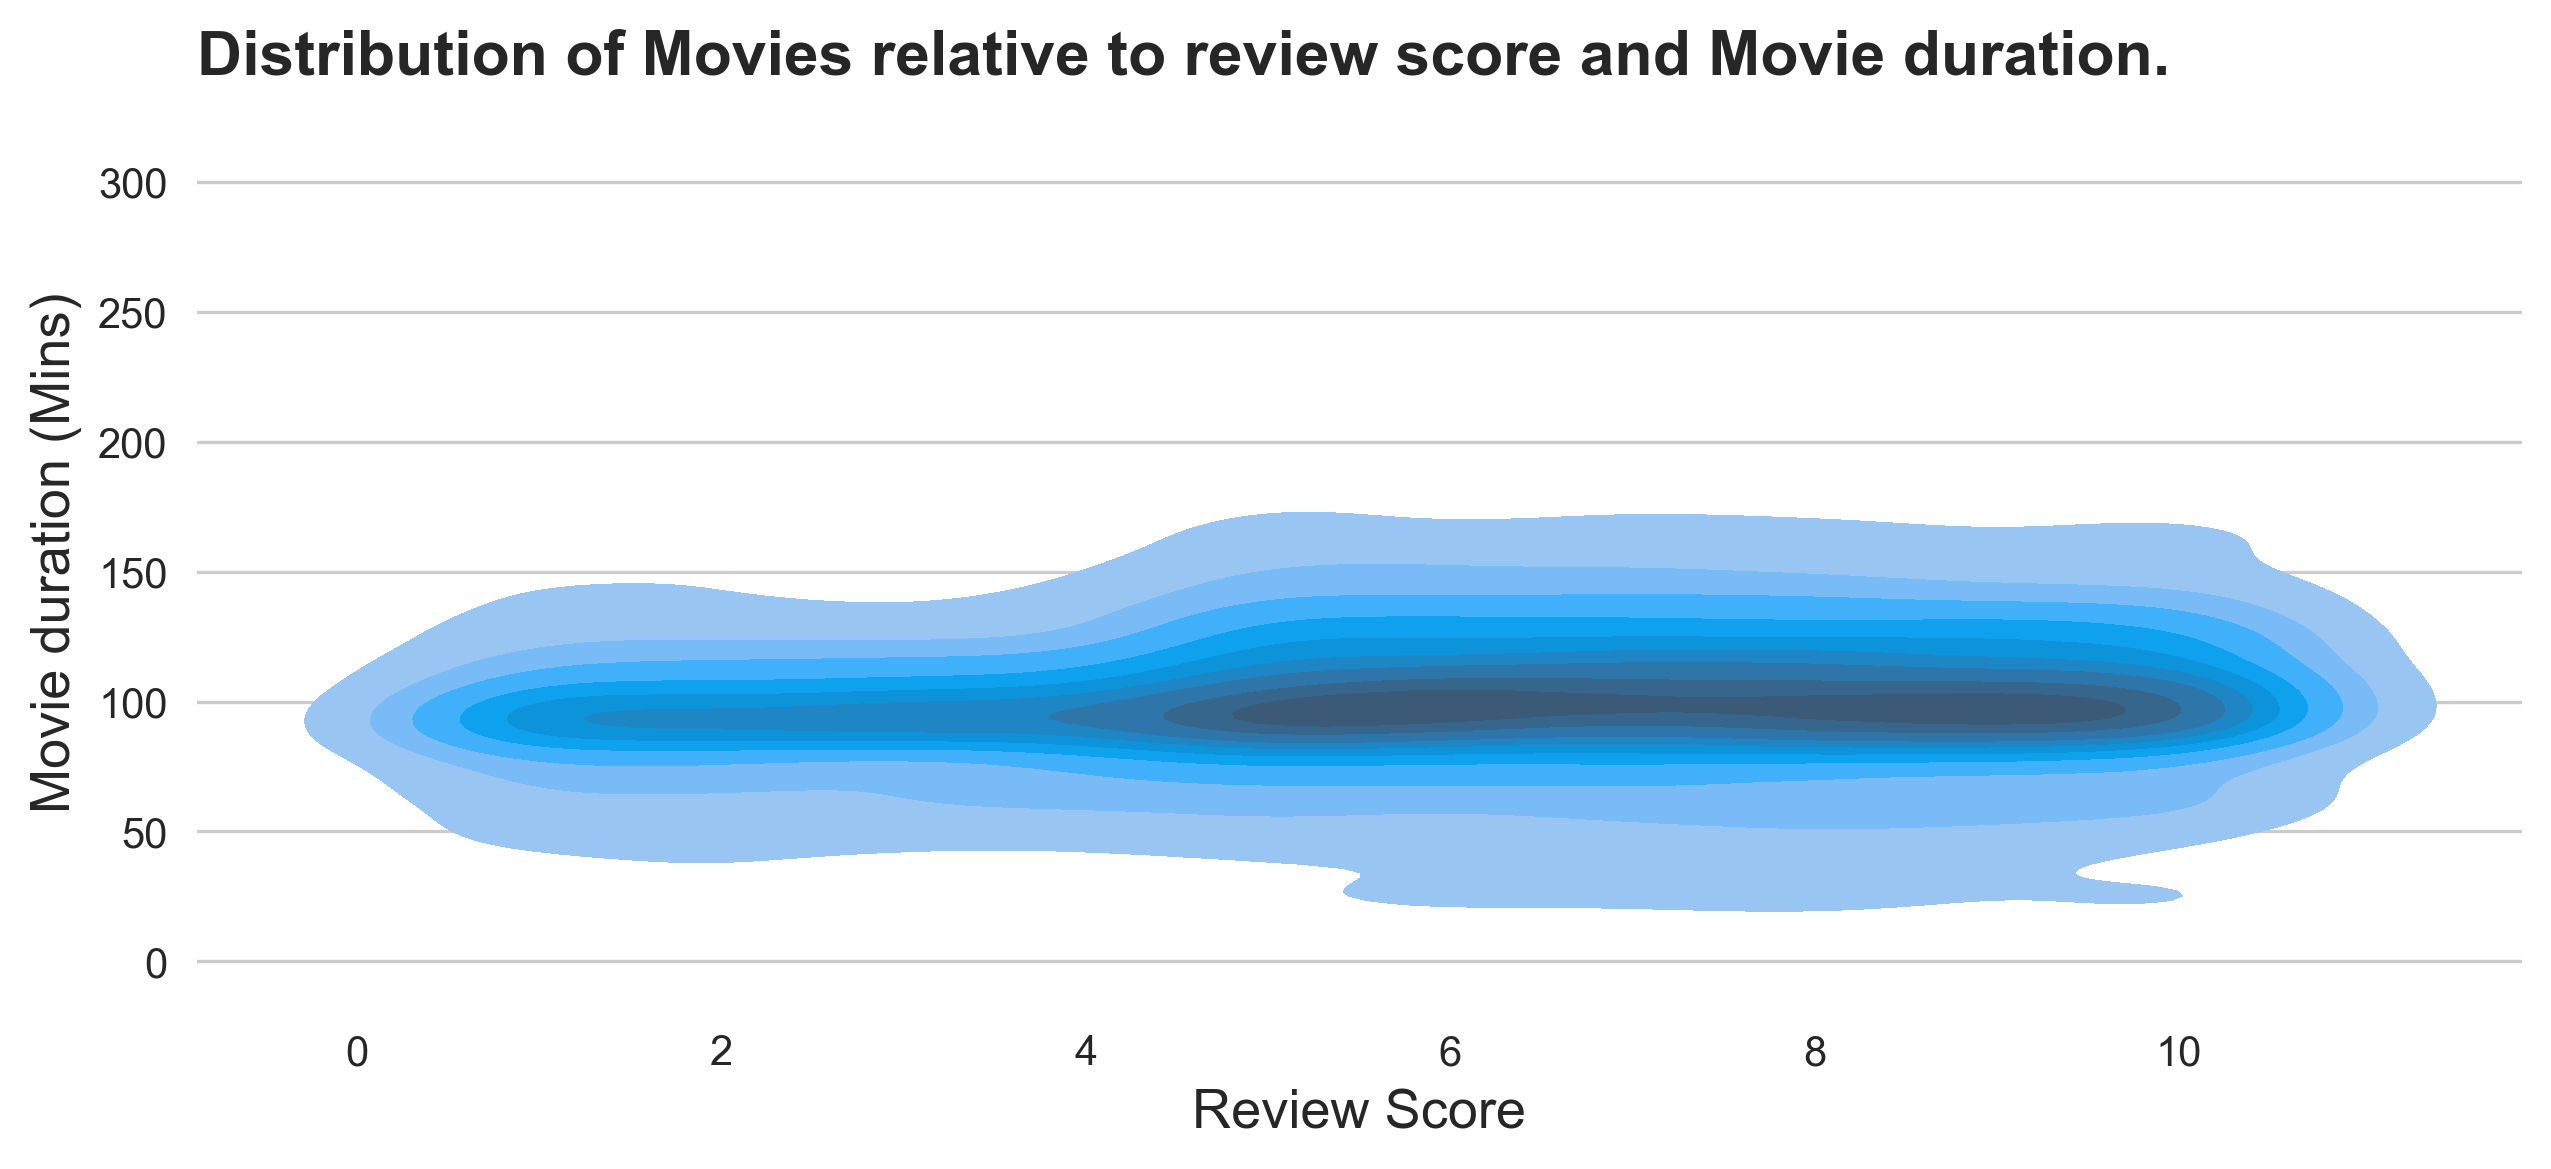

In [67]:
fig, ax=plt.subplots(figsize=(10,4), dpi=300)

# Plot
sns.kdeplot(data=df_Movie, y='Minute',
                x='review_score', color="#013b5b",
                alpha=1, fill=True)

# Title
plt.title('Distribution of Movies relative to review score and Movie duration.', fontsize=15,
          fontweight='bold', loc='left')

# Removal of Borders
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

#Grid
ax.grid(axis='x')

# Axis Labels
plt.ylabel('Movie duration (Mins)', fontsize=13)
plt.xlabel('Review Score', fontsize=13)

plt.tight_layout;

#### Corralation between review score and duration of movie:

In [68]:
df_Movie.corr()['review_score']['Minute']

0.10297330328529386

Observation: No corralation observed between `duration` and `review_score` as can be seen by the graph and calculation above.

### Task: Explore how Movie Genres affect review scores

In [69]:
# Expanding the genre column in the data set
df_Movie_genre = df_Movie.explode('listed_in').copy()
df_Movie_genre.head()

show_id   type                 title         director  \
0      s1  Movie  Dick Johnson Is Dead  Kirsten Johnson   
7      s8  Movie               Sankofa     Haile Gerima   
7      s8  Movie               Sankofa     Haile Gerima   
7      s8  Movie               Sankofa     Haile Gerima   
9     s10  Movie          The Starling   Theodore Melfi   

                                                cast  \
0                                            No Data   
7  [Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...   
7  [Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...   
7  [Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...   
9  [Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...   

                                             country date_added  release_year  \
0                                    [United States] 2021-09-25          2020   
7  [United States, Ghana, Burkina Faso, United Ki... 2021-09-24          1993   
7  [United States, Ghana, Burkina Faso, United Ki... 2021-09-24          1993   
7  [United States, Ghana, Burkina Faso, United Ki... 2021-09-24          1993   
9                                    [United States] 2021-09-24          2021   

  rating duration             listed_in  \
0  PG-13   90 min         Documentaries   
7  TV-MA  125 min                Dramas   
7  TV-MA  125 min    Independent Movies   
7  TV-MA  125 min  International Movies   
9  PG-13  104 min              Comedies   

                                         description  review_score  \
0  As her father nears the end of his life, filmm...           8.0   
7  On a photo shoot in Ghana, an American model s...           8.0   
7  On a photo shoot in Ghana, an American model s...           8.0   
7  On a photo shoot in Ghana, an American model s...           8.0   
9  A woman adjusting to life after a loss contend...           5.0   

   date_added_year  date_added_month  Minute  
0           2021.0               9.0      90  
7           2021.0               9.0     125  
7           2021.0               9.0     125  
7           2021.0               9.0     125  
9           2021.0               9.0     104

#### Pivot table featuring the average and count of review scores based on movie genres

In [70]:
df_Movie_genre_agg=df_Movie_genre.groupby('listed_in').agg({'review_score':['mean','count']})['review_score'].copy()
df_Movie_genre_agg

mean  count
listed_in                                
Action & Adventure        5.925234    856
Anime Features            6.028169     71
Children & Family Movies  5.962500    640
Classic Movies            6.646552    116
Comedies                  6.086774   1671
Cult Movies               5.197183     71
Documentaries             5.603230    867
Dramas                    7.476289   2425
Faith & Spirituality      7.369231     65
Horror Movies             3.081232    357
Independent Movies        6.978836    756
International Movies      6.436476   2747
LGBTQ Movies              6.696078    102
Music & Musicals          5.997319    373
No genre (Movies)         5.929825     57
Romantic Movies           6.506515    614
Sci-Fi & Fantasy          5.308642    243
Sports Movies             6.159817    219
Stand-Up Comedy           5.637427    342
Thrillers                 5.788562    577

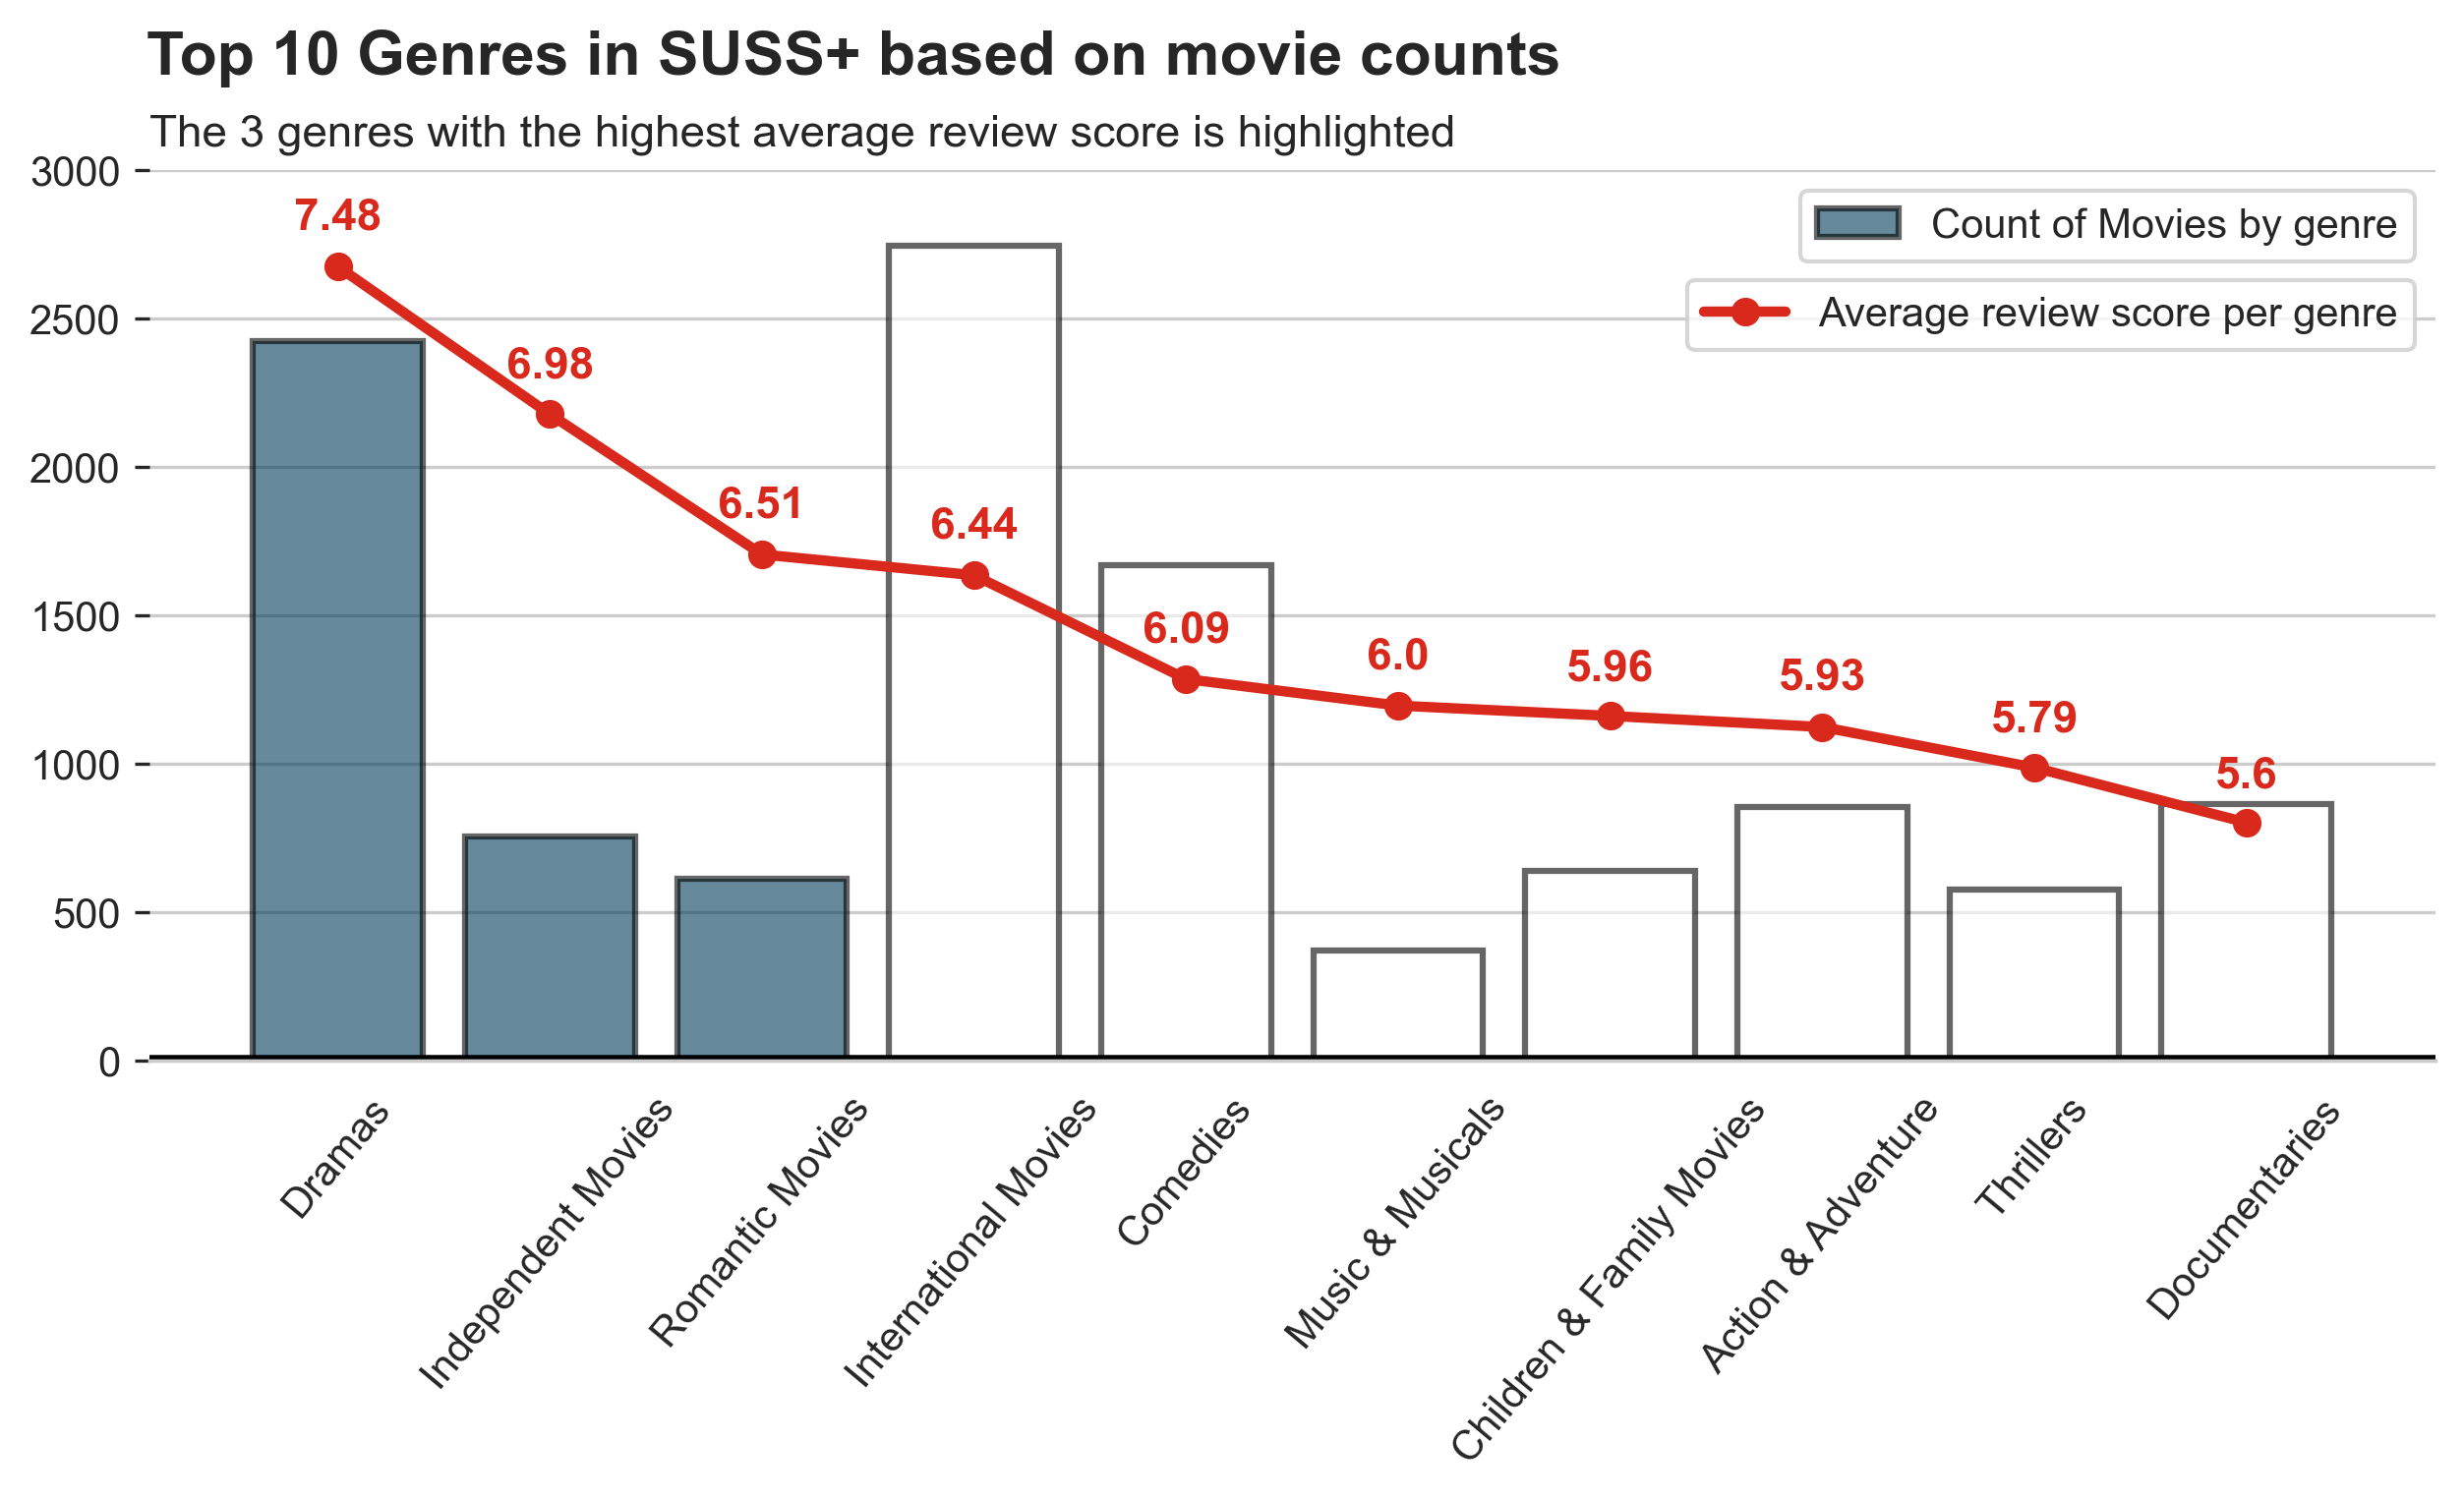

In [71]:
fig, ax=plt.subplots(figsize=(10,4), dpi=300)

# Bar plot
df_Movie_largestcount=df_Movie_genre_agg.nlargest(10,'count').sort_values('mean', ascending=False)
ax2=ax.twinx()

color_map = ['white' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#013b5b'

ax.bar(df_Movie_largestcount.index, df_Movie_largestcount['count'].values,
       alpha=0.6, color=color_map,
       edgecolor='black', lw=1.5,
       label='Count of Movies by genre')
ax.set_ylim(0,3000)

# Review Score line plot
ax2.plot(df_Movie_largestcount.index, df_Movie_largestcount['mean'].values,
       color='#d9291c', alpha=1,
       linewidth=2.5, marker='o',
       label='Average review score per genre')
ax2.set_ylim(4.8,7.8)

# Axis Labels
ax.tick_params(axis='x', rotation=50)
ax.tick_params(axis='both', labelsize=10)
ax2.tick_params(labelright=False, right=False)

# Remove borders
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

# Thicken X axis
ax.axhline(color='black', lw=3,
          y=0)

# Grid
ax.grid(False, axis='x')
ax2.grid(False, axis='both')

# Annotate
label=round(df_Movie_largestcount['mean'], 2)
for idx, item in enumerate(label):
    ax2.annotate(f"{item}",
                xy=(idx, item+0.16),
                color='#d9291c', va='center', 
                ha='center', fontsize=11,
                fontweight='bold') 

# Legend
ax.legend(loc='best', bbox_to_anchor=(1, 1))
ax2.legend(loc='best', bbox_to_anchor=(1, 0.9))

#Title
plt.suptitle('Top 10 Genres in SUSS+ based on movie counts',
             fontsize=15, fontweight='bold',
             x=0.364, y=1)
plt.title('The 3 genres with the highest average review score is highlighted',
            fontsize=11, loc ='left')
 
plt.tight_layout;

Observation: Dramas, independent movies and romantic movies seem to be the 3 highest rated movie genres. Further exploration into their distribution could possibly produce more insights.

#### Top 3 Movie Genres (Where movie count per genre is above average)

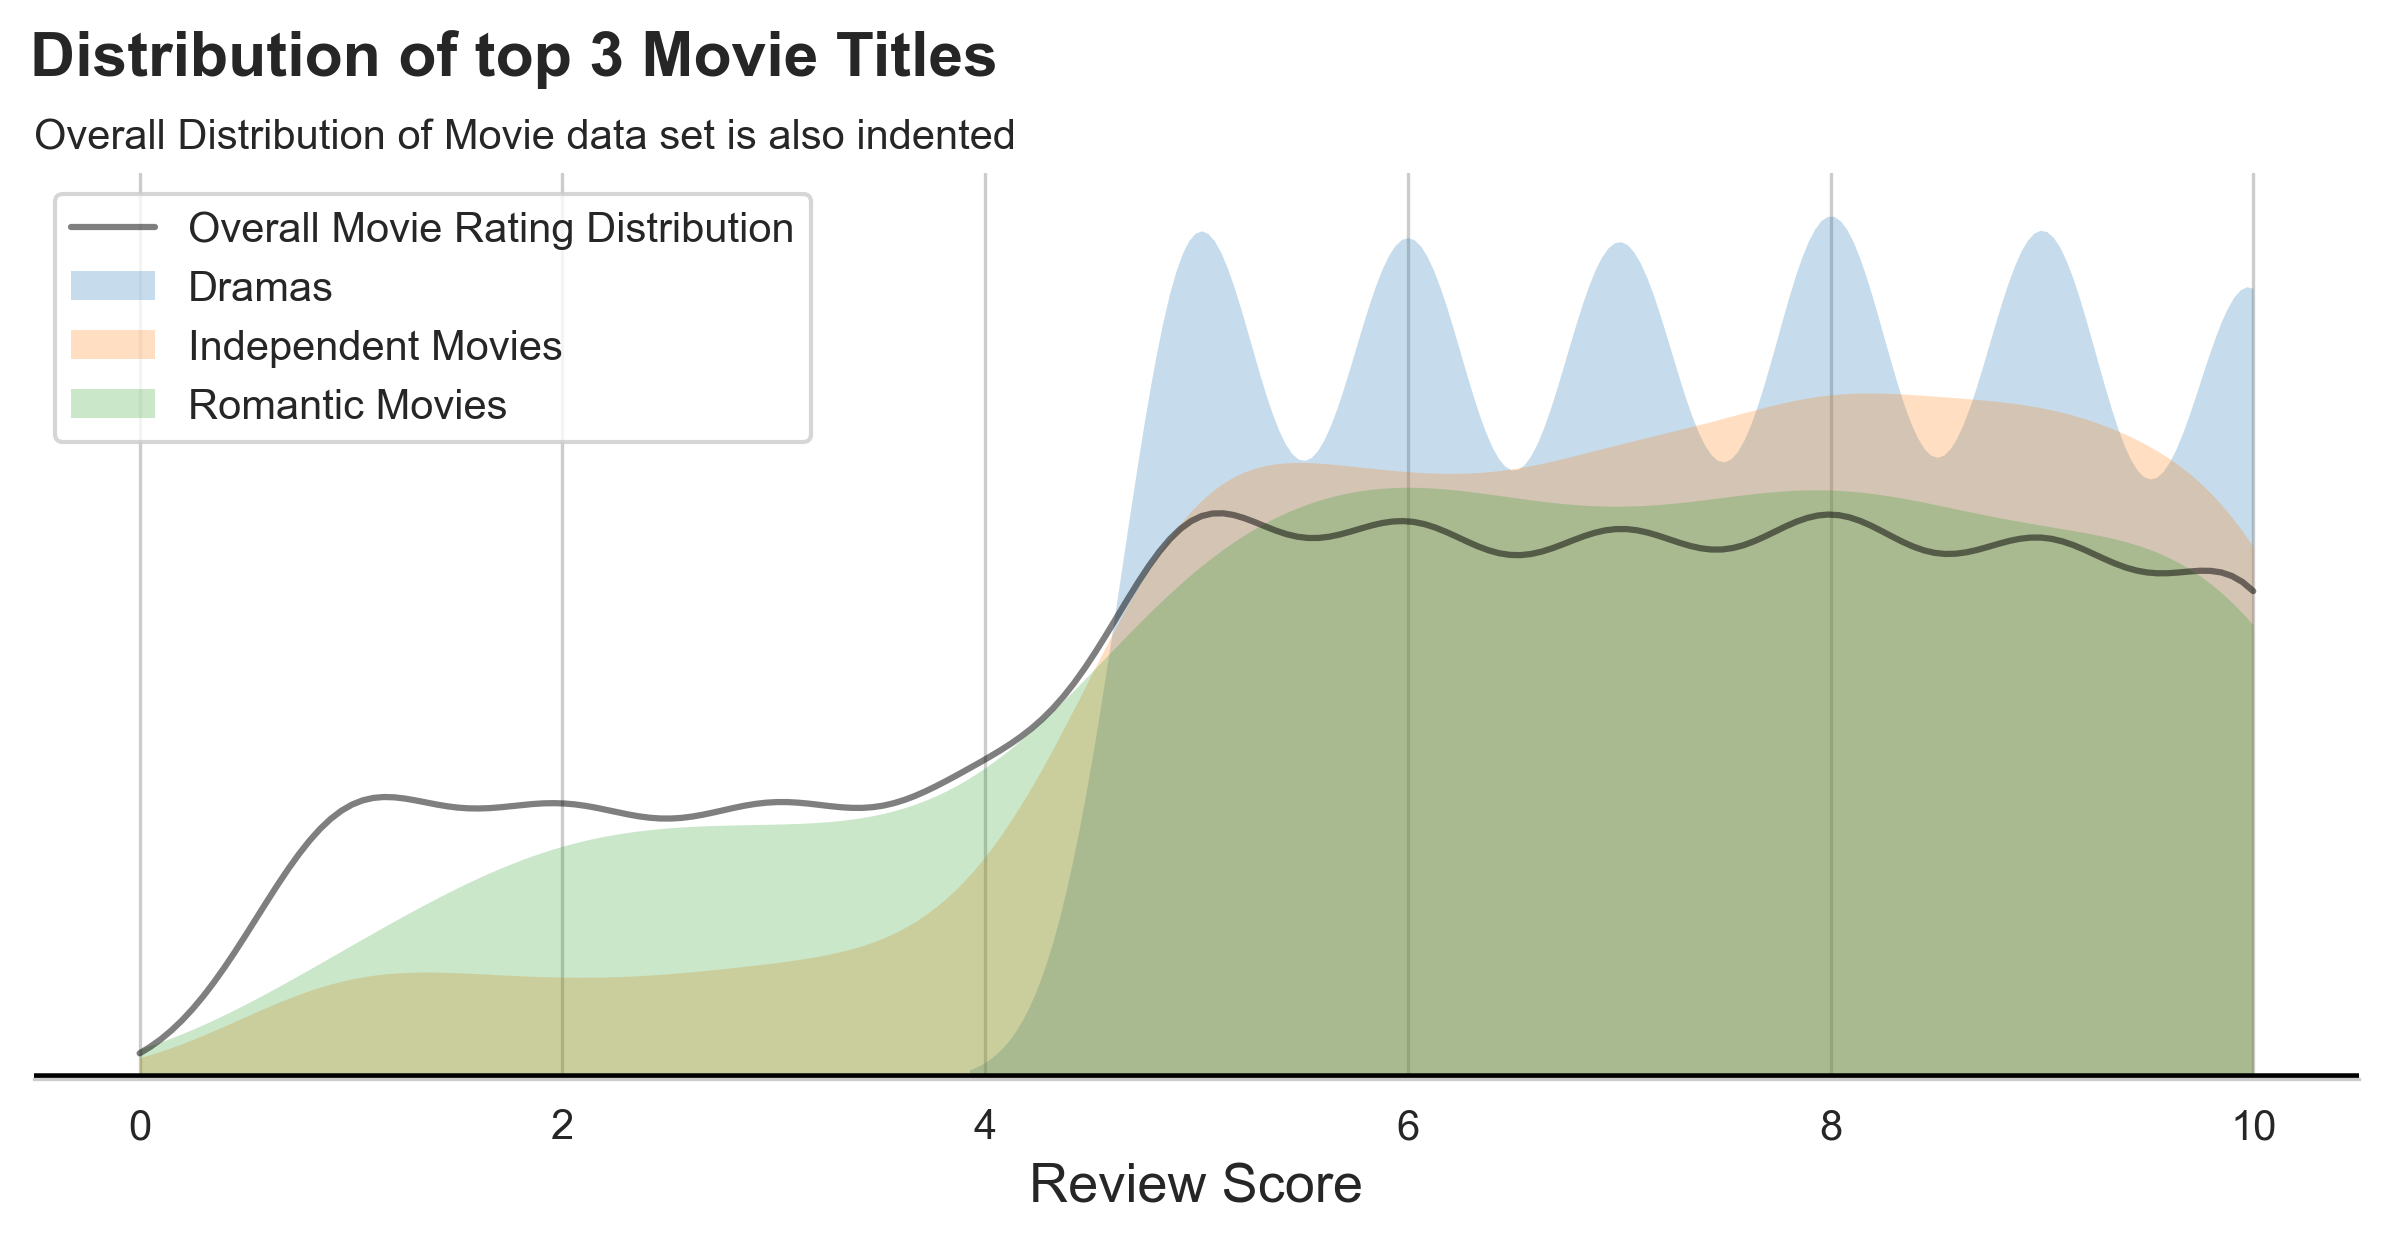

In [72]:
fig, ax=plt.subplots(dpi=300, figsize=(10,4))

# Distribution plot of overall Movie Data Set
sns.kdeplot(data=df_Movie,x='review_score', 
            clip=[0,10], label='Overall Movie Rating Distribution',
            color='black', alpha=0.5)

# Distribution Plots of top 3 genres
sns.kdeplot(data=df_Movie_genre[df_Movie_genre.listed_in=='Dramas'], 
            x='review_score', shade=True, 
            clip=[0,10], label='Dramas',
            lw=0)

sns.kdeplot(data=df_Movie_genre[df_Movie_genre.listed_in=='Independent Movies'], 
            x='review_score', shade=True, 
            clip=[0,10], label='Independent Movies',
            lw=0)

sns.kdeplot(data=df_Movie_genre[df_Movie_genre.listed_in=='Romantic Movies'], 
            x='review_score', shade=True, 
            clip=[0,10], label='Romantic Movies',
            lw=0)

# Title
plt.suptitle('Distribution of top 3 Movie Titles', fontsize=15,
            fontweight='bold', x=0.285,
            y=1)
plt.title('Overall Distribution of Movie data set is also indented', fontsize=10,
          loc='left')

# Removal of borders
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

# Adjusting Axis Labels
ax.set_ylabel('')
ax.set_xlabel('Review Score', fontsize=13)

# Grid
ax.grid(False,axis='y')

# Tick parameter
ax.tick_params(labelleft=False)

# Thicken X axis
ax.axhline(color='black', lw=3)

# Legend
plt.legend(loc='upper left')

plt.tight_layout;

Observation: By comparing the distribution of the top 3 movie genres to the overall movie rating distribution, it seems that Romantic movies seem to have slightly better review scores on average. Following that, independent movies seem to do much better rating wise as compared to romantic movies, with much fewer movies with low review scores. However, it seems that Drama movies seem to be highly reviewed in general, with relatively low review scores in general.

Action taken: SUSS+ should aim to capitalise on this insight by introducing more movies in the drama genre, followed by independent movies and romantic movies as SUSS+ users tend to prefer these genres of movies.  

#### Worst 3 Movie Genres based on average review score

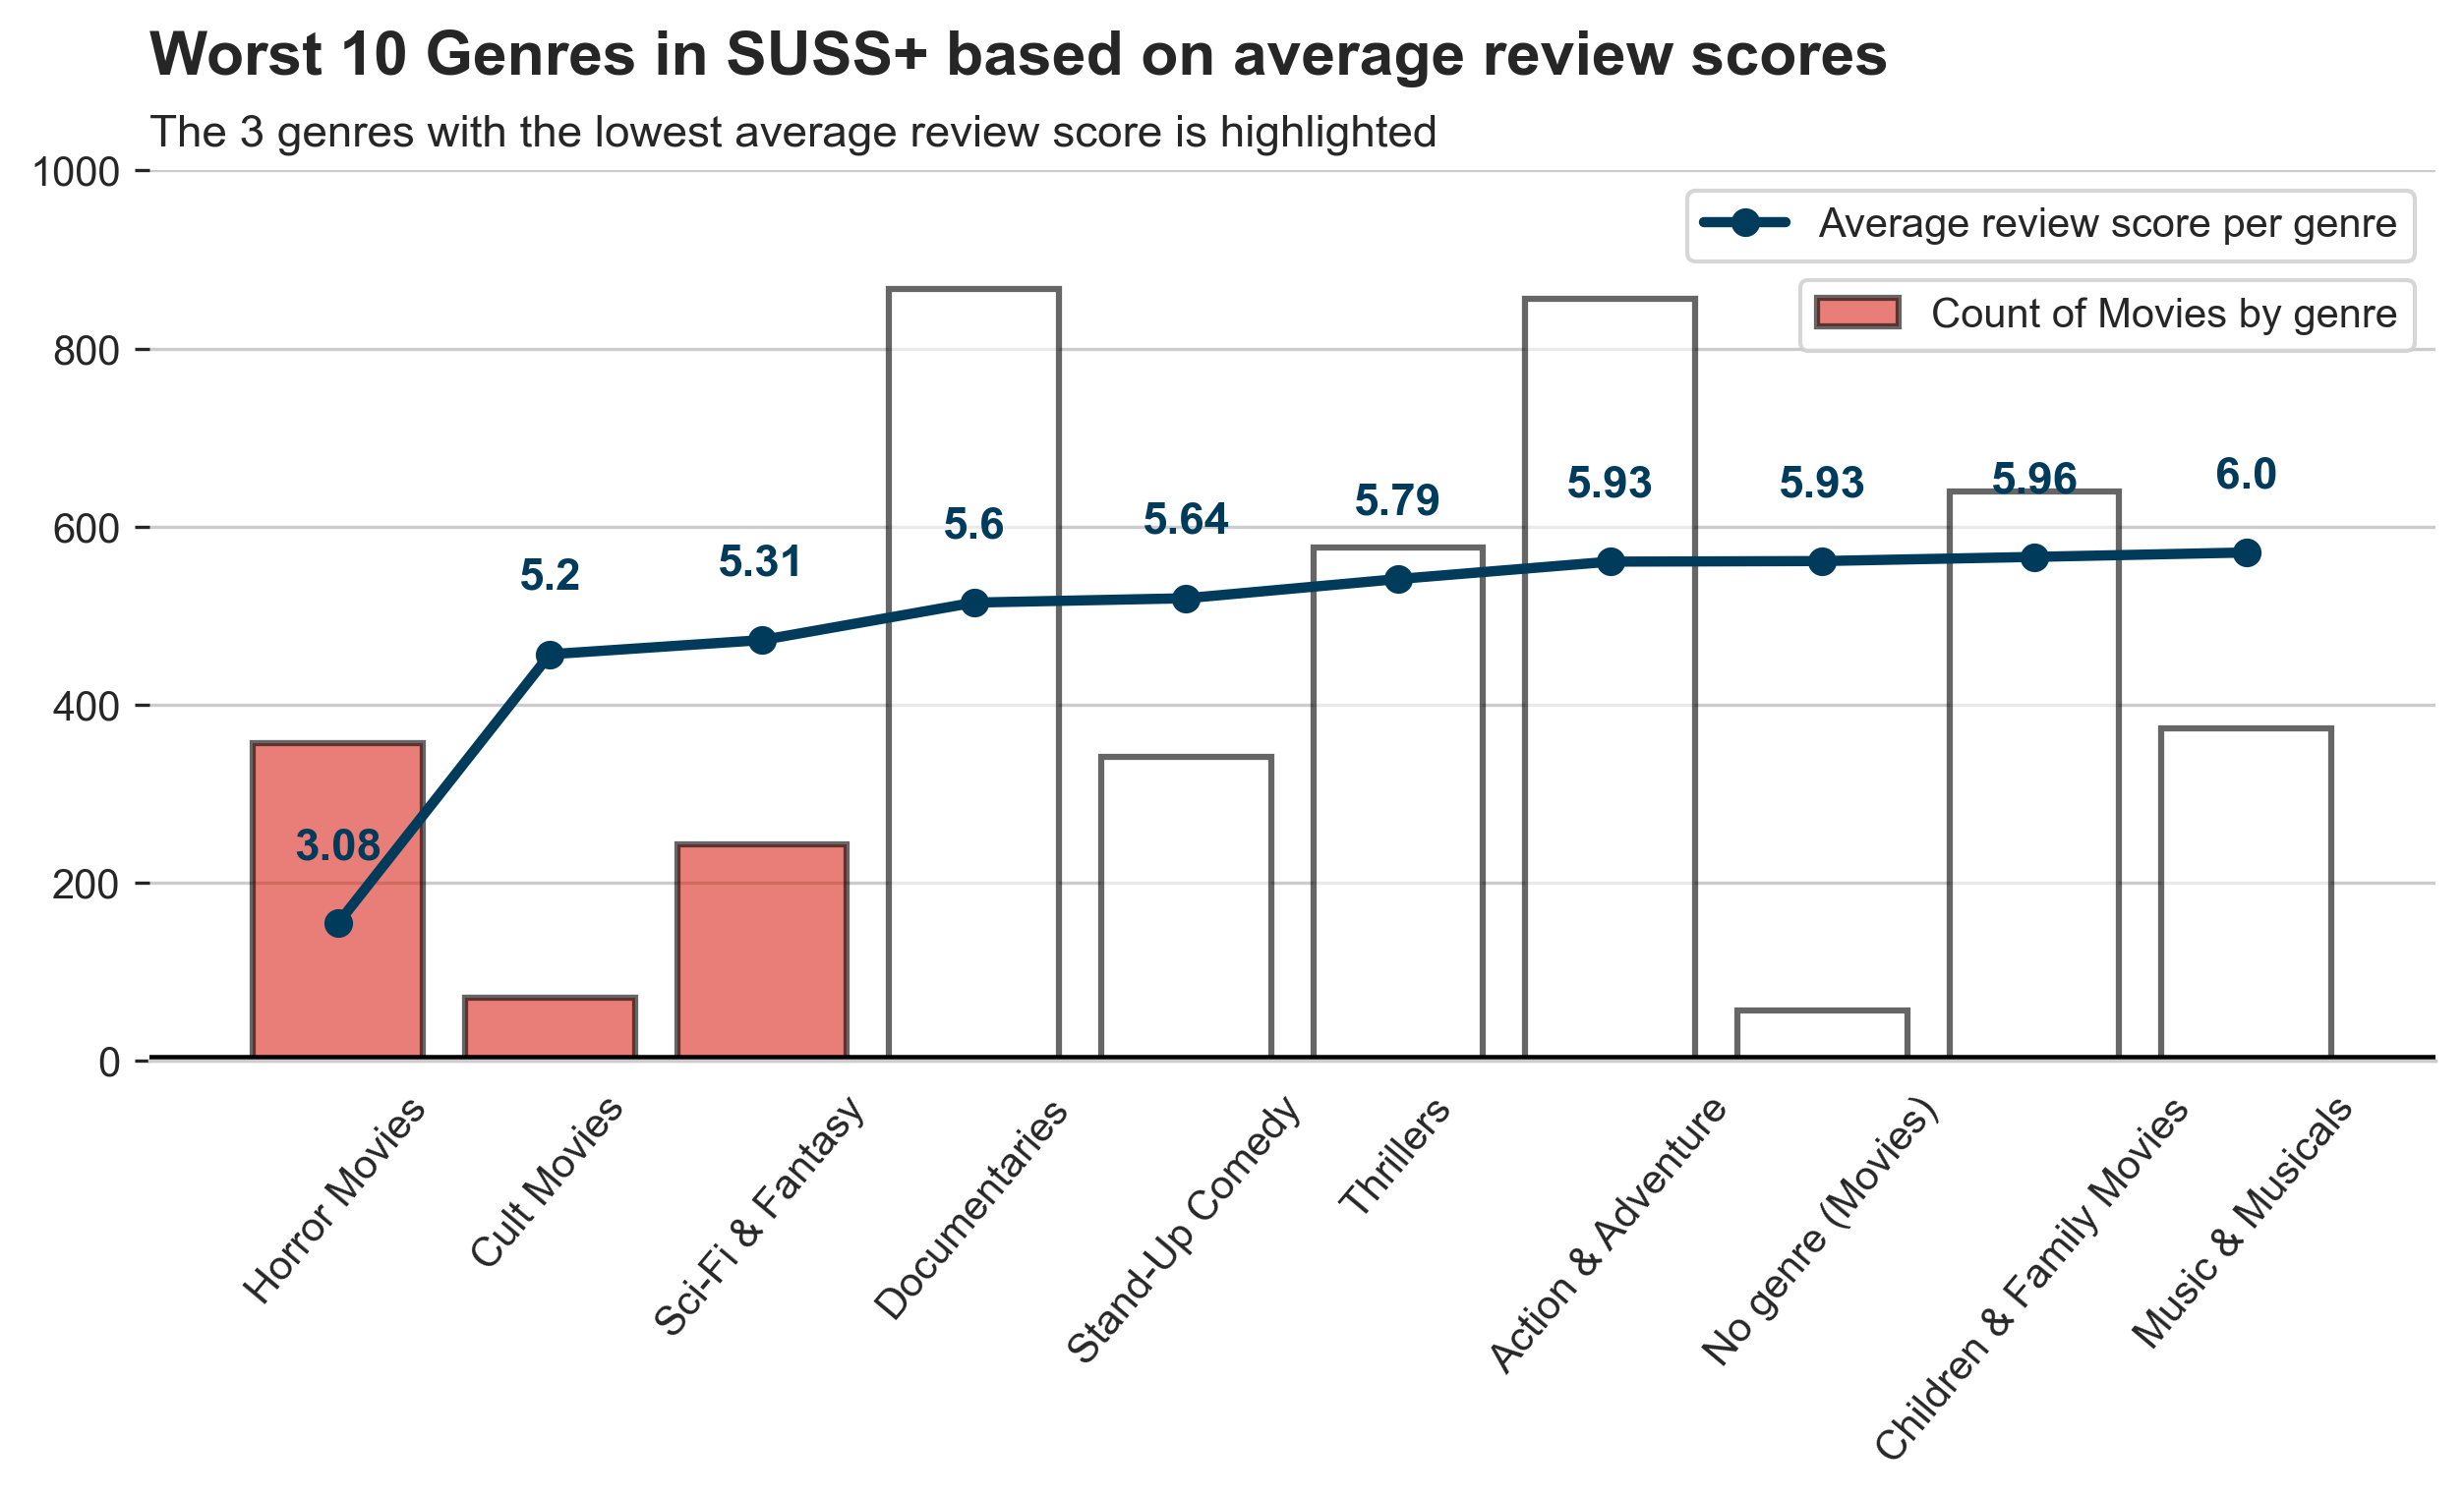

In [73]:
fig, ax=plt.subplots(figsize=(10,4), dpi=300)

# Bar plot
df_Movie_worst=df_Movie_genre_agg.nsmallest(10,'mean')
ax2=ax.twinx()

color_map = ['white' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#d9291c'

ax.bar(df_Movie_worst.index, df_Movie_worst['count'].values,
       alpha=0.6, color=color_map,
       edgecolor='black', lw=1.5,
       label='Count of Movies by genre')
ax.set_ylim(0,1000)

# Review Score line plot
ax2.plot(df_Movie_worst.index, df_Movie_worst['mean'].values,
       color='#013b5b', alpha=1,
       linewidth=2.5, marker='o',
       label='Average review score per genre')
ax2.set_ylim(2,9)

# Axis Labels
ax.tick_params(axis='x', rotation=50)
ax.tick_params(axis='both', labelsize=10)
ax2.tick_params(labelright=False, right=False)

# Remove borders
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

# Thicken X axis
ax.axhline(color='black', lw=3,
          y=0)

# Grid
ax.grid(False, axis='x')
ax2.grid(False, axis='both')

# Annotate
label=round(df_Movie_worst['mean'], 2)
for idx, item in enumerate(label):
    ax2.annotate(f"{item}",
                xy=(idx, item+0.6),
                color='#013b5b', va='center', 
                ha='center', fontsize=11,
                fontweight='bold') 

# Legend
ax2.legend(loc='best', bbox_to_anchor=(1, 1))
ax.legend(loc='best', bbox_to_anchor=(1, 0.9))

#Title
plt.suptitle('Worst 10 Genres in SUSS+ based on average review scores',
             fontsize=15, fontweight='bold',
             x=0.42, y=1)
plt.title('The 3 genres with the lowest average review score is highlighted',
            fontsize=11, loc ='left')

plt.tight_layout;

Observation: Horror Movies, Cult Movies and Sci-Fi & Fantasy movies seem to be the 3 lowest rated movie genres. Further exploration into their distribution could possibly produce more insights.

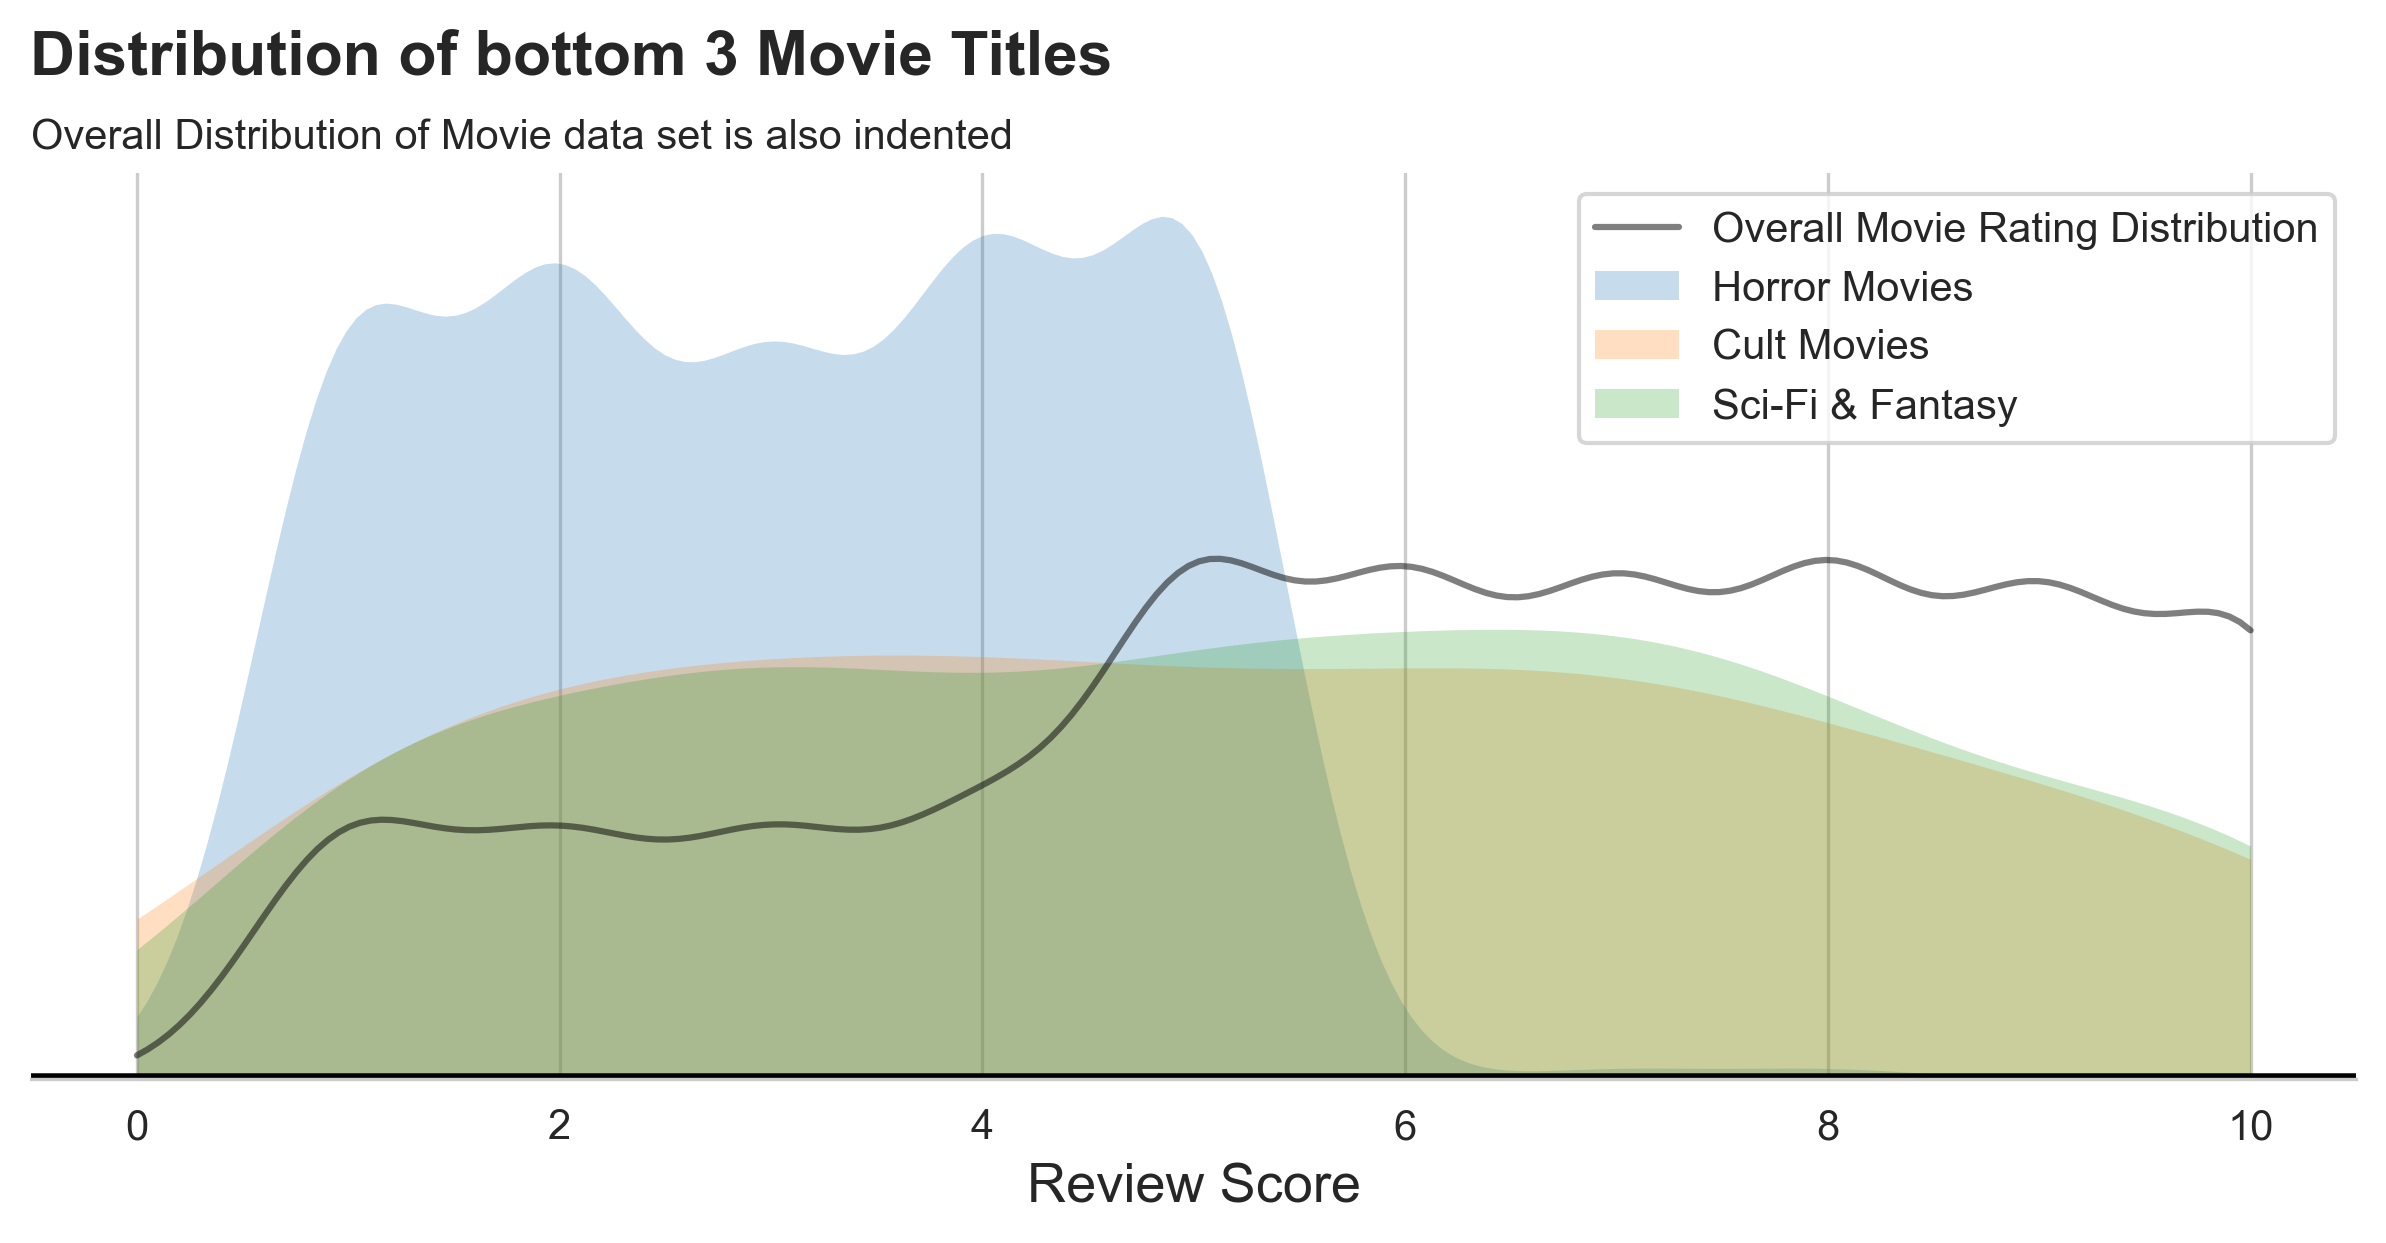

In [74]:
fig, ax=plt.subplots(dpi=300, figsize=(10,4))

# Distribution plot of overall Movie Data Set
sns.kdeplot(data=df_Movie,x='review_score', 
            clip=[0,10], label='Overall Movie Rating Distribution',
            color='black', alpha=0.5)

# Distribution Plots of top 3 genres
sns.kdeplot(data=df_Movie_genre[df_Movie_genre.listed_in=='Horror Movies'], 
            x='review_score', shade=True, 
            clip=[0,10], label='Horror Movies',
            lw=0)

sns.kdeplot(data=df_Movie_genre[df_Movie_genre.listed_in=='Cult Movies'], 
            x='review_score', shade=True, 
            clip=[0,10], label='Cult Movies',
            lw=0)

sns.kdeplot(data=df_Movie_genre[df_Movie_genre.listed_in=='Sci-Fi & Fantasy'], 
            x='review_score', shade=True, 
            clip=[0,10], label='Sci-Fi & Fantasy',
            lw=0)

# Title
plt.suptitle('Distribution of bottom 3 Movie Titles', fontsize=15,
            fontweight='bold', x=0.305,
            y=1)
plt.title('Overall Distribution of Movie data set is also indented', fontsize=10,
          loc='left')

# Removal of borders
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

# Adjusting Axis Labels
ax.set_ylabel('')
ax.set_xlabel('Review Score', fontsize=13)

# Grid
ax.grid(False,axis='y')

# Tick parameter
ax.tick_params(labelleft=False)

# Thicken X axis
ax.axhline(color='black', lw=3)

# Legend
plt.legend(loc='upper right')

plt.tight_layout;

Observation: It seems that SUSS+ users seem to poorly rate Horror movies, where there are hardly high review scores. Additionally, Cult  and Sci-fi & Fantasy genres seems to have a 50-50 mix in terms of review scores.

Action required: SUSS+ should take note to avoid adding Horror Movies to their roster. Additionally, they should take extra care in selecting cult movies and Sci-fi & Fantasy movies due to their mixed review scores.

### Task: Explore how TV Show genres affect review scores

In [75]:
# Expanding the genre column in the data set
df_TV_genre = df_TV.explode('listed_in').copy()
df_TV_genre.head()

show_id     type          title         director  \
1      s2  TV Show  Blood & Water            Empty   
1      s2  TV Show  Blood & Water            Empty   
1      s2  TV Show  Blood & Water            Empty   
2      s3  TV Show      Ganglands  Julien Leclercq   
2      s3  TV Show      Ganglands  Julien Leclercq   

                                                cast         country  \
1  [Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...  [South Africa]   
1  [Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...  [South Africa]   
1  [Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...  [South Africa]   
2  [Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...         No Data   
2  [Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...         No Data   

  date_added  release_year rating   duration               listed_in  \
1 2021-09-24          2021  TV-MA  2 Seasons  International TV Shows   
1 2021-09-24          2021  TV-MA  2 Seasons               TV Dramas   
1 2021-09-24          2021  TV-MA  2 Seasons            TV Mysteries   
2 2021-09-24          2021  TV-MA   1 Season          Crime TV Shows   
2 2021-09-24          2021  TV-MA   1 Season  International TV Shows   

                                         description  review_score  \
1  After crossing paths at a party, a Cape Town t...          10.0   
1  After crossing paths at a party, a Cape Town t...          10.0   
1  After crossing paths at a party, a Cape Town t...          10.0   
2  To protect his family from a powerful drug lor...           6.0   
2  To protect his family from a powerful drug lor...           6.0   

   date_added_year  date_added_month  Seasons  
1           2021.0               9.0        2  
1           2021.0               9.0        2  
1           2021.0               9.0        2  
2           2021.0               9.0        1  
2           2021.0               9.0        1

#### Pivot table featuring the average and count of review scores based on movie genres

In [76]:
df_TV_genre_agg=df_TV_genre[df_TV_genre.listed_in!='No genre (TV Shows)'].groupby('listed_in').agg({'review_score':['mean','count']})['review_score'].copy()
df_TV_genre_agg

mean  count
listed_in                                    
Anime Series                  5.500000    176
British TV Shows              5.778656    253
Classic & Cult TV             5.321429     28
Crime TV Shows                6.289979    469
Docuseries                    5.505076    394
International TV Shows        6.224036   1348
Kids' TV                      5.622222    450
Korean TV Shows               5.774834    151
Reality TV                    5.248031    254
Romantic TV Shows             6.040541    370
Science & Nature TV           5.714286     91
Spanish-Language TV Shows     6.022989    174
Stand-Up Comedy & Talk Shows  5.553571     56
TV Action & Adventure         5.862275    167
TV Comedies                   5.705680    581
TV Dramas                     7.572368    760
TV Horror                     4.378378     74
TV Mysteries                  5.989796     98
TV Sci-Fi & Fantasy           5.597561     82
TV Thrillers                  6.298246     57
Teen TV Shows                 5.884058     69

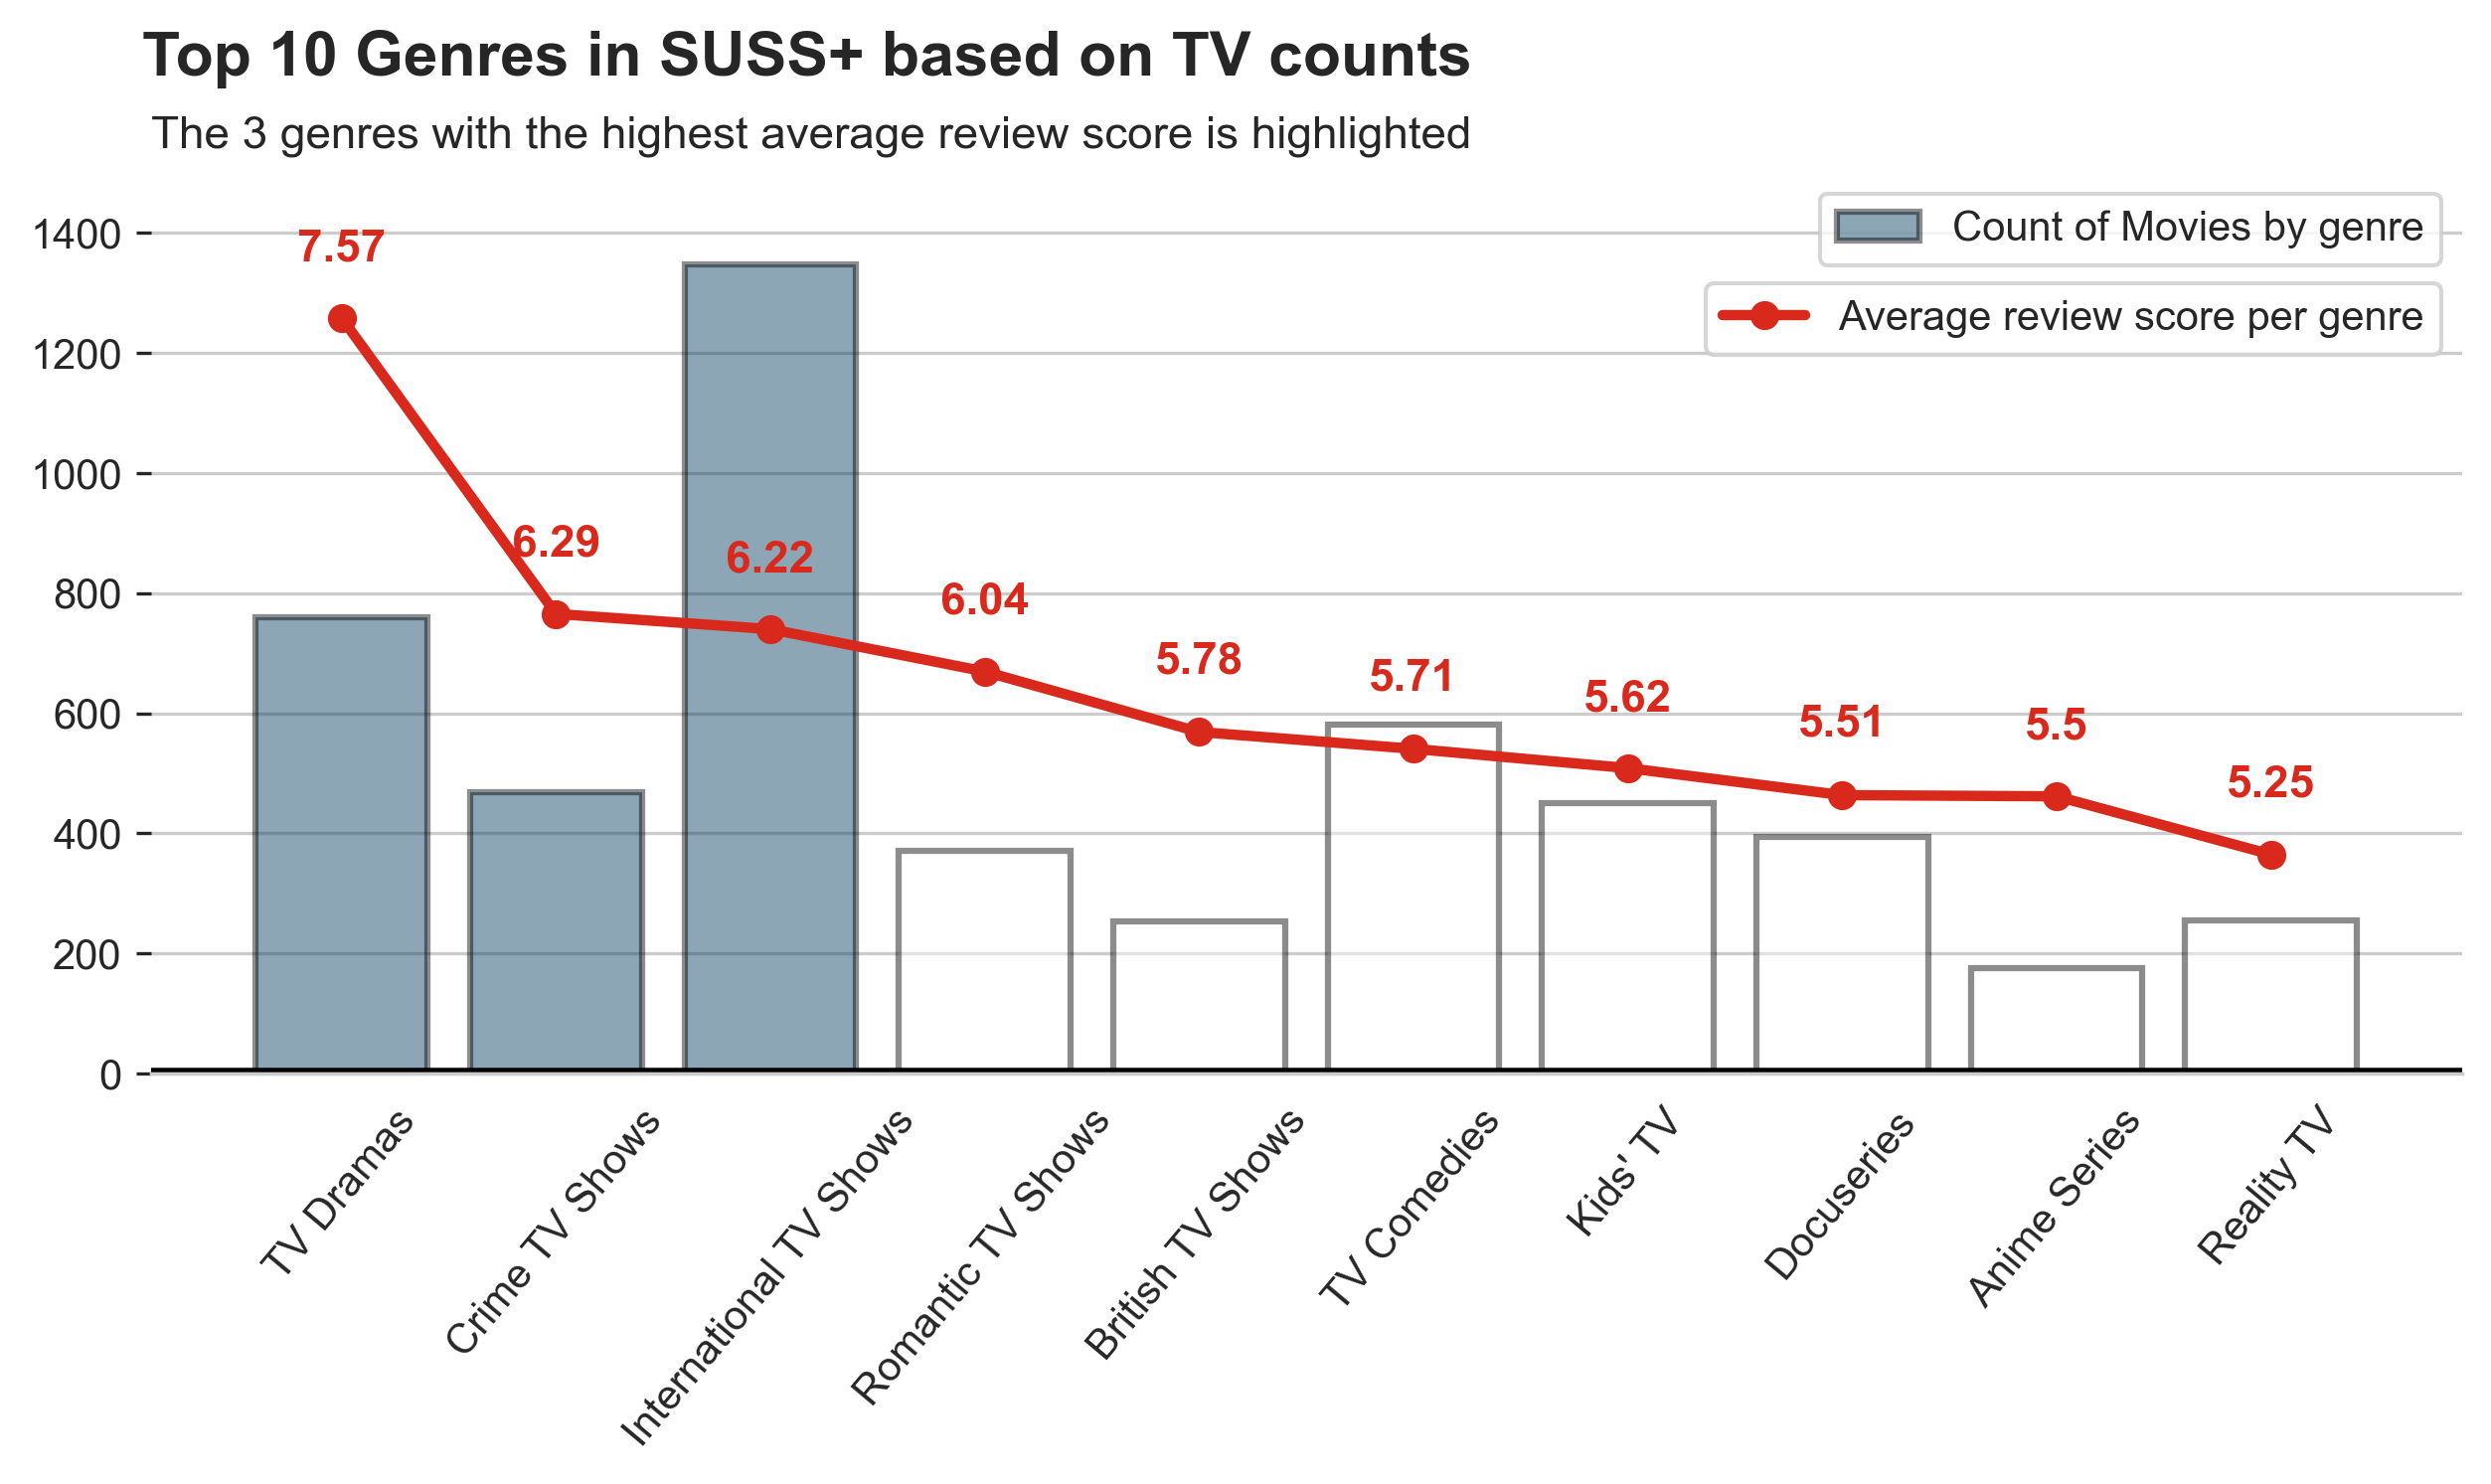

In [77]:
fig, ax=plt.subplots(figsize=(10,4), dpi=300)

# Bar plot
df_TV_largestcount=df_TV_genre_agg.nlargest(10,'count').sort_values('mean', ascending=False)
ax2=ax.twinx()

color_map = ['white' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#013b5b'

ax.bar(df_TV_largestcount.index, df_TV_largestcount['count'].values,
       alpha=0.45, color=color_map,
       edgecolor='black', lw=1.5,
       label='Count of Movies by genre')
ax.set_ylim(0,1500)

# Review Score line plot
ax2.plot(df_TV_largestcount.index, df_TV_largestcount['mean'].values,
       color='#d9291c', alpha=1,
       linewidth=2.5, marker='o',
       label='Average review score per genre')
ax2.set_ylim(4.3,8.2)

# Axis Labels
ax.tick_params(axis='x', rotation=50)
ax.tick_params(axis='both', labelsize=10)
ax2.tick_params(labelright=False, right=False)

# Remove borders
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

# Thicken X axis
ax.axhline(color='black', lw=3,
          y=0)

# Grid
ax.grid(False, axis='x')
ax2.grid(False, axis='both')

# Annotate
label=round(df_TV_largestcount['mean'], 2)
for idx, item in enumerate(label):
    ax2.annotate(f"{item}",
                xy=(idx, item+0.3),
                color='#d9291c', va='center', 
                ha='center', fontsize=11,
                fontweight='bold') 

# Legend
ax.legend(loc='best', bbox_to_anchor=(1, 1))
ax2.legend(loc='best', bbox_to_anchor=(1, 0.9))

#Title
plt.suptitle('Top 10 Genres in SUSS+ based on TV counts',
             fontsize=15, fontweight='bold',
             x=0.345, y=1)
plt.title('The 3 genres with the highest average review score is highlighted',
            fontsize=11, loc ='left')
 
plt.tight_layout;

Observation: TV Dramas, Crime TV Shows and International TV Shows seem to be the 3 highest rated movie genres. Further exploration into their distribution could possibly produce more insights.

#### Top 3 Television genres based on average review score

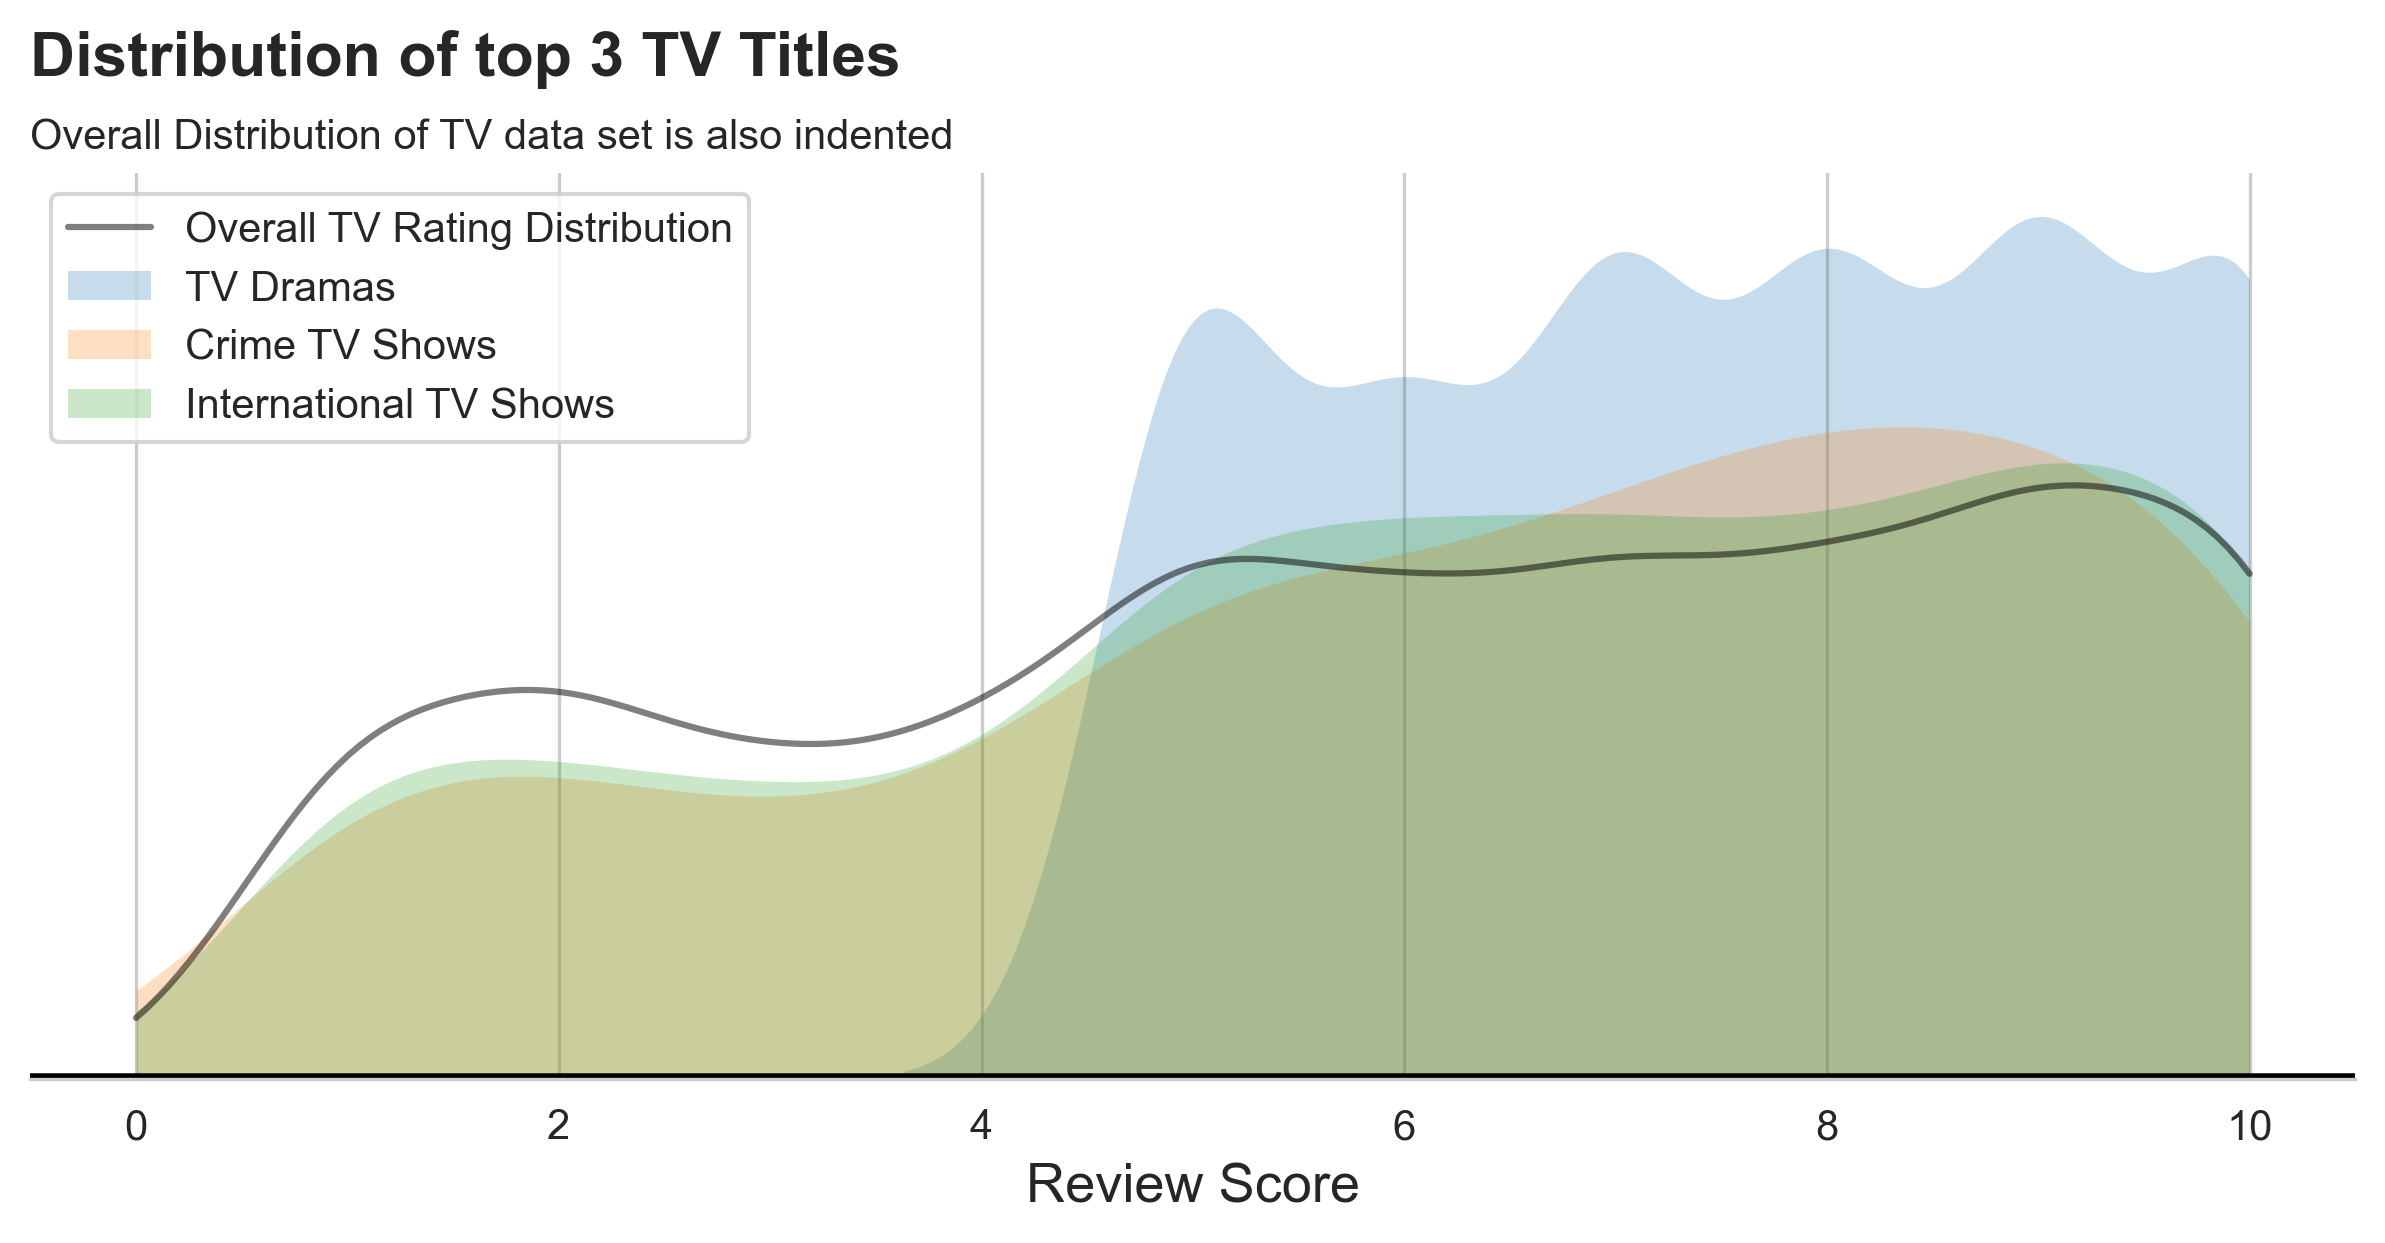

In [78]:
fig, ax=plt.subplots(dpi=300, figsize=(10,4))

# Distribution plot of overall TV Data Set
sns.kdeplot(data=df_TV,x='review_score', 
            clip=[0,10], label='Overall TV Rating Distribution',
            color='black', alpha=0.5)

# Distribution Plots of top 3 genres
sns.kdeplot(data=df_TV_genre[df_TV_genre.listed_in=='TV Dramas'], 
            x='review_score', shade=True, 
            clip=[0,10], label='TV Dramas',
            lw=0)

sns.kdeplot(data=df_TV_genre[df_TV_genre.listed_in=='Crime TV Shows'], 
            x='review_score', shade=True, 
            clip=[0,10], label='Crime TV Shows',
            lw=0)

sns.kdeplot(data=df_TV_genre[df_TV_genre.listed_in=='International TV Shows'], 
            x='review_score', shade=True, 
            clip=[0,10], label='International TV Shows',
            lw=0)

# Title
plt.suptitle('Distribution of top 3 TV Titles', fontsize=15,
            fontweight='bold', x=0.27,
            y=1)
plt.title('Overall Distribution of TV data set is also indented', fontsize=10,
          loc='left')

# Removal of borders
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

# Adjusting Axis Labels
ax.set_ylabel('')
ax.set_xlabel('Review Score', fontsize=13)

# Grid
ax.grid(False,axis='y')

# Tick parameter
ax.tick_params(labelleft=False)

# Thicken X axis
ax.axhline(color='black', lw=3)

# Legend
plt.legend(loc='upper left')

plt.tight_layout;

Observation: By comparing the distribution of the top 3 TV genres to the overall TV rating distribution, it seems that international and crime TV Shows have similarly distributed review scores, which are better than average. 
Similar to the Movie genre analysis, it seems that Drama TV Shows seem to be highly reviewed in general, with relatively low review scores in general.

Action taken: SUSS+ should aim to capitalise on this insight by introducing more TV Shows in the TV drama genre, followed by international and crime TV Shows as SUSS+ users tend to prefer these genres of movies.

#### Worst 3 Television Genres based on average review score

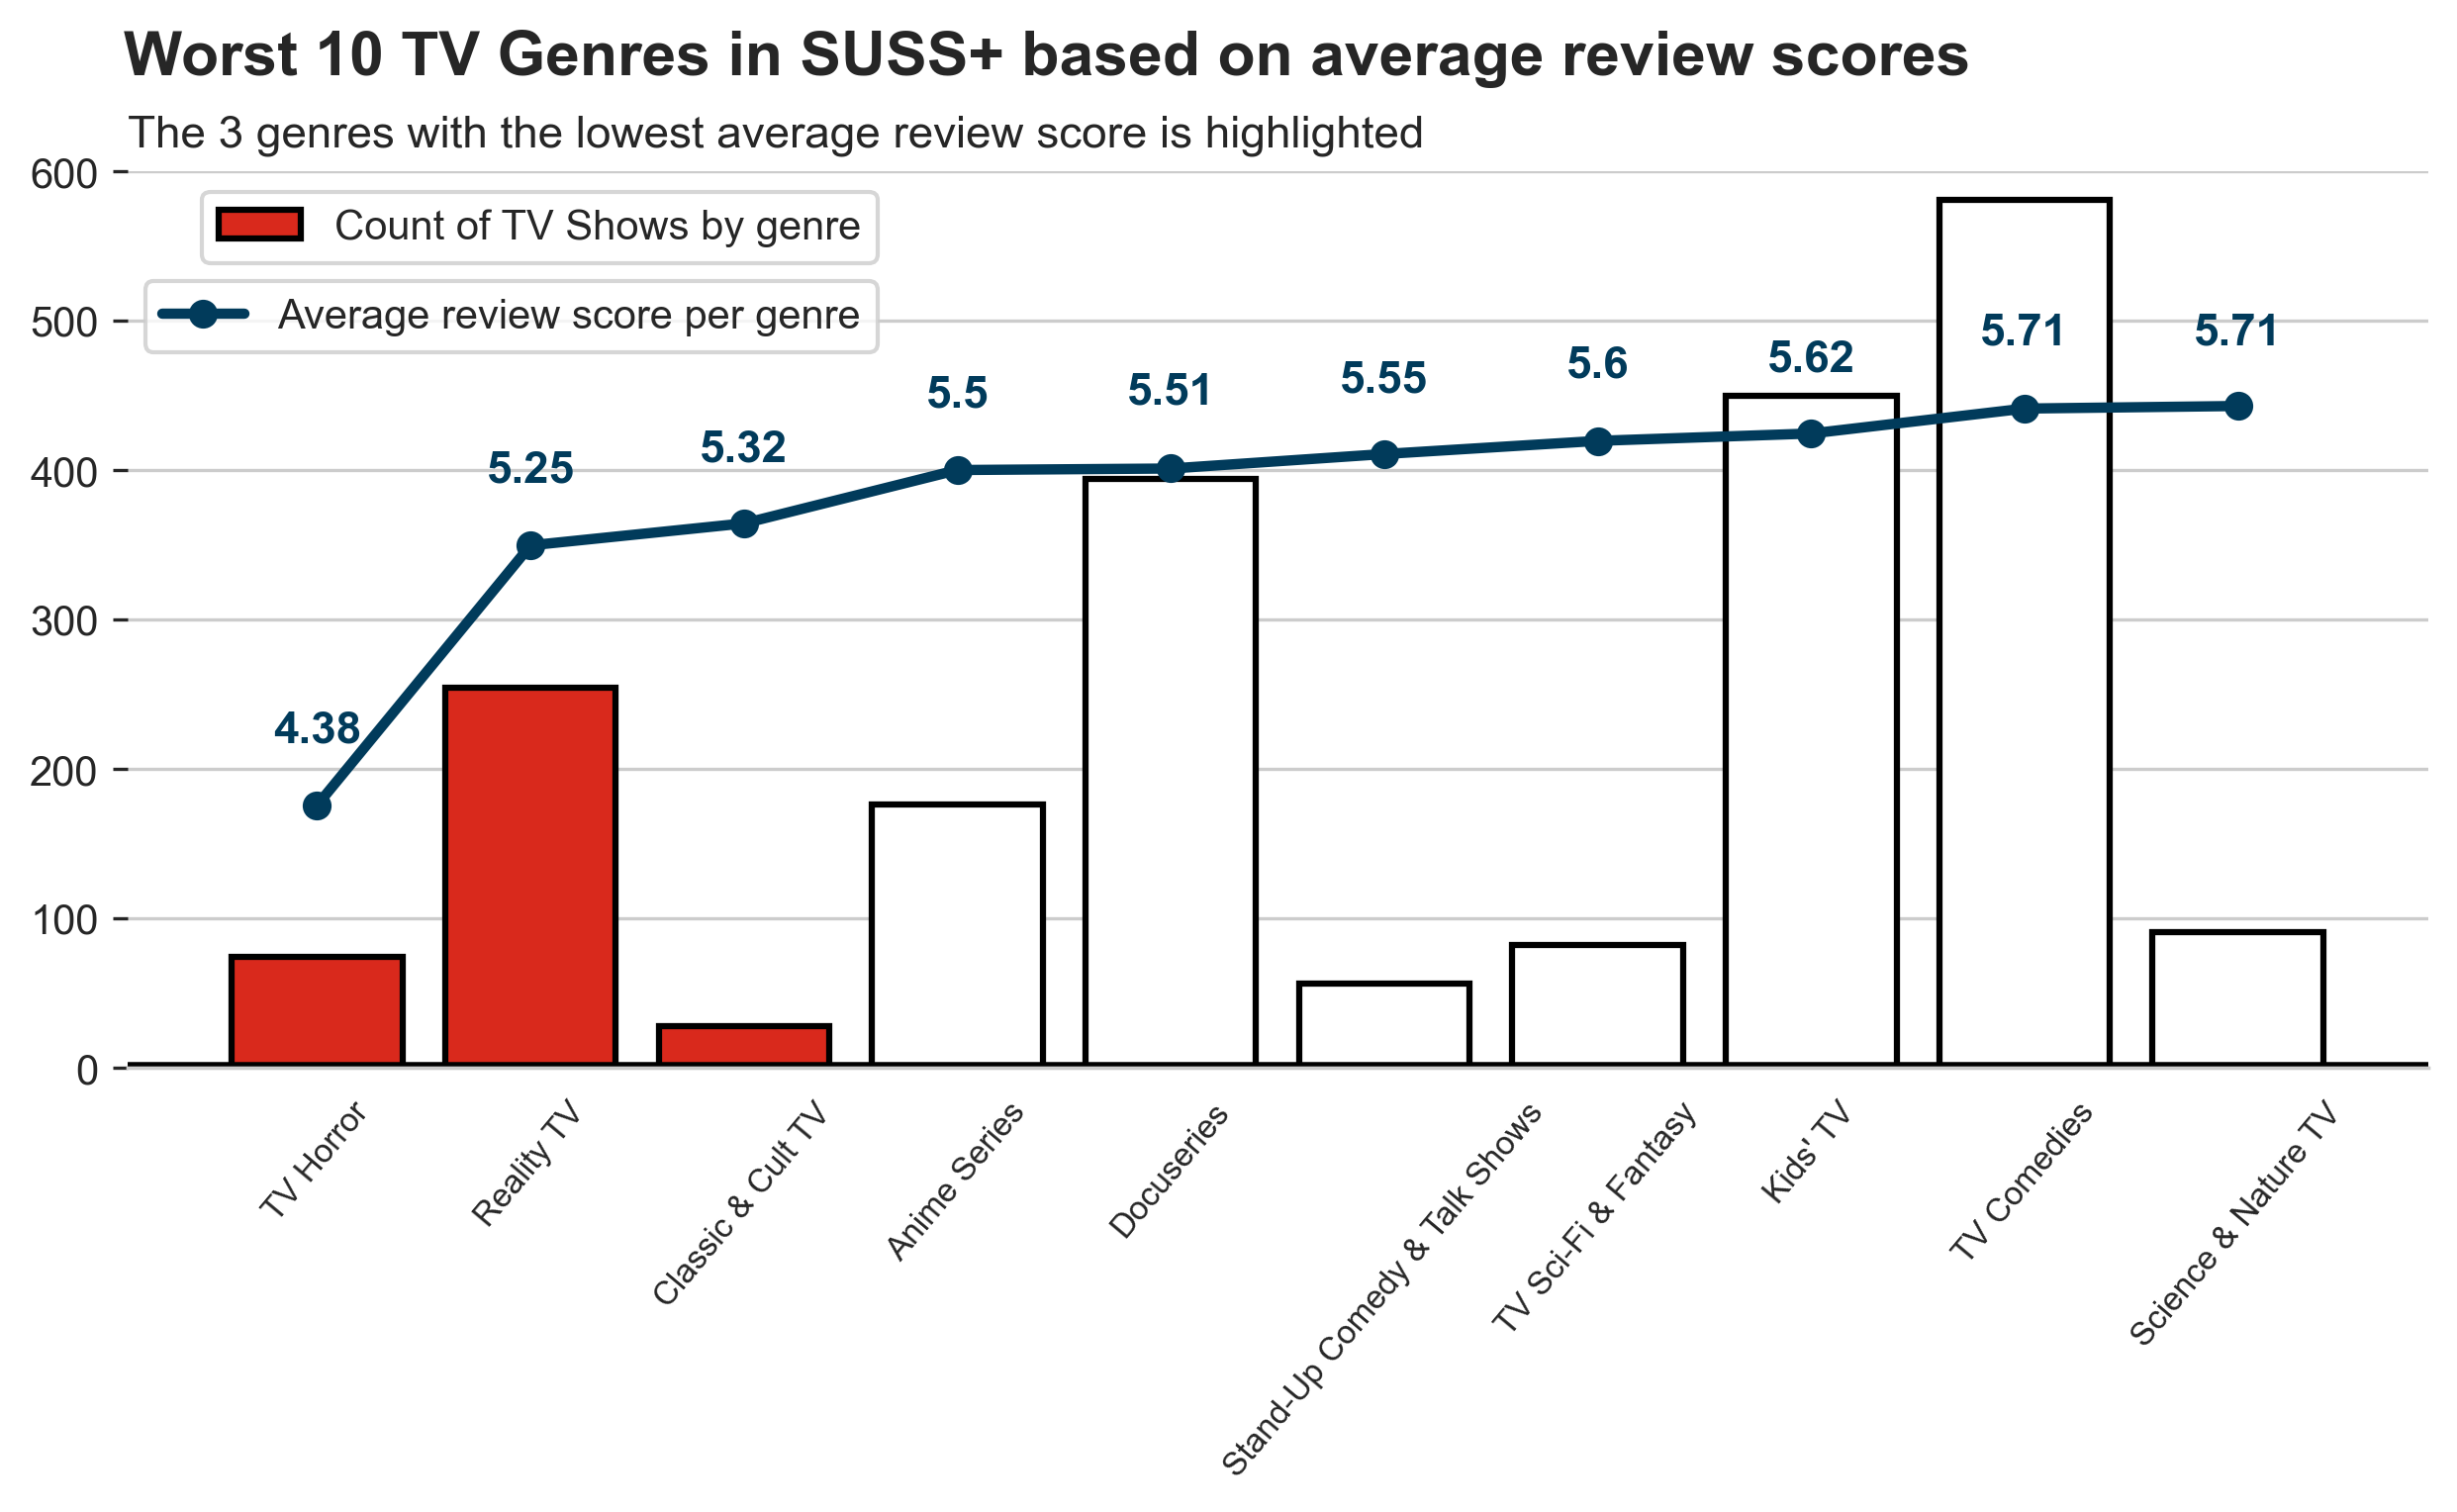

In [79]:
fig, ax=plt.subplots(figsize=(10,4), dpi=300)

# Bar plot
df_TV_worst=df_TV_genre_agg.nsmallest(10,'mean')
ax2=ax.twinx()

color_map = ['white' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#d9291c'

ax.bar(df_TV_worst.index, df_TV_worst['count'].values,
       alpha=1, color=color_map,
       edgecolor='black', lw=1.5,
       label='Count of TV Shows by genre')
ax.set_ylim(0,600)

# Review Score line plot
ax2.plot(df_TV_worst.index, df_TV_worst['mean'].values,
       color='#013b5b', alpha=1,
       linewidth=2.5, marker='o',
       label='Average review score per genre')
ax2.set_ylim(3.5,6.5)

# Axis Labels
ax.tick_params(axis='x', rotation=50)
ax.tick_params(axis='both', labelsize=10)
ax2.tick_params(labelright=False, right=False)

# Remove borders
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

# Thicken X axis
ax.axhline(color='black', lw=3,
          y=0)

# Grid
ax.grid(False, axis='x')
ax2.grid(False, axis='both')

# Annotate
label=round(df_TV_worst['mean'], 2)
for idx, item in enumerate(label):
    ax2.annotate(f"{item}",
                xy=(idx, item+0.25),
                color='#013b5b', va='center', 
                ha='center', fontsize=11,
                fontweight='bold') 

# Legend
ax2.legend(loc='best', bbox_to_anchor=(0.335, 0.9))
ax.legend(loc='best', bbox_to_anchor=(0.335, 1))

# Tick label
ax.tick_params(axis='x', labelsize=8)

#Title
plt.suptitle('Worst 10 TV Genres in SUSS+ based on average review scores',
             fontsize=15, fontweight='bold',
             x=0.435, y=1)
plt.title('The 3 genres with the lowest average review score is highlighted',
            fontsize=11, loc ='left')

plt.tight_layout;

Observation: TV Horror, Reality TV and Classic & Cult TV seem to be the 3 lowest rated TV Show genres. Further exploration into their distribution could possibly produce more insights.

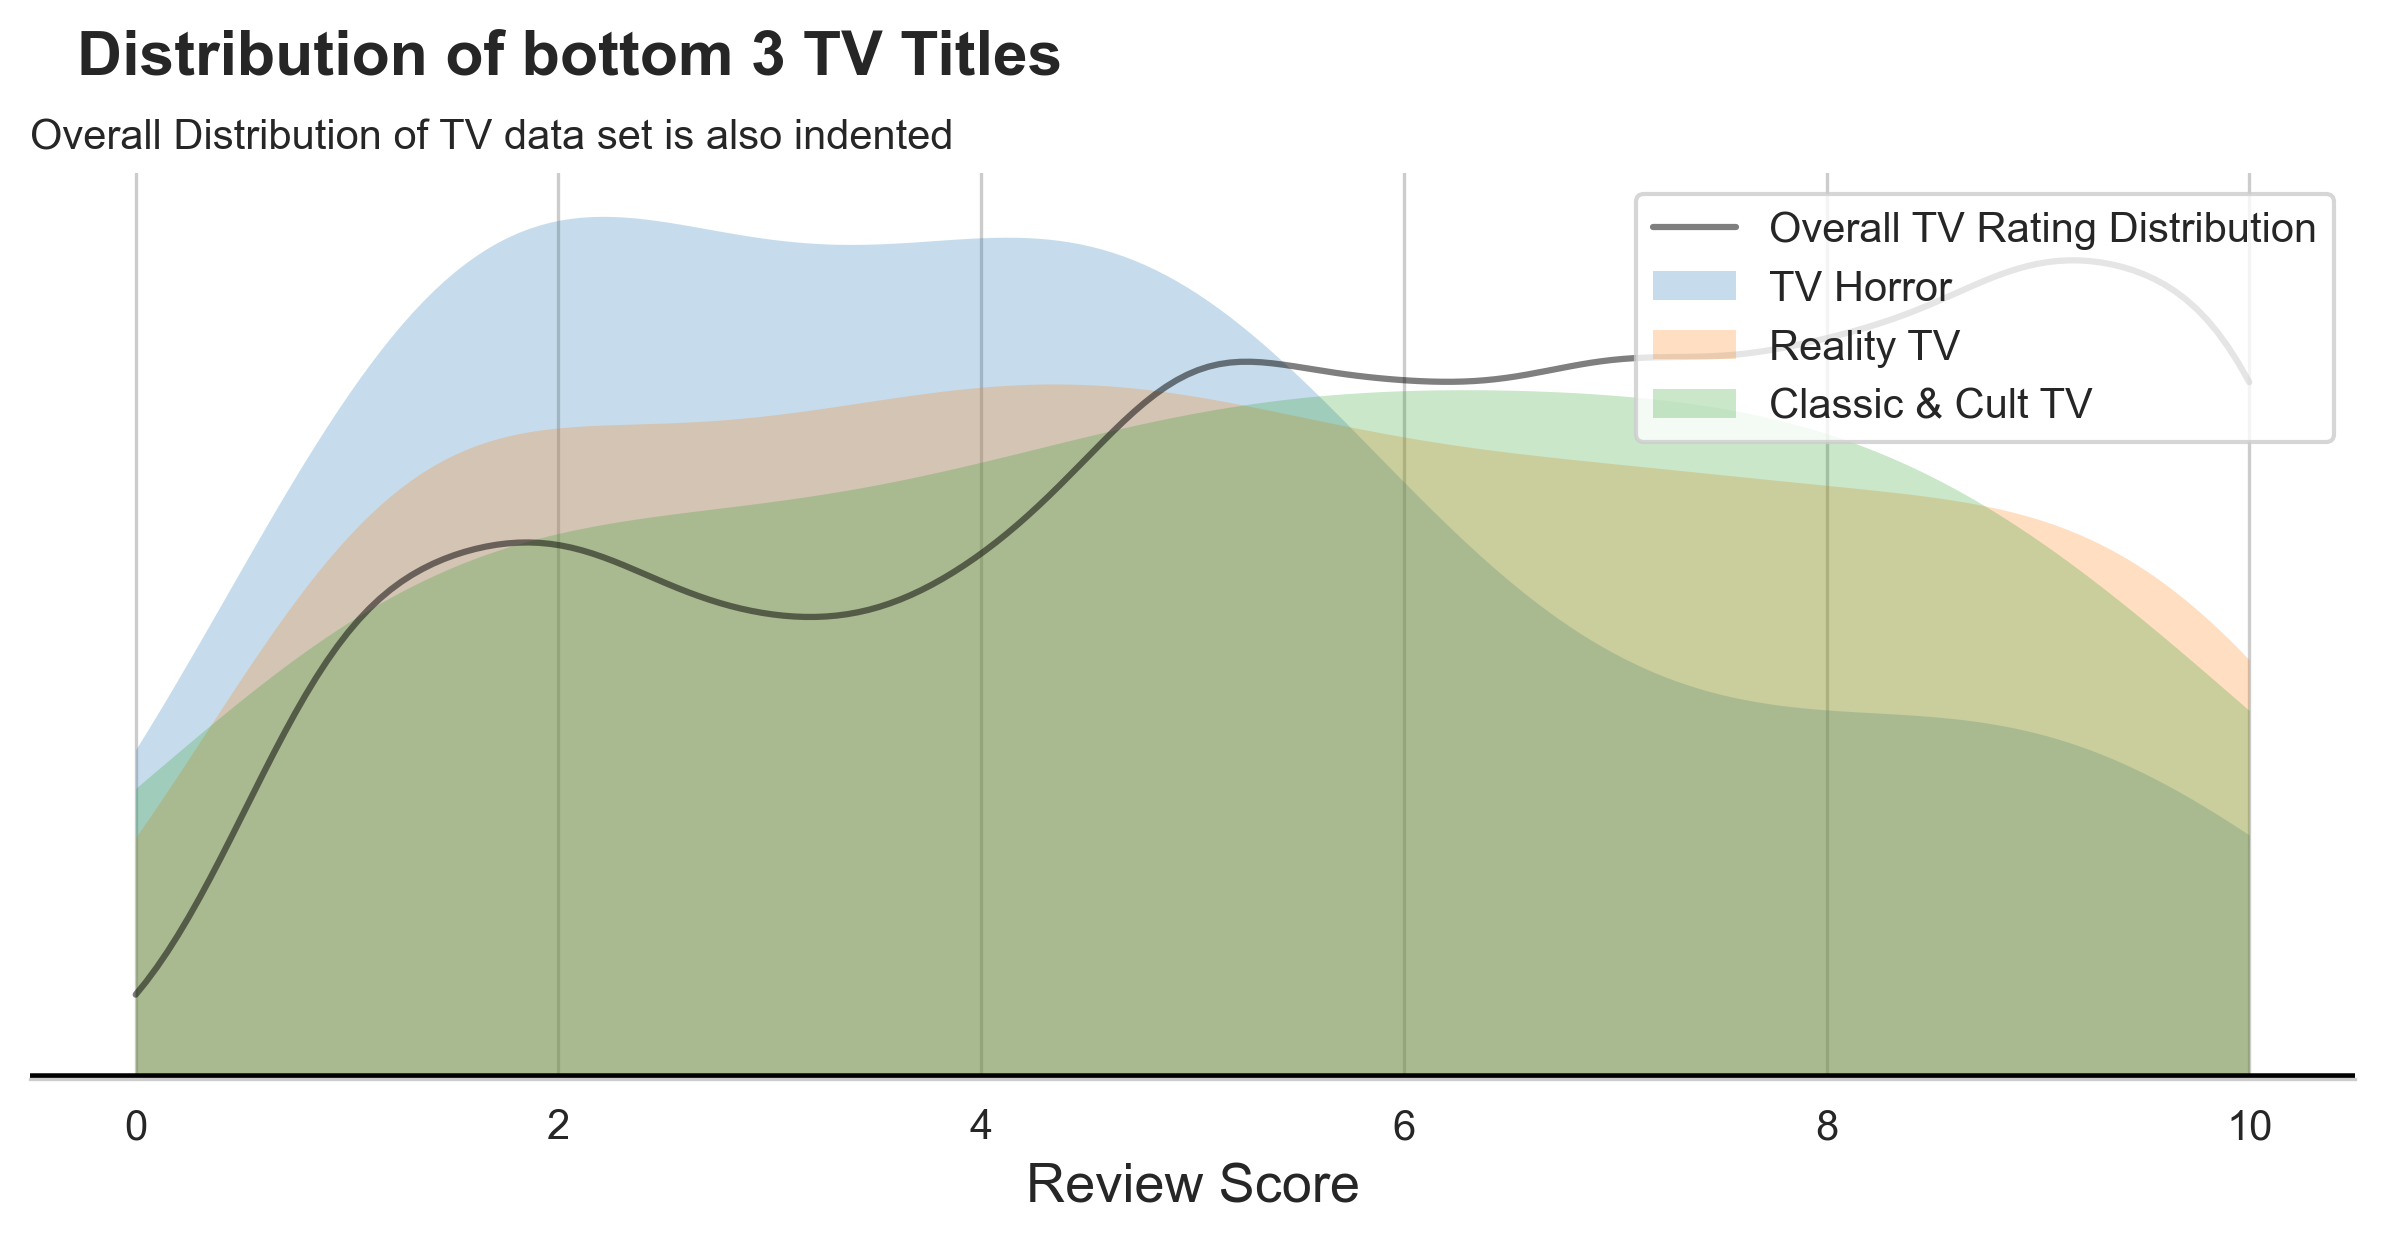

In [80]:
fig, ax=plt.subplots(dpi=300, figsize=(10,4))

# Distribution plot of overall TV Data Set
sns.kdeplot(data=df_TV,x='review_score', 
            clip=[0,10], label='Overall TV Rating Distribution',
            color='black', alpha=0.5)

# Distribution Plots of top 3 genres
sns.kdeplot(data=df_TV_genre[df_TV_genre.listed_in=='TV Horror'], 
            x='review_score', shade=True, 
            clip=[0,10], label='TV Horror',
            lw=0)

sns.kdeplot(data=df_TV_genre[df_TV_genre.listed_in=='Reality TV'], 
            x='review_score', shade=True, 
            clip=[0,10], label='Reality TV',
            lw=0)

sns.kdeplot(data=df_TV_genre[df_TV_genre.listed_in=='Classic & Cult TV'], 
            x='review_score', shade=True, 
            clip=[0,10], label='Classic & Cult TV',
            lw=0)

# Title
plt.suptitle('Distribution of bottom 3 TV Titles', fontsize=15,
            fontweight='bold', x=0.305,
            y=1)
plt.title('Overall Distribution of TV data set is also indented', fontsize=10,
          loc='left')

# Removal of borders
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

# Adjusting Axis Labels
ax.set_ylabel('')
ax.set_xlabel('Review Score', fontsize=13)

# Grid
ax.grid(False,axis='y')

# Tick parameter
ax.tick_params(labelleft=False)

# Thicken X axis
ax.axhline(color='black', lw=3)

# Legend
plt.legend(loc='upper right')

plt.tight_layout;

Observation: It seems that SUSS+ users seem to poorly rate Horror shows in general, where there isnt as much high review scores. However, Reality TV and Classic & Cult TV seems to have mixed review scores, with Reality TV having slightly worser review scores

Action required: SUSS+ should take note to avoid adding Horror TV Shows to their roster, similarly to the movie genre. Additionally, they should take extra care in selecting Reality TV and Classic & Cult TV Shows due to their mixed review scores.

### Task: Analyse how countries influence review scores

In [81]:
# Expanding the genre column in the data set
df_countryexp = df.explode('country').copy()
df_countryexp.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water            Empty   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans            Empty   
4      s5  TV Show           Kota Factory            Empty   

                                                cast        country  \
0                                            No Data  United States   
1  [Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...   South Africa   
2  [Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...        No Data   
3                                            No Data        No Data   
4  [Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                    [Documentaries]   
1  [International TV Shows, TV Dramas, TV Mysteries]   
2  [Crime TV Shows, International TV Shows, TV Ac...   
3                           [Docuseries, Reality TV]   
4  [International TV Shows, Romantic TV Shows, TV...   

                                         description  review_score  \
0  As her father nears the end of his life, filmm...           8.0   
1  After crossing paths at a party, a Cape Town t...          10.0   
2  To protect his family from a powerful drug lor...           6.0   
3  Feuds, flirtations and toilet talk go down amo...           9.0   
4  In a city of coaching centers known to train I...           7.0   

   date_added_year  date_added_month  
0           2021.0               9.0  
1           2021.0               9.0  
2           2021.0               9.0  
3           2021.0               9.0  
4           2021.0               9.0

In [82]:
# New dataframe with aggregated results by country
df_countryexp_agg=df_countryexp[df_countryexp.country!='No Data'].groupby('country').agg({'review_score':['mean','count']})['review_score'].copy()
df_countryexp_agg.head()

mean  count
country                     
Afghanistan  9.000000      1
Albania      5.000000      1
Algeria      6.666667      3
Angola       9.000000      1
Argentina    6.131868     91

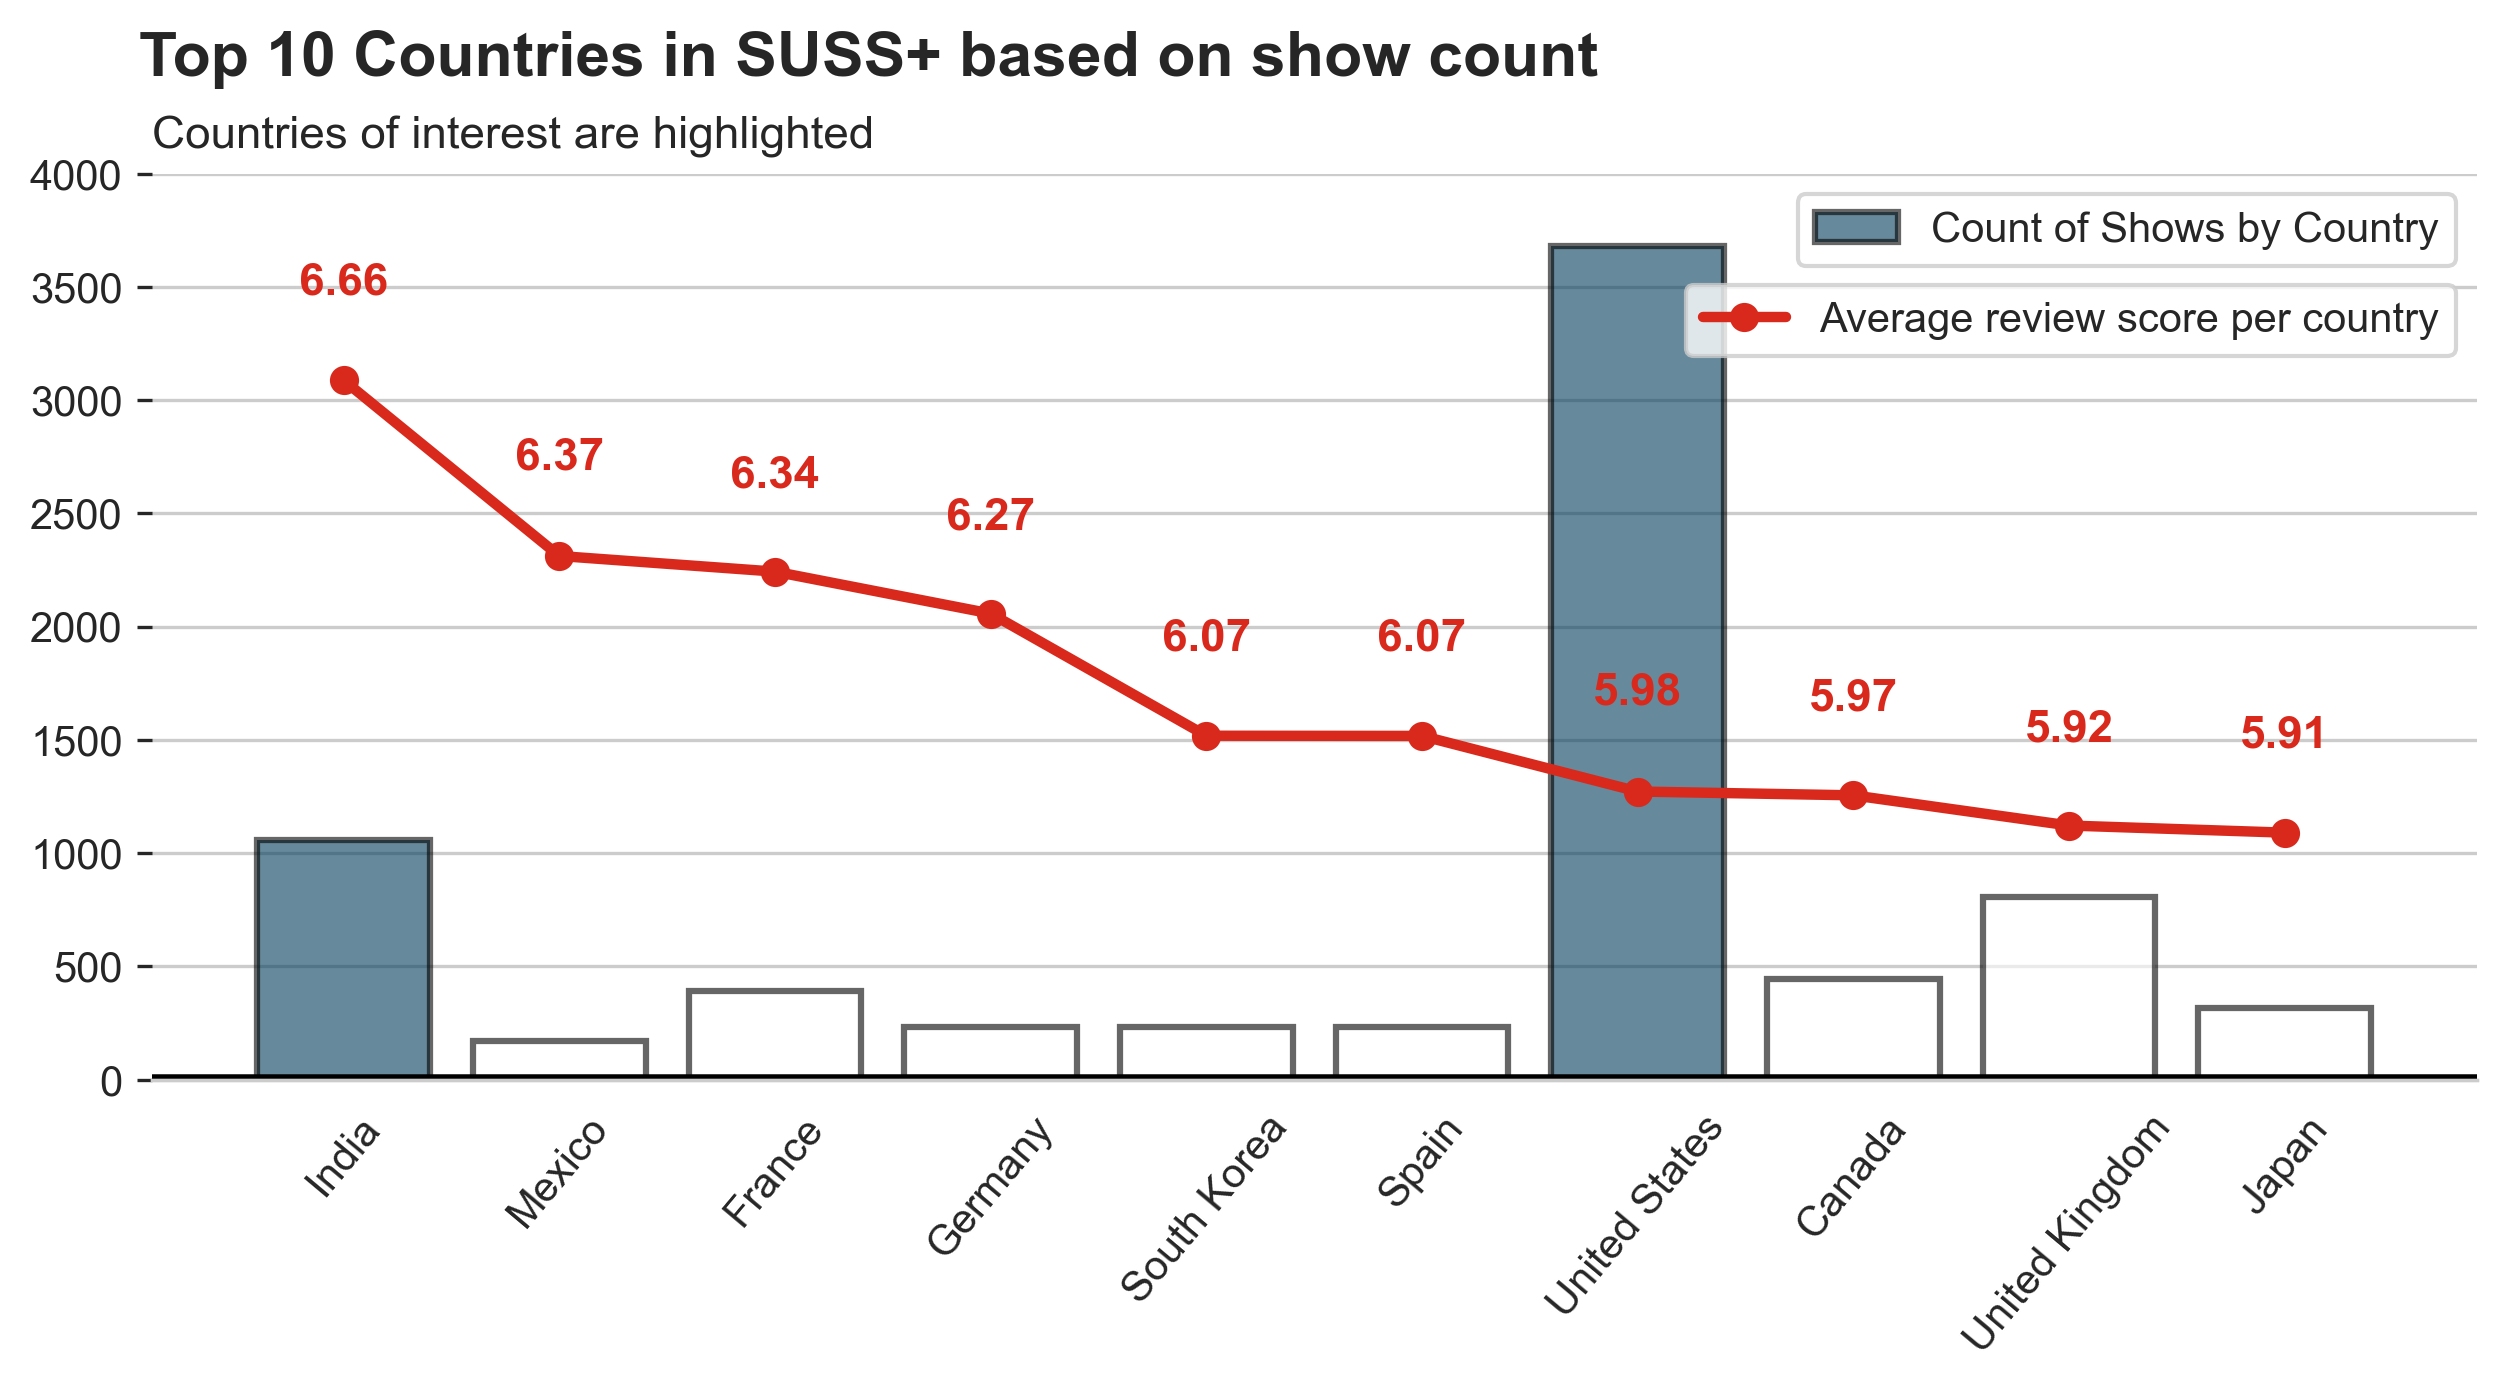

In [83]:
fig, ax=plt.subplots(figsize=(10,4), dpi=300)

# Bar plot
df_country_largestcount=df_countryexp_agg.nlargest(10,'count').sort_values('mean', ascending=False)
ax2=ax.twinx()

color_map = ['white' for _ in range(10)]
color_map[0] = color_map[6] =  '#013b5b'

ax.bar(df_country_largestcount.index, df_country_largestcount['count'].values,
       alpha=0.6, color=color_map,
       edgecolor='black', lw=1.5,
       label='Count of Shows by Country')
ax.set_ylim(0,4000)

# Review Score line plot
ax2.plot(df_country_largestcount.index, df_country_largestcount['mean'].values,
       color='#d9291c', alpha=1,
       linewidth=2.5, marker='o',
       label='Average review score per country')
ax2.set_ylim(5.5,7)

# Axis Labels
ax.tick_params(axis='x', rotation=50)
ax.tick_params(axis='both', labelsize=10)
ax2.tick_params(labelright=False, right=False)

# Remove borders
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

# Thicken X axis
ax.axhline(color='black', lw=3,
          y=0)

# Grid
ax.grid(False, axis='x')
ax2.grid(False, axis='both')

# Annotate
label=round(df_country_largestcount['mean'], 2)
for idx, item in enumerate(label):
    ax2.annotate(f"{item}",
                xy=(idx, item+0.16),
                color='#d9291c', va='center', 
                ha='center', fontsize=11,
                fontweight='bold') 

# Legend
ax.legend(loc='best', bbox_to_anchor=(1, 1))
ax2.legend(loc='best', bbox_to_anchor=(1, 0.9))

#Title
plt.suptitle('Top 10 Countries in SUSS+ based on show count',
             fontsize=15, fontweight='bold',
             x=0.364, y=1)
plt.title('Countries of interest are highlighted',
            fontsize=11, loc ='left')
 
plt.tight_layout;

Observation: The most popular country with content in SUSS+ are is India, having the highest average rating. However, US  has the highest content of any country, having more content than the other 9 countries combined. I believe further analysis can be done for SUSS+ to enhance their show selections.

Suggestion:
Knowing this, we could possibly target countries where there might be high potential but lesser content now. Three of such suggestions will be India, France and Mexico, where they have the highest average review score but having lesser content than the United States.

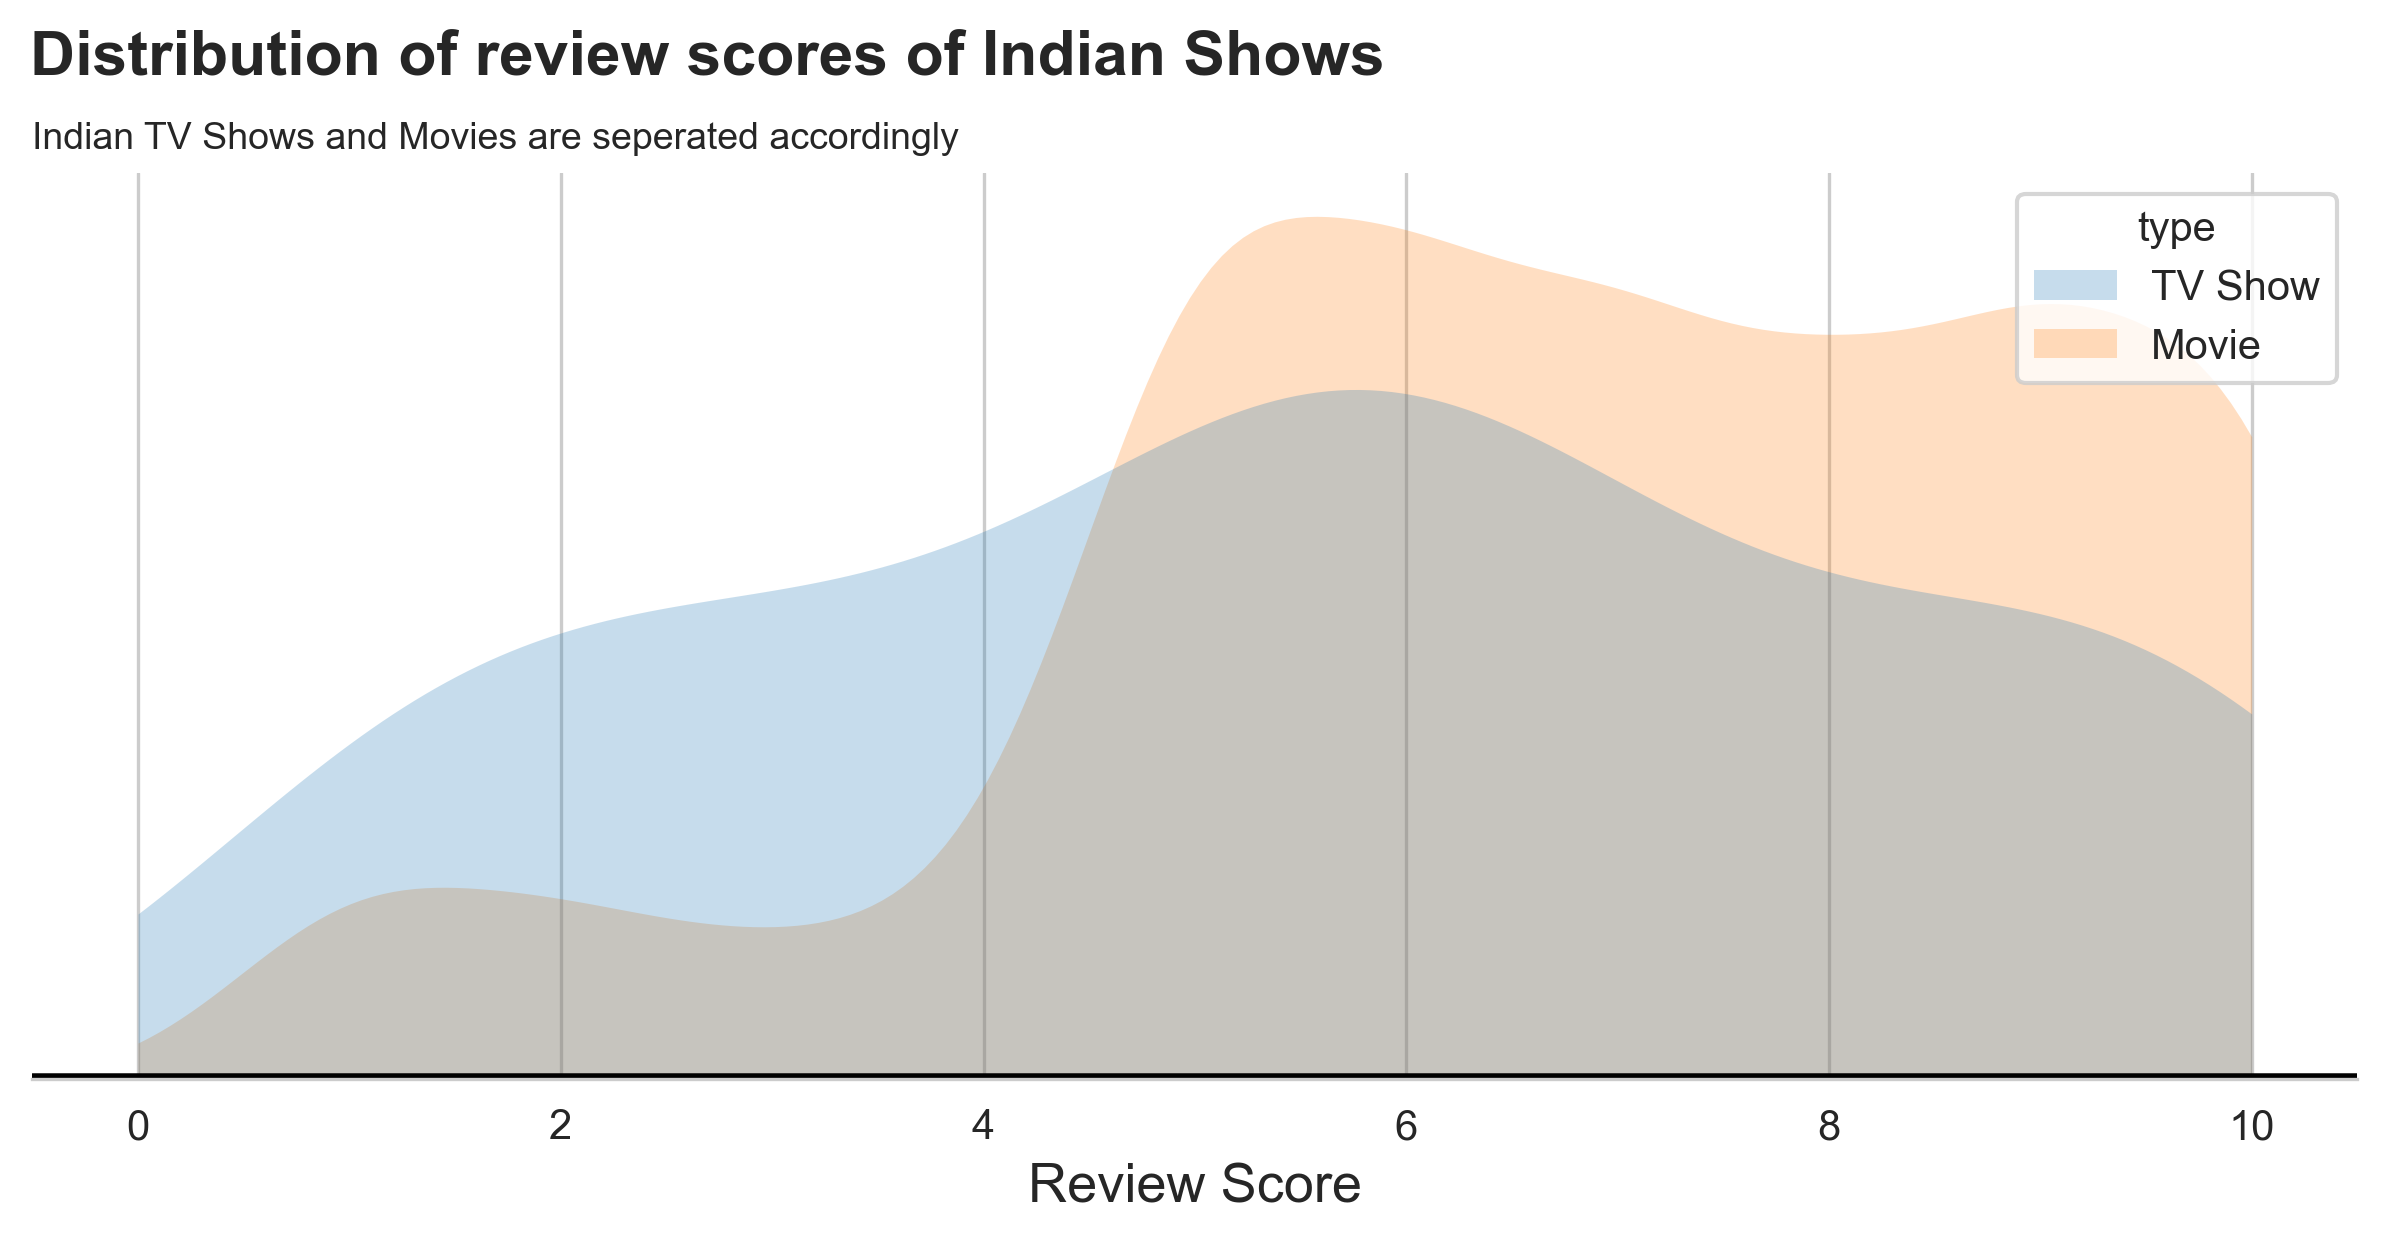

In [84]:
fig, ax=plt.subplots(figsize=(10,4), dpi=300)


# Distribution Plots of top 3 countries
sns.kdeplot(data=df_countryexp[df_countryexp.country=='India'], 
            x='review_score', shade=True, 
            clip=[0,10],
            lw=0, hue='type', common_norm=False)

# Title
plt.suptitle('Distribution of review scores of Indian Shows', fontsize=15,
            fontweight='bold', x=0.35,
            y=1)
plt.title('Indian TV Shows and Movies are seperated accordingly', fontsize=9,
          loc='left')


# Removal of borders
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

# Adjusting Axis Labels
ax.set_ylabel('')
ax.set_xlabel('Review Score', fontsize=13)

# Grid
ax.grid(False,axis='y')

# Tick parameter
ax.tick_params(labelleft=False)

# Thicken X axis
ax.axhline(color='black', lw=3)

plt.tight_layout;


Observation: It can be seen that Indian Movies are the preferred source of entertainment for SUSS+ viewers, where it has a higher percentage of high review scores as compared to TV shows.

Action required: SUSS+ can utilise this insight by adopting more Indian Movies as part of their streaming roster in order to increase viewership.

Further Insight can be done on the several Indian genres in order to gain a better understanding of the data.

In [85]:
# New dataset with exploded country list
df_movie_genre_country=df_Movie_genre.explode('country').copy()

In [86]:
# New dataset with Indian only movies
df_India=df_movie_genre_country[df_movie_genre_country.country=='India'].copy()

In [87]:
# Pivot Table
df_India_agg=df_India[df_India.listed_in!='International Movies'].groupby('listed_in').agg({'review_score':['mean','count']})['review_score'].copy()
df_India_agg

mean  count
listed_in                                
Action & Adventure        6.410072    139
Children & Family Movies  6.615385     26
Classic Movies            8.181818     11
Comedies                  6.629969    327
Cult Movies               5.800000      5
Documentaries             4.555556     27
Dramas                    7.488024    668
Faith & Spirituality      6.750000      4
Horror Movies             2.891892     37
Independent Movies        7.167665    167
LGBTQ Movies              4.500000      2
Music & Musicals          6.405941    101
Romantic Movies           6.595041    121
Sci-Fi & Fantasy          5.500000     12
Sports Movies             6.529412     17
Stand-Up Comedy           5.000000      6
Thrillers                 6.242105     95

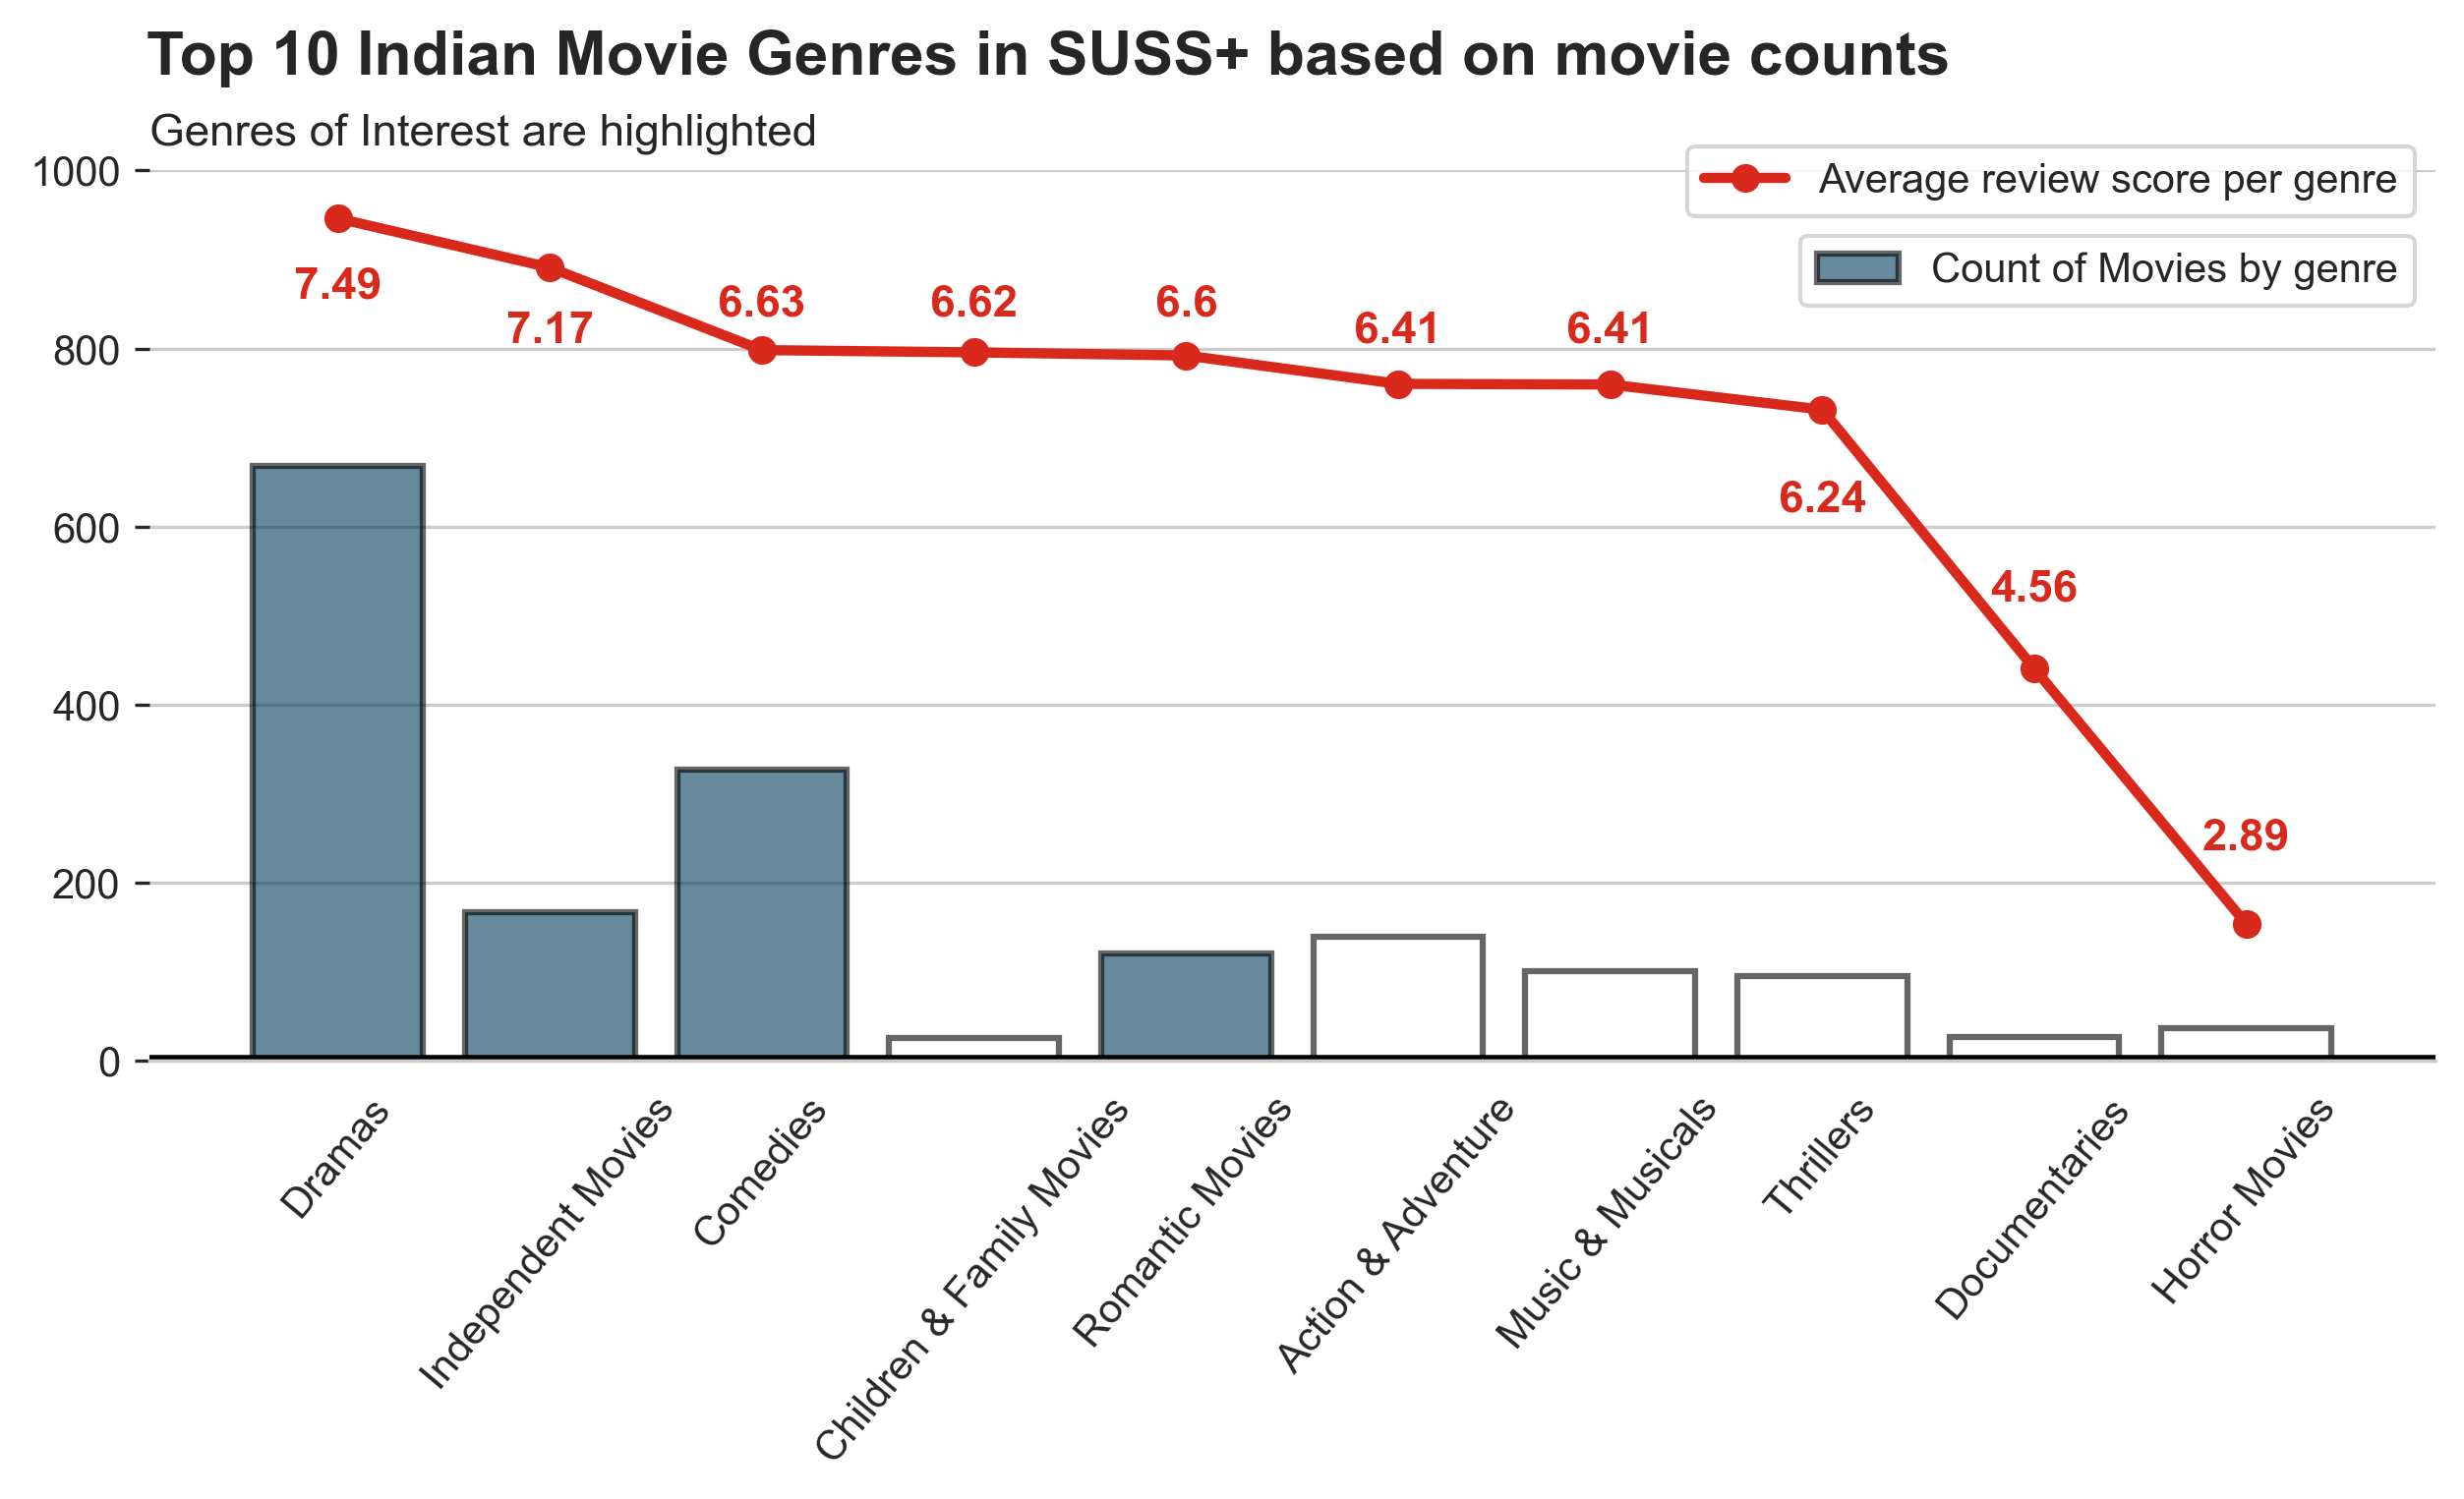

In [88]:
fig, ax=plt.subplots(figsize=(10,4), dpi=300)

# Bar plot
df_India_largestcount=df_India_agg.nlargest(10,'count').sort_values('mean', ascending=False)
ax2=ax.twinx()

color_map = ['white' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = color_map[4]=  '#013b5b'

ax.bar(df_India_largestcount.index, df_India_largestcount['count'].values,
       alpha=0.6, color=color_map,
       edgecolor='black', lw=1.5,
       label='Count of Movies by genre')
ax.set_ylim(0,1000)

# Review Score line plot
ax2.plot(df_India_largestcount.index, df_India_largestcount['mean'].values,
       color='#d9291c', alpha=1,
       linewidth=2.5, marker='o',
       label='Average review score per genre')
ax2.set_ylim(2,7.8)

# Axis Labels
ax.tick_params(axis='x', rotation=50)
ax.tick_params(axis='both', labelsize=10)
ax2.tick_params(labelright=False, right=False)

# Remove borders
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

# Thicken X axis
ax.axhline(color='black', lw=3,
          y=0)

# Grid
ax.grid(False, axis='x')
ax2.grid(False, axis='both')

# Annotate
label=round(df_India_largestcount['mean'], 2)
review_label=[870,820,850,850,850,820,820,630,530,250]
for idx, item in enumerate(label):
    ax.annotate(f"{item}",
                xy=(idx, review_label[idx]),
                color='#d9291c', va='center', 
                ha='center', fontsize=11,
                fontweight='bold') 

# Legend
ax.legend(loc='best', bbox_to_anchor=(1,0.95))
ax2.legend(loc='best', bbox_to_anchor=(1, 1.05))

#Title
plt.suptitle('Top 10 Indian Movie Genres in SUSS+ based on movie counts',
             fontsize=15, fontweight='bold',
             x=0.43, y=1)
plt.title('Genres of Interest are highlighted',
            fontsize=11, loc ='left')
 
plt.tight_layout;

Observation: Indian Dramas, Independent Movies and , interestingly, Comedy Movies are highly rated by SUSS+ viewers. 

Additionally, Indian children & family and Romantic movies have a similar average review score as the Comedies genre. However, children & family Movies have a below average movie count, thus the average review score calculated for that genre may not be properly represented.

Action Required: Thus, SUSS+ should aim to add Indian movies with the highlighted genres and avoid Indian TV Shows as they generally are not well liked by the viewers of SUSS+

In [89]:
# dataframe with only United States made movies.
df_US=df_countryexp[df_countryexp.country=='United States'].copy()
df_US.head()

show_id     type                 title         director  \
0       s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
7       s8    Movie               Sankofa     Haile Gerima   
9      s10    Movie          The Starling   Theodore Melfi   
15     s16  TV Show     Dear White People            Empty   
27     s28    Movie             Grown Ups     Dennis Dugan   

                                                 cast        country  \
0                                             No Data  United States   
7   [Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...  United States   
9   [Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...  United States   
15  [Logan Browning, Brandon P. Bell, DeRon Horton...  United States   
27  [Adam Sandler, Kevin James, Chris Rock, David ...  United States   

   date_added  release_year rating   duration  \
0  2021-09-25          2020  PG-13     90 min   
7  2021-09-24          1993  TV-MA    125 min   
9  2021-09-24          2021  PG-13    104 min   
15 2021-09-22          2021  TV-MA  4 Seasons   
27 2021-09-20          2010  PG-13    103 min   

                                            listed_in  \
0                                     [Documentaries]   
7   [Dramas, Independent Movies, International Mov...   
9                                  [Comedies, Dramas]   
15                           [TV Comedies, TV Dramas]   
27                                         [Comedies]   

                                          description  review_score  \
0   As her father nears the end of his life, filmm...           8.0   
7   On a photo shoot in Ghana, an American model s...           8.0   
9   A woman adjusting to life after a loss contend...           5.0   
15  Students of color navigate the daily slights a...           7.0   
27  Mourning the loss of their beloved junior high...           4.0   

    date_added_year  date_added_month  
0            2021.0               9.0  
7            2021.0               9.0  
9            2021.0               9.0  
15           2021.0               9.0  
27           2021.0               9.0

In [90]:
#Pivot table of the count of American made shows seperated by movie type and review score
df_US=df_US.groupby(['review_score','type']).count().unstack('type')['show_id']
df_US

type          Movie  TV Show
review_score                
1.0             204       91
2.0             193       93
3.0             203       59
4.0             216       67
5.0             342      111
6.0             293       86
7.0             313      101
8.0             350       96
9.0             296      119
10.0            337      110

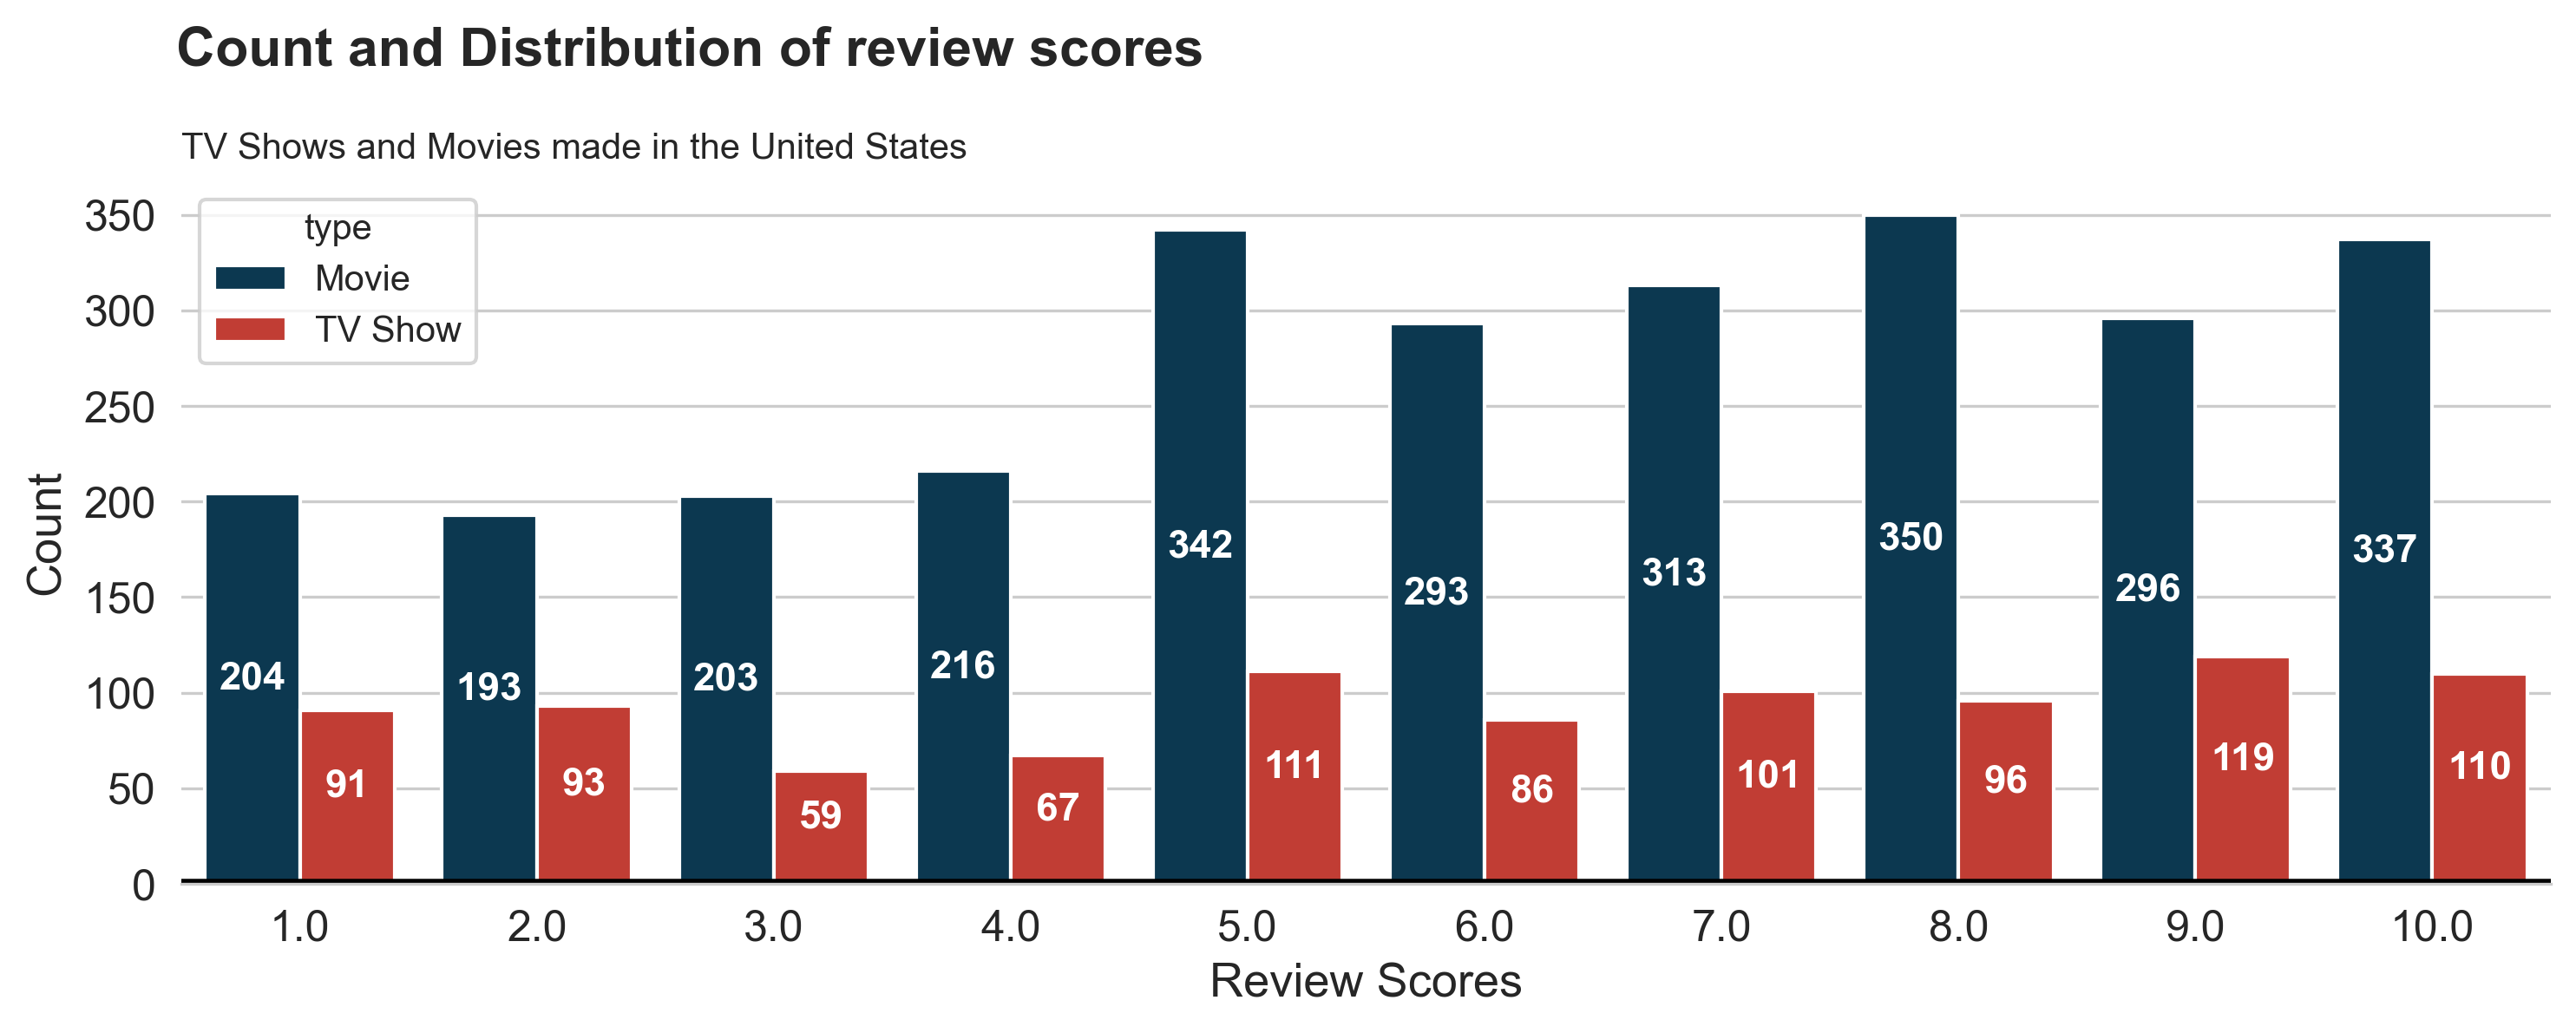

In [91]:
fig, ax = plt.subplots(figsize=(10,4), dpi=300)

# Countplot
#df_US.plot(kind='bar', stacked='True',
#           color=['#013b5b','#d9291c'], width=0.7,
#           ax=ax)
sns.countplot(data=df_countryexp[df_countryexp.country=='United States'],
              x='review_score', hue='type',
              palette=['#013b5b','#d9291c'])

#Title
plt.suptitle('Count and Distribution of review scores',fontsize = 15,
             fontweight='bold', x=0.27)
plt.title('TV Shows and Movies made in the United States', fontsize=10,
         loc='left')

# Remove border from plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Thicken the bottom line
plt.axhline(y = 0, color = 'black', linewidth = 3)

# Annotations
data=df_US
data_movie=df_US['Movie']
data_TV=df_US['TV Show']

for i in data.index:
    ax.annotate(f"{data_movie[i]}",
                xy=(i-1.2, data_movie[i]/2),
                ha='center', color='white',
                fontsize=11, fontweight='bold')

    ax.annotate(f"{data_TV[i]}",
                xy=(i-1+0.2, data_TV[i]/2),
                ha='center', color='white',
                fontsize=11, fontweight='bold')
    
# Adjust Ticks
ax.tick_params(axis='both', which='major', 
               labelsize=12, rotation=0)

# Adjust Axis Labels
plt.ylabel('Count', fontsize =13)
plt.xlabel('Review Scores', fontsize =13)

plt.tight_layout();

Observation: As United States has the highest count of movies on SUSS+, it would be wise for us to analyse how review scores are distributed. 

It can be seen that American movies are given much better review scores than American TV Shows, where the distribution of review scores for American TV shows are evenly distributed, unlike American-made  

Action required: Given this analysis, I would recommend SUSS+ to introduce more American movies instead of American TV Shows since it is more preferred by the users of SUSS+

### Task: Explore how are the review scores distributed for awarded or nominated shows.

In [92]:
# Awarded or nominated movies
word_search=r"\bEmmy\b|\bAward-winning\b|\baward-winning\b|\bGolden Globe\b|\bGrammy\b|\bAcademy Award\b"
df_award=df[df.description.str.contains(word_search)]
df_award.head()

show_id     type                                              title  \
274     s275  TV Show                                  Grace and Frankie   
526     s527  TV Show                            Orange Is the New Black   
848     s849  TV Show                                     Master of None   
849     s850    Movie  Sam Smith: Love Goes - Live at Abbey Road Studios   
1059   s1060  TV Show                                     House of Cards   

     director                                               cast  \
274     Empty  [Jane Fonda, Lily Tomlin, Martin Sheen, Sam Wa...   
526     Empty  [Taylor Schilling, Kate Mulgrew, Laura Prepon,...   
848     Empty  [Aziz Ansari, NoÃ«l Wells, Eric Wareheim, Lena...   
849     Empty                                        [Sam Smith]   
1059    Empty  [Kevin Spacey, Robin Wright, Kate Mara, Corey ...   

              country date_added  release_year rating   duration  \
274   [United States] 2021-08-13          2021  TV-MA  7 Seasons   
526   [United States] 2021-07-06          2019  TV-MA  7 Seasons   
848   [United States] 2021-05-23          2021  TV-MA  3 Seasons   
849           No Data 2021-05-22          2020   TV-G     61 min   
1059  [United States] 2021-04-14          2018  TV-MA  6 Seasons   

                                     listed_in  \
274                   [TV Comedies, TV Dramas]   
526                   [TV Comedies, TV Dramas]   
848                   [TV Comedies, TV Dramas]   
849   [International Movies, Music & Musicals]   
1059                 [TV Dramas, TV Thrillers]   

                                            description  review_score  \
274   Theyâ€™re not friends, but when their husbands...           8.0   
526   A privileged New Yorker ends up in a women's p...          10.0   
848   Dev tries to jump-start his acting career and ...           6.0   
849   Grammy-winning artist Sam Smith gives an intim...           7.0   
1059  A ruthless politician will stop at nothing to ...           9.0   

      date_added_year  date_added_month  
274            2021.0               8.0  
526            2021.0               7.0  
848            2021.0               5.0  
849            2021.0               5.0  
1059           2021.0               4.0

Text(0.0, 1.0, 'Distribution of Review Scores for Awarded/Nominated Shows')

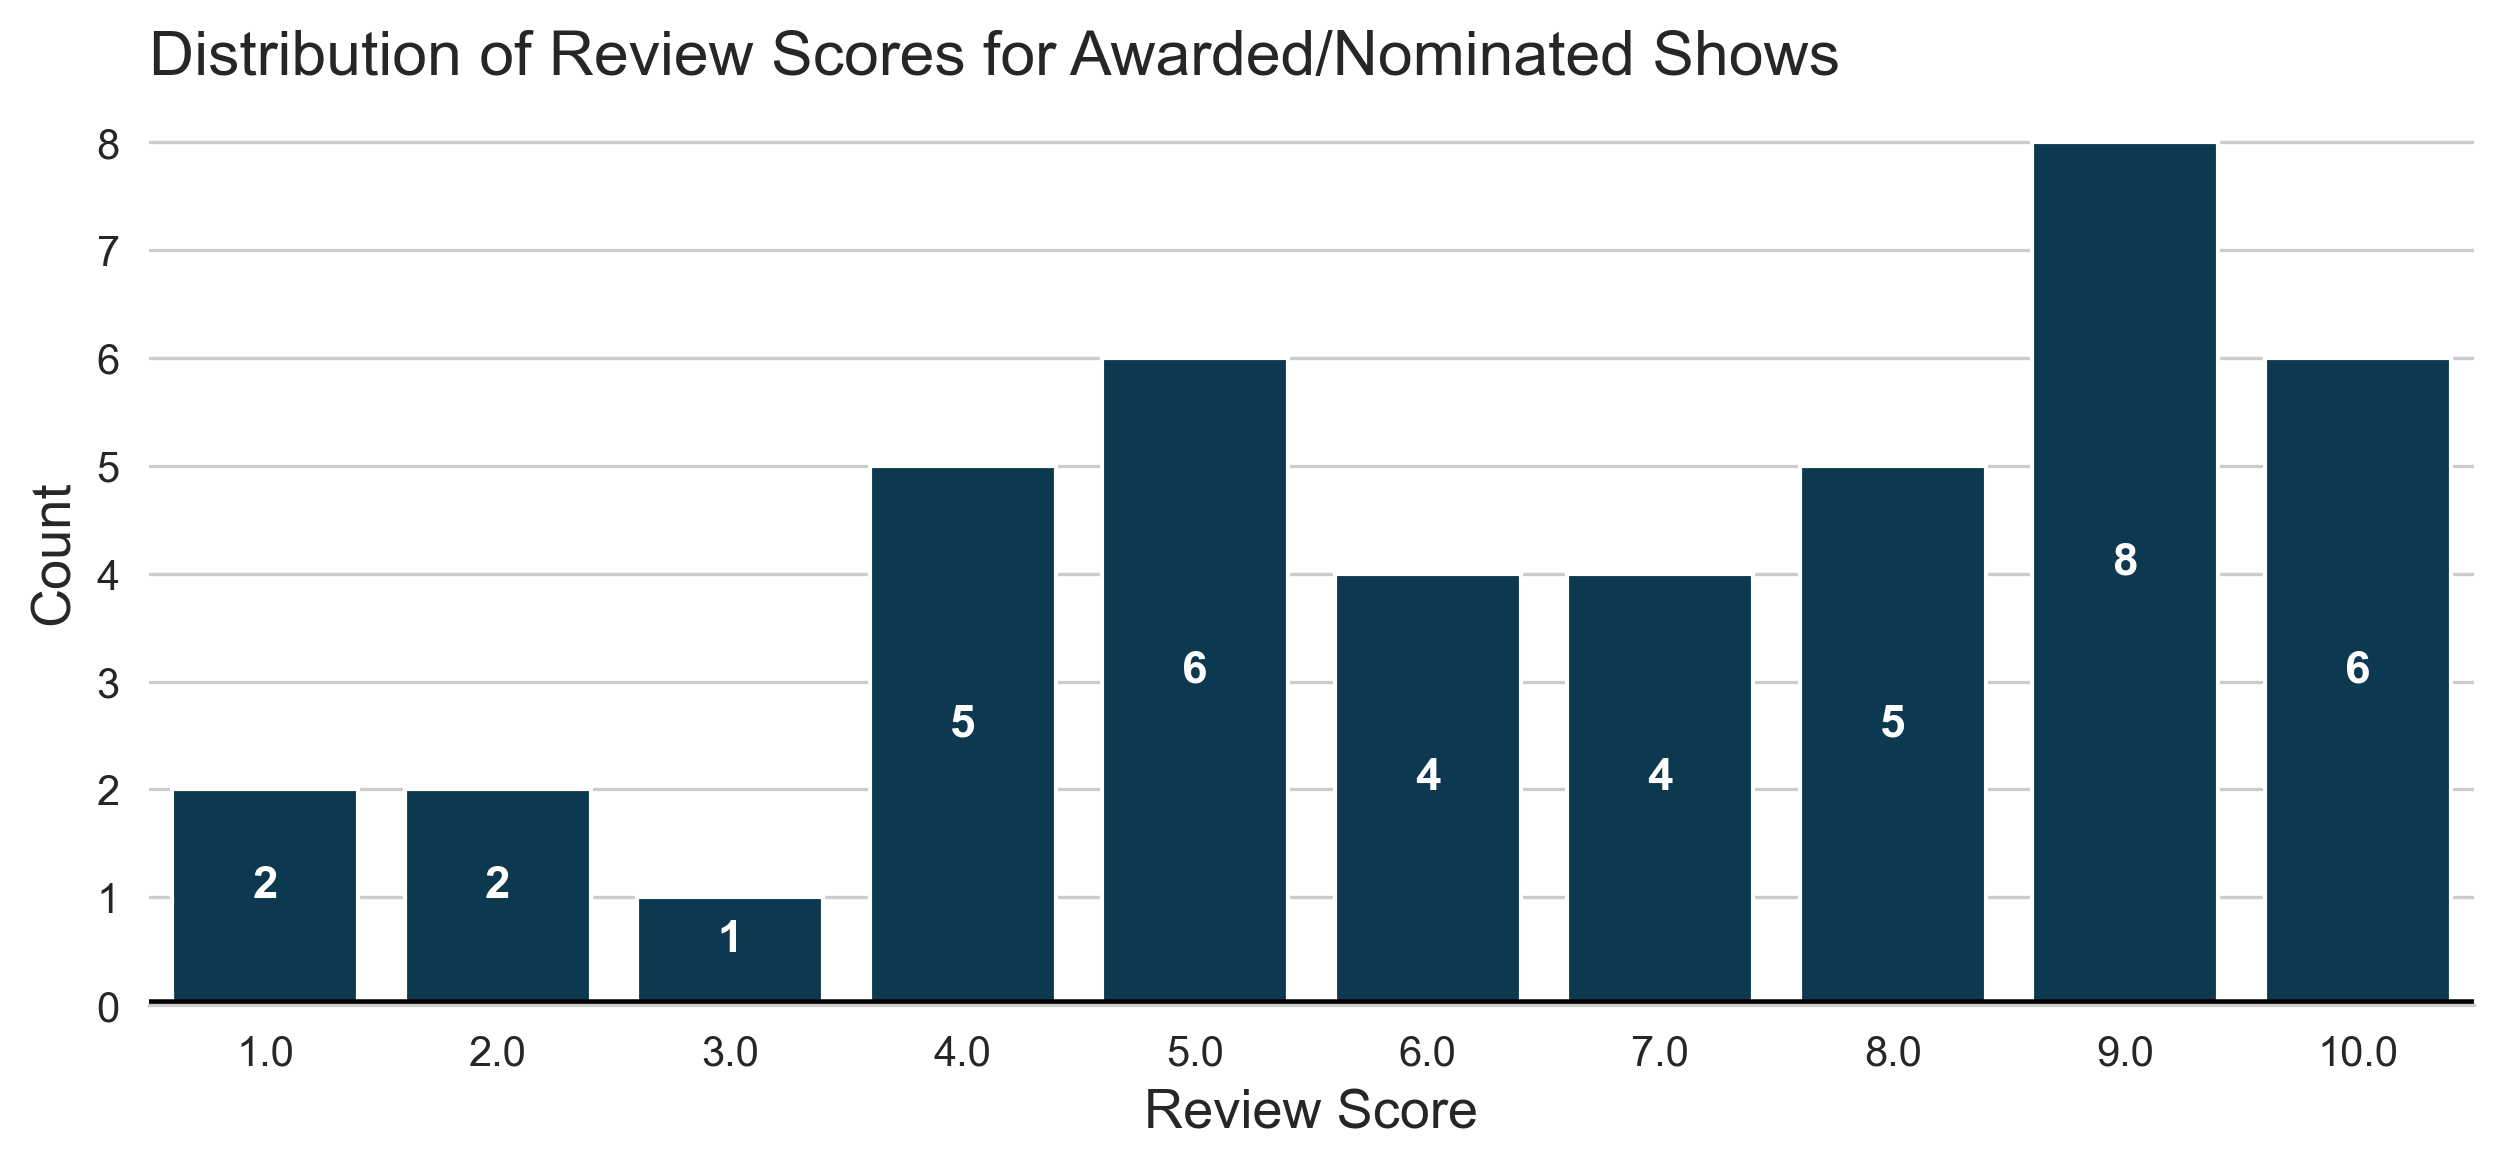

In [93]:
fig, ax=plt.subplots(figsize=(10,4), dpi=300)

# Plot
sns.countplot(data=df_award, x='review_score',
             color='#013b5b')

# Remove Border
for s in ['left','top','right']:
    ax.spines[s].set_visible(False)
    
# Grid
ax.grid(True, axis='y')

# Ticks Labels
plt.xlabel('Review Score', fontsize=13)
plt.ylabel('Count', fontsize=13)

# Thicken X axis
plt.axhline(color='black', lw=3)

# Annotations
annotations=df_award.groupby('review_score').count()['show_id']

for idx, item in enumerate(annotations):
    ax.annotate(f'{item}', xy=(idx, item/2),
                color='white', fontweight='bold',
                fontsize=11, ha='center')
    
# Titles
plt.title('Distribution of Review Scores for Awarded/Nominated Shows',
         fontsize=15, loc='left')

Observation: From the graph it seems that in general, Awarded or Nominated shows rarely get low reviews below 4 with a few exceptions. However, it seems that there are still some shows that have average review scores despite their nomination for awards. It also seems that a proportion of these award nominated shows tend to have high review scores from 8 to 10.

Action Requred: I believe that SUSS+ should continue adding shows that are award-nominated, however, we should still be wary of award-nominated shows as some of them are poorly rated. 

Further analysis of poorly reviewed nominated shows should be implemented.

#### Further analysis of poorly-reviewed nominated shows

In [94]:
# Poorly-reviewed nominated shows
df_poornominated=df[(df.description.str.contains(word_search)) & (df.review_score<6)]
df_poornominated

show_id     type                                           title  \
1701   s1702  TV Show                           American Horror Story   
2054   s2055  TV Show                               Chef's Table: BBQ   
3060   s3061    Movie                                   Ghost Stories   
4378   s4379    Movie                                 The Pixar Story   
4398   s4399    Movie           Loudon Wainwright III: Surviving Twin   
4845   s4846  TV Show                            Arrested Development   
4865   s4866  TV Show                        Bill Nye Saves the World   
5138   s5139  TV Show                            All Hail King Julien   
5152   s5153    Movie                          Cuba and the Cameraman   
5996   s5997    Movie                            20 Feet From Stardom   
6341   s6342  TV Show                                  Blue Planet II   
6371   s6372  TV Show                                Brave Miss World   
7176   s7177  TV Show  Ken Burns: The Roosevelts: An Intimate History   
7661   s7662    Movie                       One Direction: This Is Us   
7709   s7710  TV Show                            Parks and Recreation   
7850   s7851  TV Show                        Reggie Yates Outside Man   

                                               director  \
1701                                              Empty   
2054                                              Empty   
3060  Anurag Kashyap, Dibakar Banerjee, Karan Johar,...   
4378                                      Leslie Iwerks   
4398                                  Christopher Guest   
4845                                              Empty   
4865                                              Empty   
5138                                              Empty   
5152                                         Jon Alpert   
5996                                     Morgan Neville   
6341                                              Empty   
6371                                       Cecilia Peck   
7176                                          Ken Burns   
7661                                    Morgan Spurlock   
7709                                              Empty   
7850                                              Empty   

                                                   cast  \
1701  [Evan Peters, Sarah Paulson, Jessica Lange, De...   
2054                                            No Data   
3060  [Janhvi Kapoor, Sobhita Dhulipala, Sukant Goel...   
4378                                      [Stacy Keach]   
4398                            [Loudon Wainwright III]   
4845  [Jason Bateman, Portia de Rossi, Will Arnett, ...   
4865  [Bill Nye, Karlie Kloss, Derek Muller, Emily C...   
5138  [Danny Jacobs, Andy Richter, Henry Winkler, Ke...   
5152                                            No Data   
5996  [Darlene Love, Merry Clayton, Lisa Fischer, TÃ...   
6341                               [David Attenborough]   
6371                                    [Linor Abargil]   
7176                                            No Data   
7661  [Harry Styles, Niall Horan, Zayn Malik, Louis ...   
7709  [Amy Poehler, Rashida Jones, Aziz Ansari, Nick...   
7850                                     [Reggie Yates]   

                                           country date_added  release_year  \
1701                               [United States] 2020-11-13          2019   
2054                               [United States] 2020-09-02          2020   
3060                                       [India] 2020-01-01          2020   
4378                               [United States] 2018-11-18          2007   
4398                                       No Data 2018-11-13          2018   
4845                               [United States] 2018-05-29          2019   
4865                               [United States] 2018-05-11          2018   
5138                               [United States] 2017-12-01          2017   
5152                               [United S

In [95]:
# Expanded descriptions

print(df_poornominated['description'][7661],'\n')
print(df_poornominated['description'][7850],'\n')
print(df_poornominated['description'][4378])

Award-winning documentarian Morgan Spurlock turns his camera on boy band phenomenon One Direction in this combination concert film and backstage pass. 

Award-winning filmmaker Reggie Yates travels around the world tackling big issues such as gun violence, racism, gay rights and addiction. 

Go behind the scenes at Pixar Animation Studios with this Emmy-nominated documentary tracing the creation and history of the groundbreaking company.


Observation: It seems that a majority of these poorly-reviewed nominated shows are made by award-winning directors/producers and are not necessarily award-winning shows.

Insight: Award-winning directors or producers do not necessarily produce highly reviewed shows all the time despite their previous successes. Thus, SUSS+ should be wary of shows that are made by award-winning directors or producers, they instead  focus on shows that are highly nominated themselves.

### Task: Find out which are the best movie directors in the United States

Since SUSS+ is heavily populated with American Shows, we should conduct our analysis on how directors play a part in influencing review scores. Additionally, we have discovered that American-made Movies are preffered by SUSS+ viewers over American-made TV Shows, thus I have decided to conduct my analysis solely on American Movies.

In [96]:
# Dataset for US only Movies
df_USmovies=df_countryexp[(df_countryexp.type=='Movie') & (df_countryexp.country=='United States')].copy()


df_USmovies.head()

show_id   type                 title         director  \
0       s1  Movie  Dick Johnson Is Dead  Kirsten Johnson   
7       s8  Movie               Sankofa     Haile Gerima   
9      s10  Movie          The Starling   Theodore Melfi   
27     s28  Movie             Grown Ups     Dennis Dugan   
28     s29  Movie            Dark Skies    Scott Stewart   

                                                 cast        country  \
0                                             No Data  United States   
7   [Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...  United States   
9   [Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...  United States   
27  [Adam Sandler, Kevin James, Chris Rock, David ...  United States   
28  [Keri Russell, Josh Hamilton, J.K. Simmons, Da...  United States   

   date_added  release_year rating duration  \
0  2021-09-25          2020  PG-13   90 min   
7  2021-09-24          1993  TV-MA  125 min   
9  2021-09-24          2021  PG-13  104 min   
27 2021-09-20          2010  PG-13  103 min   
28 2021-09-19          2013  PG-13   97 min   

                                            listed_in  \
0                                     [Documentaries]   
7   [Dramas, Independent Movies, International Mov...   
9                                  [Comedies, Dramas]   
27                                         [Comedies]   
28                  [Horror Movies, Sci-Fi & Fantasy]   

                                          description  review_score  \
0   As her father nears the end of his life, filmm...           8.0   
7   On a photo shoot in Ghana, an American model s...           8.0   
9   A woman adjusting to life after a loss contend...           5.0   
27  Mourning the loss of their beloved junior high...           4.0   
28  A familyâ€™s idyllic suburban life shatters wh...           5.0   

    date_added_year  date_added_month  
0            2021.0               9.0  
7            2021.0               9.0  
9            2021.0               9.0  
27           2021.0               9.0  
28           2021.0               9.0

In [97]:
#Shortening certain Names
shorten_name={'Lilly Wachowski, Lana Wachowski':'Wachowski sisters'}
df_USmovies.replace(shorten_name, inplace=True)

# creating a pivot table consisting of the average review score and movie count of a director
df_USmovies=df_USmovies.groupby('director').agg({'review_score':['mean','count']})['review_score']

# Sorting the pivot table by descending count and mean and a condition whereby average review score must be more than 8
df_USmovies=df_USmovies[df_USmovies['mean']>=8].sort_values(['count','mean'], ascending=False)[:10]

df_USmovies

mean  count
director                            
Robert Luketic       8.500000      6
Vince Marcello       8.400000      5
Antonio Campos       8.000000      4
Steve Carr          10.000000      3
Marc Forster         9.000000      3
David Batty          8.666667      3
Mike Newell          8.666667      3
John Lee Hancock     8.333333      3
Sylvester Stallone   8.000000      3
Tate Taylor          8.000000      3

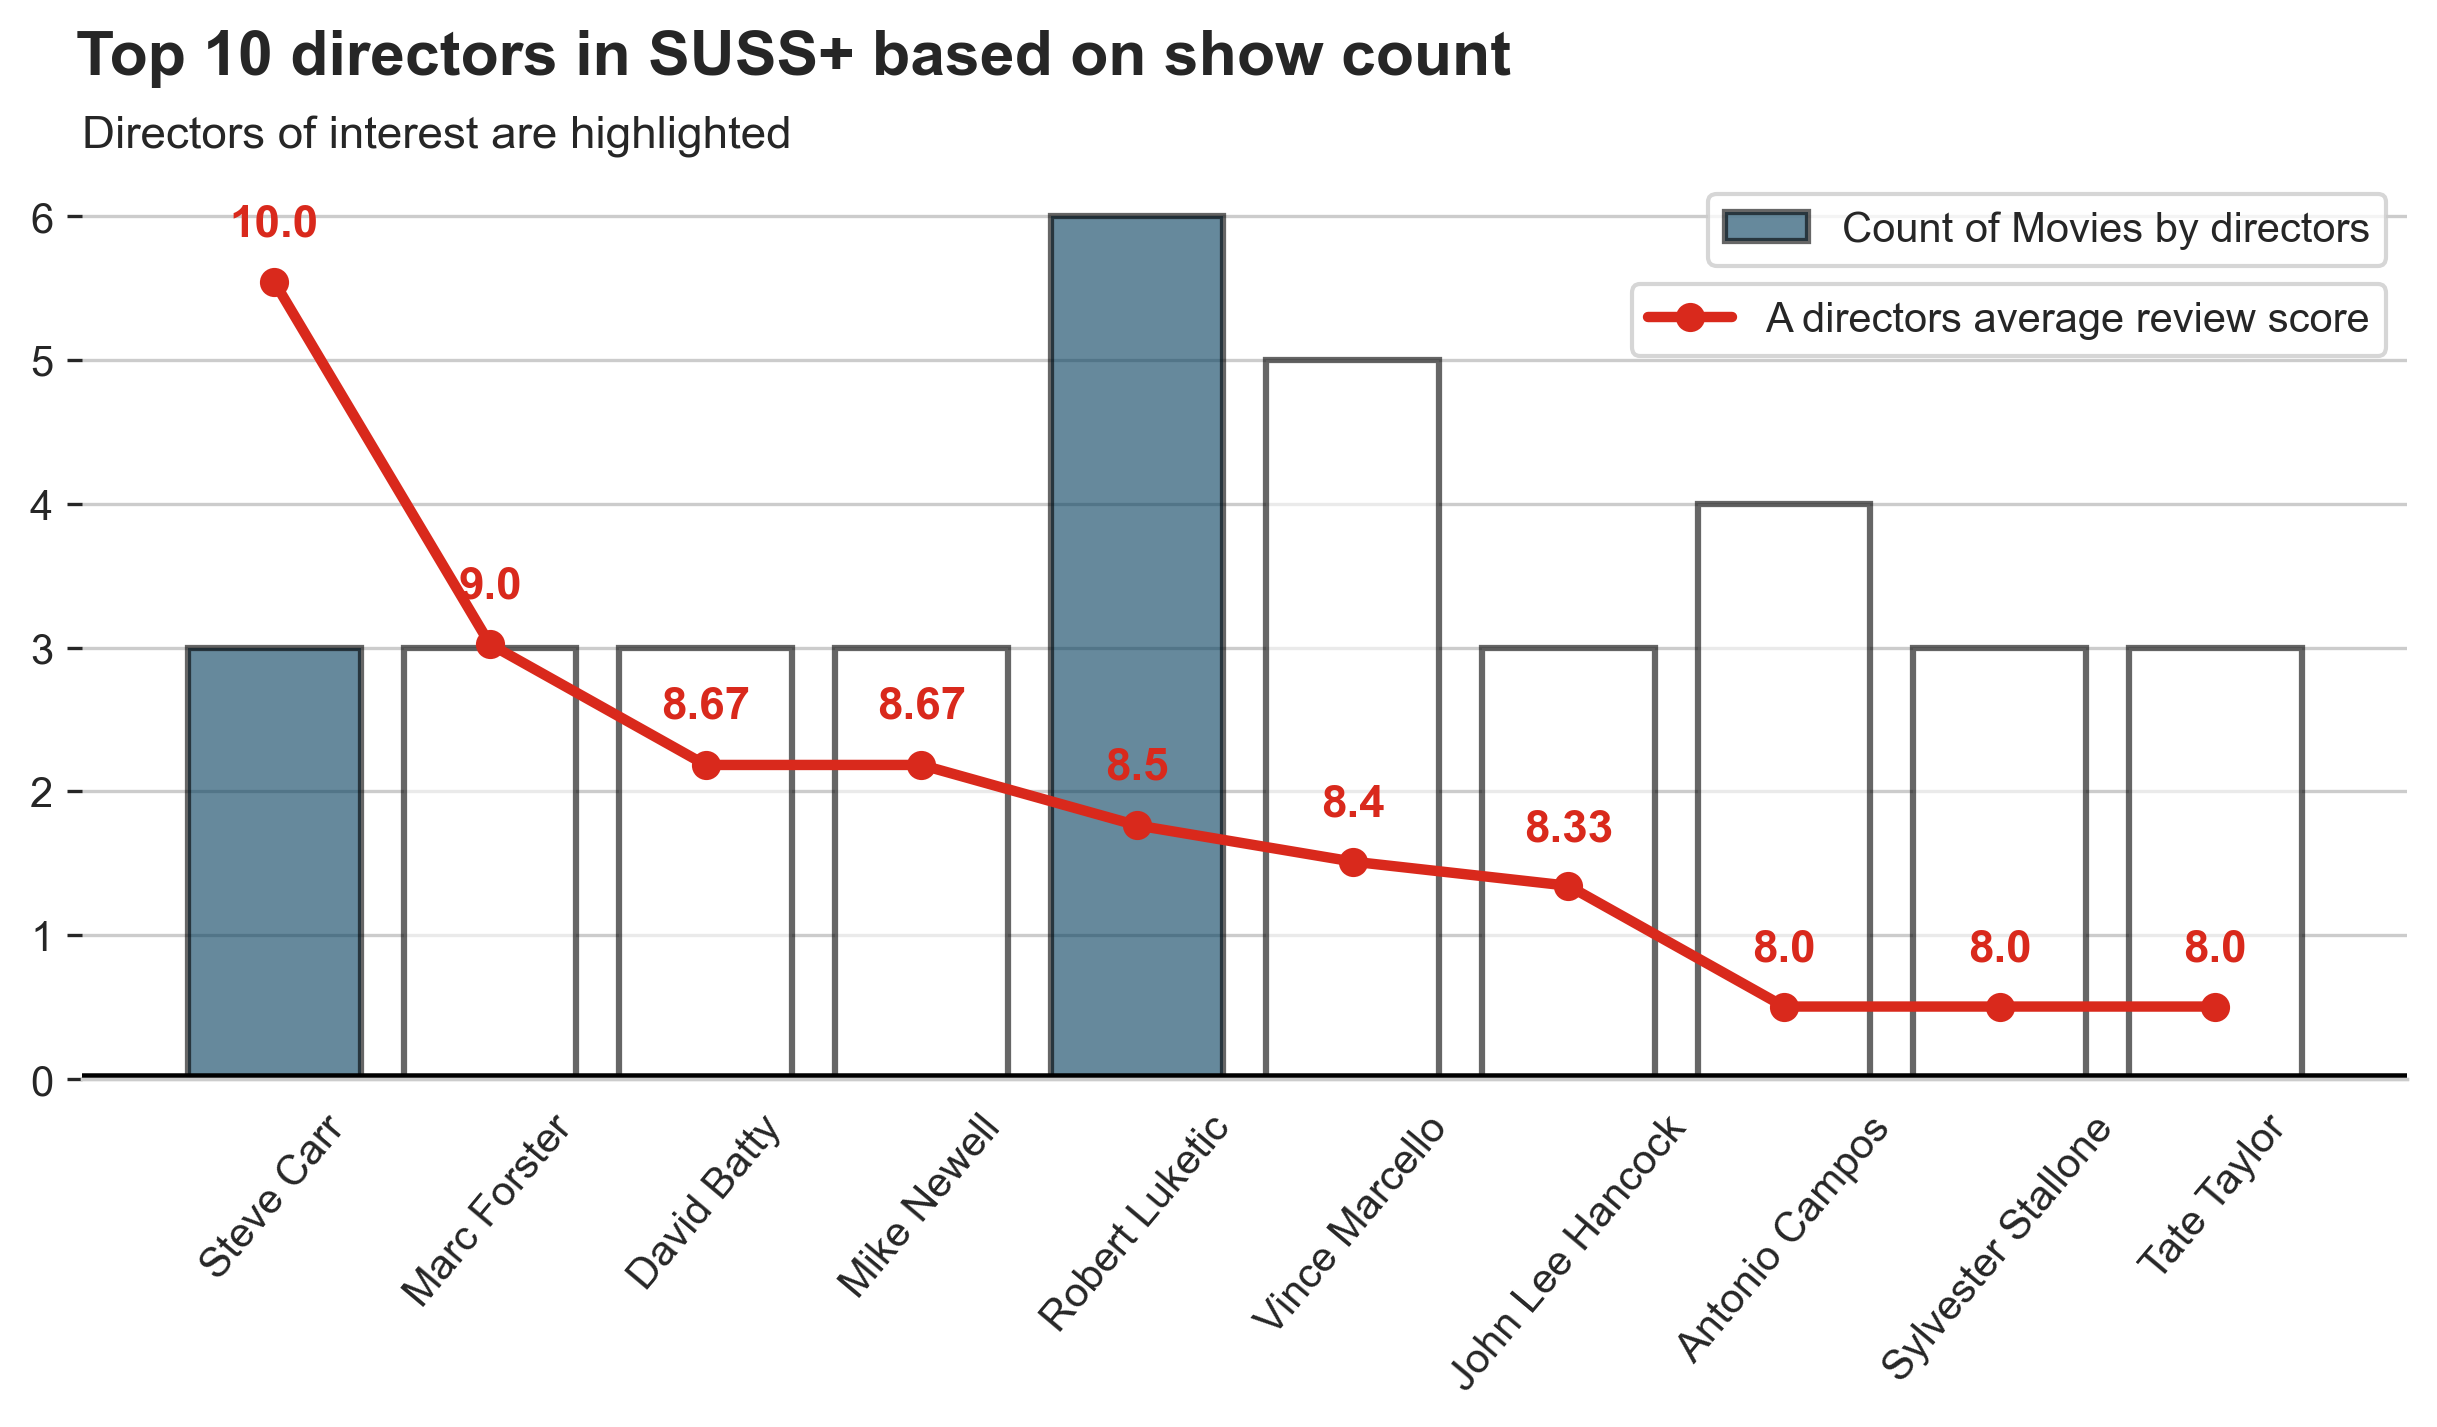

In [98]:
fig, ax=plt.subplots(figsize=(10,4), dpi=300)

# Bar plot
ax2=ax.twinx()
df_USmovies=df_USmovies.sort_values('mean', ascending=False)

color_map = ['white' for _ in range(10)]
color_map[0] = color_map[4] ='#013b5b'

ax.bar(df_USmovies.index, df_USmovies['count'].values,
       alpha=0.6, color=color_map,
       edgecolor='black', lw=1.5,
       label='Count of Movies by directors')

# Review Score line plot
ax2.plot(df_USmovies.index, df_USmovies['mean'].values,
       color='#d9291c', alpha=1,
       linewidth=2.5, marker='o',
       label='A directors average review score')
ax2.set_ylim(7.8,10.3)

# Axis Labels
ax.tick_params(axis='x', rotation=50)
ax.tick_params(axis='both', labelsize=10)
ax2.tick_params(labelright=False, right=False)

# Remove borders
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

# Thicken X axis
ax.axhline(color='black', lw=3,
          y=0)

# Grid
ax.grid(False, axis='x')
ax2.grid(False, axis='both')

# Annotate
label=round(df_USmovies['mean'], 2)
for idx, item in enumerate(label):
    ax2.annotate(f"{item}",
                xy=(idx, item+0.16),
                color='#d9291c', va='center', 
                ha='center', fontsize=11,
                fontweight='bold') 

# Legend
ax.legend(loc='best', bbox_to_anchor=(1, 1))
ax2.legend(loc='best', bbox_to_anchor=(1, 0.9))

#Title
plt.suptitle('Top 10 directors in SUSS+ based on show count',
             fontsize=15, fontweight='bold',
             x=0.362, y=1)
plt.title('Directors of interest are highlighted',
            fontsize=11, loc ='left')
 
plt.tight_layout;

Observation: It seems that Steve Carr is the most highly rated director in SUSS+, thus SUSS+ should add more movies directed by him. SUSS+ should also take note of director Robert Luketic as despite having the highest movie count of any director in SUSS+, Robert Luketic has still managed to maintain a solid 8.5 average review score.

#### Steve Carr's Movies

In [99]:
df[df.director=='Steve Carr']

show_id   type                                      title    director  \
6550   s6551  Movie                             Daddy Day Care  Steve Carr   
7452   s7453  Movie  Middle School: The Worst Years of My Life  Steve Carr   
7716   s7717  Movie                       Paul Blart: Mall Cop  Steve Carr   

                                                   cast  \
6550  [Eddie Murphy, Jeff Garlin, Steve Zahn, Regina...   
7452  [Griffin Gluck, Lauren Graham, Rob Riggle, Tho...   
7716  [Kevin James, Keir O'Donnell, Jayma Mays, Rain...   

                        country date_added  release_year rating duration  \
6550            [United States] 2019-01-01          2003     PG   93 min   
7452  [United States, Cambodia] 2019-03-03          2016     PG   92 min   
7716            [United States] 2020-11-01          2009     PG   91 min   

                                 listed_in  \
6550  [Children & Family Movies, Comedies]   
7452  [Children & Family Movies, Comedies]   
7716        [Action & Adventure, Comedies]   

                                            description  review_score  \
6550  When a conscientious father loses his lucrativ...          10.0   
7452  At Hills Village Middle School, budding cartoo...          10.0   
7716  An overzealous security guard finds himself in...          10.0   

      date_added_year  date_added_month  
6550           2019.0               1.0  
7452           2019.0               3.0  
7716           2020.0              11.0

#### Robert Luketic's movies

In [100]:
df[df.director=='Robert Luketic']

show_id   type           title        director  \
29       s30  Movie        Paranoia  Robert Luketic   
1121   s1122  Movie  Legally Blonde  Robert Luketic   
5959   s5960  Movie              21  Robert Luketic   
7204   s7205  Movie         Killers  Robert Luketic   
7503   s7504  Movie  Monster-in-Law  Robert Luketic   
8542   s8543  Movie  The Ugly Truth  Robert Luketic   

                                                   cast  \
29    [Liam Hemsworth, Gary Oldman, Amber Heard, Har...   
1121  [Reese Witherspoon, Luke Wilson, Selma Blair, ...   
5959  [Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...   
7204  [Katherine Heigl, Ashton Kutcher, Tom Selleck,...   
7503  [Jennifer Lopez, Jane Fonda, Michael Vartan, W...   
8542  [Katherine Heigl, Gerard Butler, Eric Winter, ...   

                             country date_added  release_year rating duration  \
29    [United States, India, France] 2021-09-19          2013  PG-13  106 min   
1121                 [United States] 2021-04-01          2001  PG-13   96 min   
5959                 [United States] 2020-01-01          2008  PG-13  123 min   
7204                 [United States] 2021-01-01          2010  PG-13  100 min   
7503        [United States, Germany] 2020-01-01          2005  PG-13  101 min   
8542                 [United States] 2019-04-25          2009      R   96 min   

                                            listed_in  \
29                                        [Thrillers]   
1121                      [Comedies, Romantic Movies]   
5959                                         [Dramas]   
7204  [Action & Adventure, Comedies, Romantic Movies]   
7503                      [Comedies, Romantic Movies]   
8542                      [Comedies, Romantic Movies]   

                                            description  review_score  \
29    Blackmailed by his company's CEO, a low-level ...           7.0   
1121  When dazzling L.A. sorority girl Elle Woods ge...          10.0   
5959  A brilliant group of students become card-coun...           9.0   
7204  After a whirlwind romance, Jen and Spencer set...           9.0   
7503  An office temp thinks she's found Mr. Right wh...           7.0   
8542  A chauvinistic morning-show commentator tries ...           9.0   

      date_added_year  date_added_month  
29             2021.0               9.0  
1121           2021.0               4.0  
5959           2020.0               1.0  
7204           2021.0               1.0  
7503           2020.0               1.0  
8542           2019.0               4.0